# Curso Estatística Academia Qintess

Eduardo Chaves Ferreira

educf.rio@gmail.com

In [2]:
# INICAILIZAÇÃO

import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy as st
import scipy.stats as stat
import itertools
from scipy.stats import norm
from scipy.stats import kstest
from sklearn.utils import shuffle

figsize=(10,6)

# Para uso com funções da biblioteca standard (ex random.randint)
random.seed(1)
# Para uso com funções da biblioteca numpy (ex np.random.randint)
np.random.seed(1)
# Quando for passada como parâmetro a seed
random_state = 1

# Permutação: possibilidades de colocação de n objetos em n posições = n!
def permutacao (n):
    return math.factorial(n)

# Arranjo: p objetos em n posições, ordem importa = n!/(n-p)!
def arranjo (n,p):
    return math.factorial(n)/math.factorial(n-p)

# Combinação: p objetos em n posições, ordem não importa = n!/(n-p)!p!
def combinacao (n,p):
    return math.factorial(n)/(math.factorial(n-p)*math.factorial(p))

# Variações possíveis havendo n slots e p possibilidades para cada um
def possibilidades(n,p):
    return p**n


# Recupera amostra da população

def recupera_amostra(populacao, tamanho_amostra):
    tamanho_amostra = int(tamanho_amostra)
    if type(populacao) is pd.DataFrame:
        return populacao.sample(tamanho_amostra)
    else:
        #return populacao[np.random.randint(0, len(populacao), tamanho_amostra)]
        return [populacao[i] for i in np.random.randint(0, len(populacao), tamanho_amostra)]

Montagem Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%cd "/content/drive/MyDrive/Academia QADS/Estatística Descritiva e Inferencial/"

/content/drive/MyDrive/Academia QADS/Estatística Descritiva e Inferencial


In [11]:
!cat Teste.txt

Teste

# Introdução

## Certeza X Incerteza

Há processos que são descritos de forma precisa, por equações analíticas.

Exemplo: aceleração de um corpo submetido a uma força a = F/m

Conseguimeos determinar precisamente a aceleração do corpo de acordo com F e m

Neste caso não usamos probabilidade ou estatística

Vamos ao exemplo:

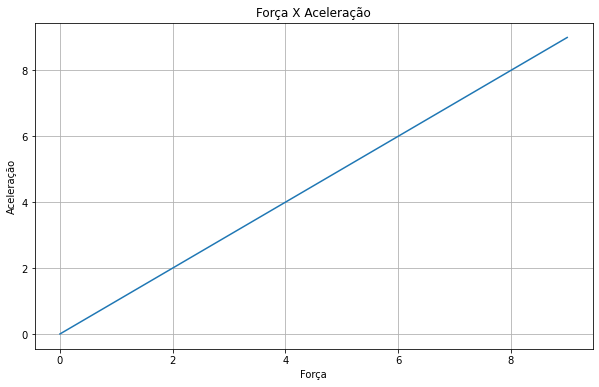

In [ ]:
# Para qualquer valor de F podemos determinar precisamente qual será a aceleração

m = 1
F = np.arange(0.0,10.0,1)
a = F/m

plt.subplots(figsize=(10,6))
plt.plot(F,a)

plt.xlabel('Força')
plt.ylabel('Aceleração')
plt.title('Força X Aceleração')
plt.grid(True)
plt.show()

Há processos cujo resultado não é determinístico, ou seja, seu resultado pode variar entre execuções.

Tais processos são chamados estocásticos.

Um exemplo é o lançamento de uma moeda.

Neste caso podemos usar probabilidade/estatística para quantificar a incerteza do resultado.

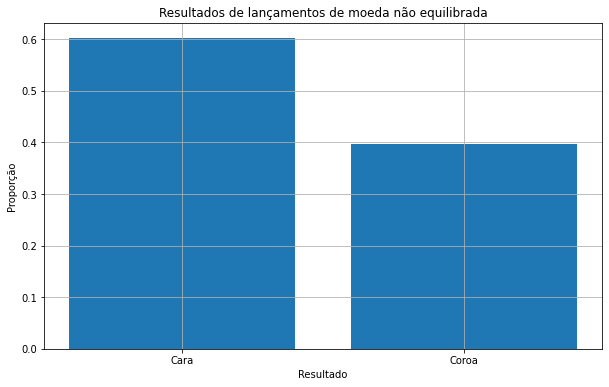

In [ ]:
# No lançamento da moeda não podemos prever qualquer resultado específico, 
# mas podemos determinar a probabilidade de cada resultado

random.seed(1)

escolhas = ['Cara','Coroa']
lancamentos = 10000
resultados = random.choices(population=escolhas, weights=[6/10,4/10], k=lancamentos)

fig, ax = plt.subplots(figsize=(10,6))
ind = range(1,len(escolhas)+1)
proporcoes = [resultados.count('Cara')/lancamentos,resultados.count('Coroa')/lancamentos]
plt.bar(ind,proporcoes,align='center')
ax.set_xticks(ind)
ax.set_xticklabels(escolhas)


plt.xlabel('Resultado')
plt.ylabel('Proporção')
plt.title('Resultados de lançamentos de moeda não equilibrada')
plt.grid(True)
plt.show()

## Exemplo: Mega Sena

In [ ]:
dezenas = ['d1','d2','d3','d4','d5','d6']
Sena = pd.read_excel('/content/drive/MyDrive/AcademiaQintess/Sena.xlsx')  
Sena['Data'] = pd.to_datetime(Sena['Data'], format='%d/%m/%Y')
Sena.dropna(inplace=True)

for coluna in dezenas:
    Sena[coluna] = Sena[coluna].astype(copy=False, dtype ='int')
Sena['Ganhadores_Sena'] = Sena['Ganhadores_Sena'].astype(copy=False, dtype ='int')
Sena.head()

,Concurso,Data,d1,d2,d3,d4,d5,d6,Ganhadores_Sena,Rateio_Sena
0,1.0,1996-03-11,41,5,4,52,30,33,0,0.00
1,2.0,1996-03-18,9,39,37,49,43,41,1,2307162.23
2,3.0,1996-03-25,36,30,10,11,29,47,2,391192.51
4,4.0,1996-04-01,6,59,42,27,1,5,0,0.00
5,5.0,1996-04-08,1,19,46,6,16,2,0,0.00


In [ ]:
Sena['Ganho_Medio']=Sena.Rateio_Sena/Sena.Ganhadores_Sena
Sena.loc[Sena.Ganhadores_Sena!=0,['Ganho_Medio']].mean()

Ganho_Medio    1.652750e+07
dtype: float64

In [ ]:
Sena['Ganho_Medio'].mean()

16527497.999992125

In [ ]:
Sena.tail()

,Concurso,Data,d1,d2,d3,d4,d5,d6,Ganhadores_Sena,Rateio_Sena,Ganho_Medio
2411,2144.0,2019-04-20,21,33,55,16,7,60,0,0.0,NaN
2412,2145.0,2019-04-24,6,59,28,8,51,53,0,0.0,NaN
2413,2146.0,2019-04-27,39,42,16,18,44,31,0,0.0,NaN
2414,2147.0,2019-05-02,49,42,17,19,37,41,0,0.0,NaN
2415,2148.0,2019-05-04,59,33,8,58,32,15,0,0.0,NaN


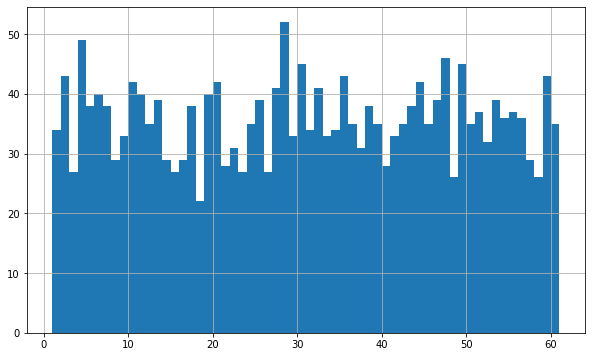

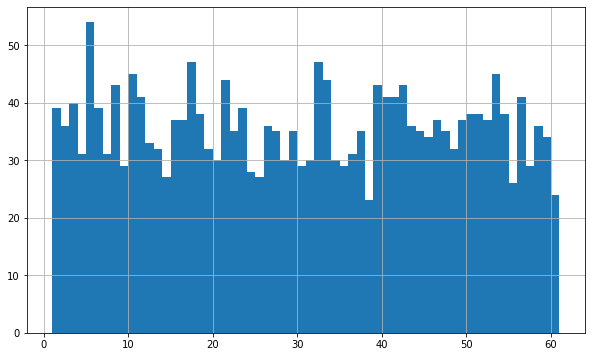

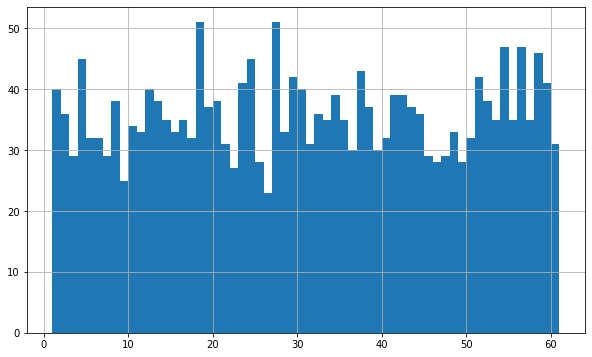

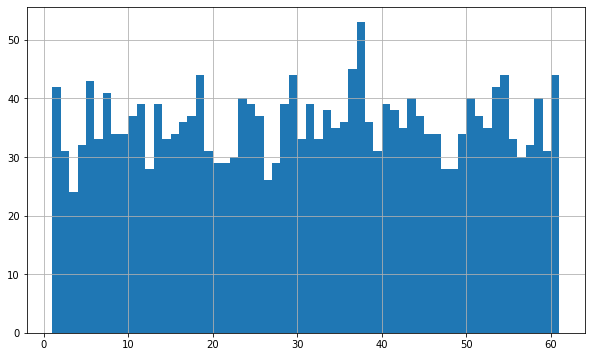

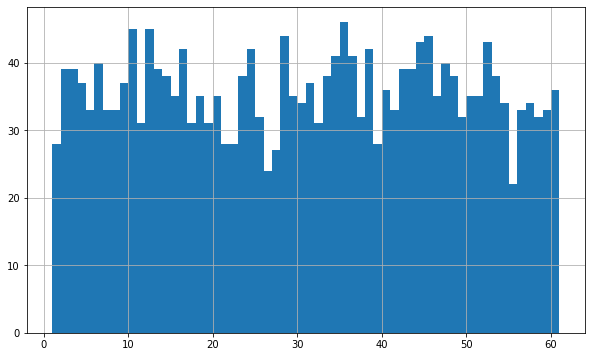

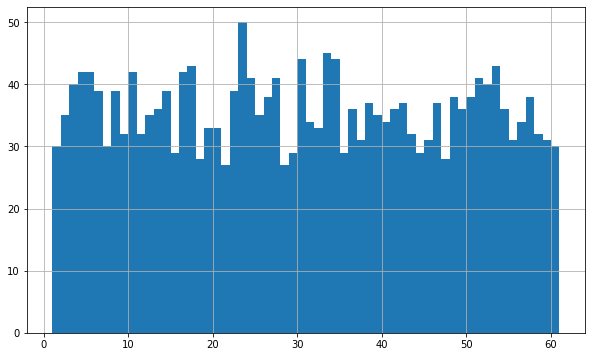

In [ ]:
for coluna in dezenas:
    fig, ax = plt.subplots(1,1,figsize=figsize)
    Sena[coluna].hist(ax=ax, grid=True, bins=range(1,62)    )

In [ ]:
Sena2 = pd.DataFrame(columns=list(range(1,61)), index=Sena.index)
Sena2.fillna(0,inplace=True)
for index, row in Sena.iterrows():
    for coluna in dezenas:
        numero = row[coluna]
        Sena2.loc[Sena2.index==index,numero] = Sena2.loc[Sena2.index==index,numero]+1

Sena2.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


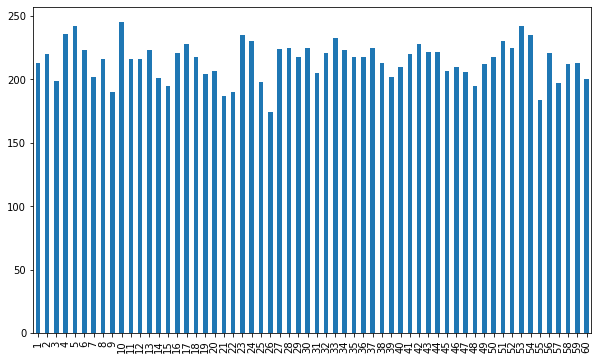

In [ ]:
fig, ax = plt.subplots(1,1,figsize=figsize)
Sena2.sum(axis =0).plot.bar(figsize=figsize,ax =ax)

In [ ]:
Sena2.sum(axis =0).sort_values()

26    174
55    184
21    187
22    190
9     190
15    195
48    195
57    197
25    198
3     199
60    200
14    201
7     202
39    202
19    204
31    205
47    206
45    207
20    207
46    210
40    210
49    212
58    212
38    213
59    213
1     213
11    216
12    216
8     216
35    218
29    218
18    218
50    218
36    218
2     220
41    220
56    221
32    221
16    221
43    222
44    222
6     223
34    223
13    223
27    224
37    225
52    225
28    225
30    225
42    228
17    228
51    230
24    230
33    233
54    235
23    235
4     236
53    242
5     242
10    245
dtype: int64

# Probabilidade

## Probabilidade - Solução analítica - Contagem

O cálculo das probabilidades de eventos complexos pode ser feito de maneira analítica em sua forma mais simples: contagem.

No exemplo do lançamento de moedas, a probabilidade de obtermos 15 caras em 30 lançamentos pode ser calculada dividindo o número de eventos favoráveis pelo total de eventos possíveis. Para isso calculamos de quantas maneiras podemos obter 15 caras em 30 lançamentos, dividindo pelo número total de eventos possíveis em 30 lançamentos:

In [ ]:
# Cálculo analítico baseado em contagem 
combinacao(30,15)/possibilidades(30,2)

0.14446444809436798

## Probabilidade - Solução analítica - Probabilidades simples

O cálculo das probabilidades de eventos complexos pode ser feito de maneira analítica, considerando as probabilidades simples.

No exemplo do lançamento de moedas, a probabilidade de obtermos m caras em n lançamentos (considerando uma moeda honesta) é dada por:

P(n,m) = Combinação(n,m) x 0,5^m x 0,5^(n-m)

Considerando 30 lançamentos (n=30), vamos calcular a probabilidade de obtermos m caras: 

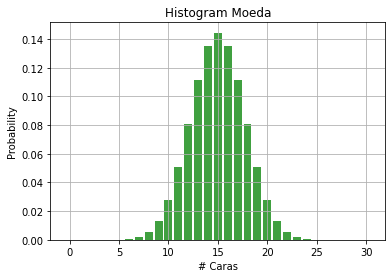

In [ ]:
# Cálculo analítico baseado na probabilidade básica
probabilidades = np.zeros((31,1))
for i in range(0,31,1):
    probabilidades[i]=combinacao(30,i)*((1/2)**(i))*((1/2)**(30-i))

plt.bar(range(0,31,1),probabilidades[:,0], facecolor='g', alpha=0.75)

plt.xlabel('# Caras')
plt.ylabel('Probability')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

## Probabilidade - Solução numérica

O cálculo das probabilidades de eventos complexos pode ser bastante difícil considerando a solução analítica. Soluções analíticas envolvem o conhecimento de análise combinatória e probabilidade.

Em casos em que não sabemos ou não queremos recorrer à solução analítica, podemos usar simulações computacionais para chegarmos aos mesmos resultados. Tais cálculos são chamados simulações de Monte-Carlo.

Neste caso a probabilida é estimada pela frequência de ocorrências.

Vamos resolver o problema anterior (número de caras em 30 lançamentos) simplesmente simulando e estimando as probabilidades:

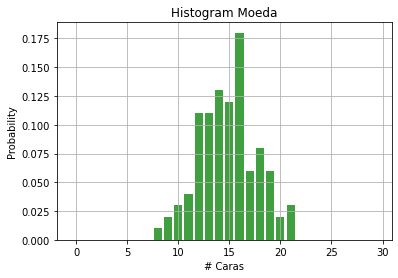

In [ ]:
# Cálculo por simulação - usando probabilidade básica - 100 repetições
Cara = 1
Coroa = 0
Moeda = [Cara,Coroa]
Equilibrio = [1/2,1/2]
lancamentos = 30
repeticoes = 100

resultado = np.random.choice(a=Moeda, p=Equilibrio, replace=True, size=(repeticoes,lancamentos))
resultado=np.sum(resultado, axis=1)
probabilidades,_ = np.histogram(a=resultado, density=True, bins=range(0,31,1))

#n, bins, patches = plt.hist(resultado, density=True, facecolor='g', alpha=0.75, bins=range(0,31,1))
plt.bar(range(0,30,1),probabilidades, facecolor='g', alpha=0.75)

plt.xlabel('# Caras')
plt.ylabel('Probability')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

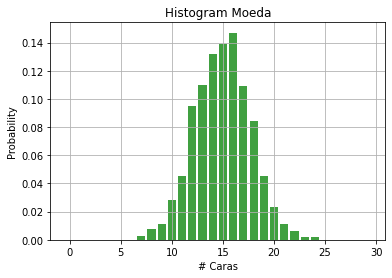

In [ ]:
# Cálculo por simulação - usando probabilidade básica - 1000 repetições
Cara = 1
Coroa = 0
Moeda = [Cara,Coroa]
Equilibrio = [1/2,1/2]
lancamentos = 30
repeticoes = 1000

resultado = np.random.choice(a=Moeda, p=Equilibrio, replace=True, size=(repeticoes,lancamentos))
resultado=np.sum(resultado, axis=1)
probabilidades,_ = np.histogram(a=resultado, density=True, bins=range(0,31,1))

#n, bins, patches = plt.hist(resultado, density=True, facecolor='g', alpha=0.75, bins=range(0,31,1))
plt.bar(range(0,30,1),probabilidades, facecolor='g', alpha=0.75)

plt.xlabel('# Caras')
plt.ylabel('Probability')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

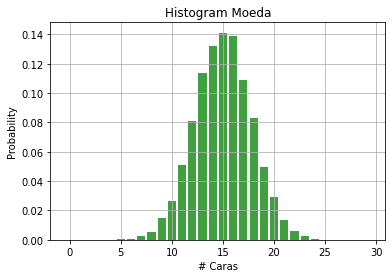

In [ ]:
# Cálculo por simulação - usando probabilidade básica - 10000 repetições
Cara = 1
Coroa = 0
Moeda = [Cara,Coroa]
Equilibrio = [1/2,1/2]
lancamentos = 30
repeticoes = 10000

resultado = np.random.choice(a=Moeda, p=Equilibrio, replace=True, size=(repeticoes,lancamentos))
resultado=np.sum(resultado, axis=1)
probabilidades,_ = np.histogram(a=resultado, density=True, bins=range(0,31,1))

#n, bins, patches = plt.hist(resultado, density=True, facecolor='g', alpha=0.75, bins=range(0,31,1))
plt.bar(range(0,30,1),probabilidades, facecolor='g', alpha=0.75)

plt.xlabel('# Caras')
plt.ylabel('Probability')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

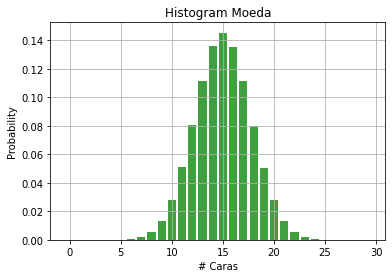

In [ ]:
Cara = 1
Coroa = 0
Moeda = [Cara,Coroa]
Equilibrio = [1/2,1/2]
lancamentos = 30
repeticoes = 1000000

resultado = np.random.choice(a=Moeda, p=Equilibrio, replace=True, size=(repeticoes,lancamentos))
resultado=np.sum(resultado, axis=1)
probabilidades,_ = np.histogram(a=resultado, density=True, bins=range(0,31,1))

#n, bins, patches = plt.hist(resultado, density=True, facecolor='g', alpha=0.75, bins=range(0,31,1))
plt.bar(range(0,30,1),probabilidades, facecolor='g', alpha=0.75)

plt.xlabel('# Caras')
plt.ylabel('Probability')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

## Funções Úteis

In [ ]:
##### Gerando números aleatórios
# Gerando int - biblioteca python standard
print(random.randrange(100, 1000, 2))
print(random.randint(100, 1000))

352
816


In [ ]:
# Gerando int - biblioteca numpy
print(np.random.randint(100, 1000,2))

[153 826]


In [ ]:
# Gerando float - biblioteca python standard
print(random.random())
print(random.uniform(100, 1000))
print(random.normalvariate(1, 1))

# Gerando float - biblioteca numpy
print(np.random.random(5))
print(np.random.randn(5))

0.48629296475361705
279.43114038154874
0.01694352286284362
[0.98012557 0.07096571 0.7856597  0.49501593 0.20930168]
[ 0.58353907  0.11072287  0.82765454  0.08599541 -0.11731314]


In [ ]:
##### Gerando números não aleatórios
print(np.linspace(0.0,1.0,11))
print(np.arange(0.0,10.0,3))
print(np.logspace(0.0,10.0,3))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0. 3. 6. 9.]
[1.e+00 1.e+05 1.e+10]


In [ ]:

##### Escolha com reposição
# usando numpy np.random.choice(10,size=10,replace=True)
faces = list(range(1,7))
lancamentos = 600
pesos = [1/6,1/6,0.5/6,0.5/6,2/6,1/6]
resultados = random.choices(population=faces, weights=pesos, k=lancamentos)
#print(resultados)
for i in faces:
    print('Face {}, peso {}, vezes {}'.format(i,pesos[i-1],resultados.count(i)))

Face 1, peso 0.16666666666666666, vezes 105
Face 2, peso 0.16666666666666666, vezes 92
Face 3, peso 0.08333333333333333, vezes 46
Face 4, peso 0.08333333333333333, vezes 57
Face 5, peso 0.3333333333333333, vezes 184
Face 6, peso 0.16666666666666666, vezes 116


In [ ]:
##### Escolha sem reposição
# usando numpy np.random.choice(10,size=10,replace=False)
lista = list(range(1,7))
random.sample(population=lista, k=len(lista))

[5, 3, 1, 6, 2, 4]

In [ ]:

##### Embaralhamento
# usando numpy np.random.choices

lista = list(range(1,7))
random.shuffle(lista)
lista





[3, 2, 1, 5, 4, 6]

In [ ]:
##### Baralho



#Suits
Clubs=0
Diamonds=1
Hearts=2
Spades=3

#Ranks
Ace=1
Jack=11
Queen=12
King=13

Ranks = [Ace,2,3,4,5,6,7,8,9,10,Jack,Queen,King]
Suits = [Clubs,Diamonds,Hearts,Spades]
Ranks_ = ['','Ace','2','3','4','5','6','7','8','9','10','Jack','Queen','King']
Suits_ = ['Clubs','Diamonds','Hearts','Spades']

Rank=0
Suit=1
Cards = list(range(0,52))

deck = np.zeros((52,2), dtype=int)
card = 0
for rank,suit in itertools.product(Ranks, Suits):
    deck[card,:] = [rank,suit]
    card+=1
    
def translate_cards(hand):
    retorno = []
    for i in range(len(hand)):
        rank,suit = hand[i,:]
        retorno.append(Ranks_[rank]+'-'+Suits_[suit])
        
    return retorno


hand = deck[random.sample(population=Cards, k=3),:]
translate_cards(hand)

['5-Spades', '5-Hearts', '3-Clubs']

In [ ]:
hand = deck[random.sample(population=Cards, k=3),:]
translate_cards(hand)

['Jack-Clubs', '9-Hearts', '7-Clubs']

In [ ]:
hand = deck[random.sample(population=Cards, k=3),:]
translate_cards(hand)

['Ace-Spades', '2-Hearts', '4-Clubs']

## **Exercício**

Usando o código acima, considerando os valores das cartas ('Ace' 1,'2','3','4','5','6','7','8','9','10','Jack' 11,'Queen' 12,'King' 13)

Faça uma simulação, sorteando 10.000 "mãos" com 3 cartas, e veja qual a proporção de vezes que você extrapolará o valor 21 na terceira carta quando que as duas primeiras somarem 11

In [ ]:


testes=300
repeticoes=10000

for k in range(9,21,1):

  media=0
  for j in range(testes):
    contador=0
    for i in range(repeticoes):
      mao=deck[random.sample(population=Cards, k=3),:]
      c1=mao[0][0]
      c2=mao[1][0]
      c3=mao[2][0]
      
      if ((c1+c2)==k)&((c1+c2+c3)>21):
        contador+=1
    
    media += (contador/repeticoes)
    #print(contador/repeticoes)

  print('Soma das duas primeiras cartas: ',k,'Probabilidade de extrapolar 21 na terceira: ',media/testes)

Soma das duas primeiras cartas:  9 Probabilidade de extrapolar 21 na terceira:  0.003928333333333337
Soma das duas primeiras cartas:  10 Probabilidade de extrapolar 21 na terceira:  0.008464000000000001
Soma das duas primeiras cartas:  11 Probabilidade de extrapolar 21 na terceira:  0.014393666666666654
Soma das duas primeiras cartas:  12 Probabilidade de extrapolar 21 na terceira:  0.020148333333333334
Soma das duas primeiras cartas:  13 Probabilidade de extrapolar 21 na terceira:  0.028080333333333332
Soma das duas primeiras cartas:  14 Probabilidade de extrapolar 21 na terceira:  0.035542999999999964
Soma das duas primeiras cartas:  15 Probabilidade de extrapolar 21 na terceira:  0.03887366666666664
Soma das duas primeiras cartas:  16 Probabilidade de extrapolar 21 na terceira:  0.03968500000000001
Soma das duas primeiras cartas:  17 Probabilidade de extrapolar 21 na terceira:  0.04128899999999998
Soma das duas primeiras cartas:  18 Probabilidade de extrapolar 21 na terceira:  0.040

# Estatística descritiva

## Tipos Dados

In [ ]:
tiposDados = pd.read_excel('/content/drive/MyDrive/AcademiaQintess/TiposDados.xlsx')  
tiposDados

,Matricula,Nome,Idade,Sexo,RendaFamiliar,Serie,Amostra
0,1,João,14,M,1000,8,N
1,2,José,15,M,1100,8,S
2,3,Ana,13,F,1500,7,N
3,4,Lúcia,12,F,5000,6,S
4,5,Cristina,16,F,10000,8,S
5,6,Mônica,14,F,3000,7,N
6,7,Aline,13,F,2000,6,S
7,8,Carlos,12,M,1000,6,N
8,9,Marcos,16,M,2200,8,N
9,10,Thiago,16,F,3300,8,S


In [ ]:
tiposDados.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Matricula      20 non-null     int64 
 1   Nome           20 non-null     object
 2   Idade          20 non-null     int64 
 3   Sexo           20 non-null     object
 4   RendaFamiliar  20 non-null     int64 
 5   Serie          20 non-null     int64 
 6   Amostra        20 non-null     object
dtypes: int64(4), object(3)
memory usage: 1.2+ KB


In [ ]:
tiposDados.describe()

,Matricula,Idade,RendaFamiliar,Serie
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,13.750000,3120.000000,7.000000
std,5.91608,1.618154,2180.197963,0.858395
min,1.00000,12.000000,1000.000000,6.000000
25%,5.75000,12.000000,1450.000000,6.000000
50%,10.50000,13.500000,2600.000000,7.000000
75%,15.25000,15.000000,4325.000000,8.000000
max,20.00000,17.000000,10000.000000,8.000000


## Média

In [ ]:
# DataFrame
print(tiposDados.RendaFamiliar.mean())

# NumPy
print(np.mean(tiposDados.RendaFamiliar))

# Scipy
print(st.mean(tiposDados.RendaFamiliar))


3120.0
3120.0
3120.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead



## Mediana

In [ ]:
# DataFrame
print(tiposDados.RendaFamiliar.median())

# NumPy
print(np.median(tiposDados.RendaFamiliar))


2600.0
2600.0


## Moda

In [ ]:
# DataFrame
print(tiposDados.RendaFamiliar.mode())



0    1000
dtype: int64


## Variância

Sendo a variância uma média, o esperado seria a divisão por n (número de elementos na amostra)

Entretanto, tal divisão torna o estimador tendencioso quando aplicado à amostra, sendo correto dividir por n-1.

Caso n seja muito grande, tal diferença é imperceptível, para amostras menores o valor fica evidente.

Quando usado para população, dividi-se por n, não por n-1

Em numpy default é 0, no DataFrame é 1.

In [ ]:
# DataFrame - o valor default é 1, o cálculo não fica idêntico ao realizado com a biblioteca numpy
print(tiposDados.RendaFamiliar.var(ddof=0))

# NumPy
print(np.var(tiposDados.RendaFamiliar))

4515600.0
4515600.0


## Desvio padrão

In [ ]:
# DataFrame
print(tiposDados.RendaFamiliar.std(ddof=0))
print(tiposDados.RendaFamiliar.std())

# NumPy
print(np.std(tiposDados.RendaFamiliar))

2124.994117638917
2180.197963005822
2124.994117638917


## Quartis

In [ ]:
tiposDados.RendaFamiliar.describe()

count       20.000000
mean      3120.000000
std       2180.197963
min       1000.000000
25%       1450.000000
50%       2600.000000
75%       4325.000000
max      10000.000000
Name: RendaFamiliar, dtype: float64

## Curtose

In [ ]:
tiposDados.RendaFamiliar.kurtosis()

4.13900899391845

## Assimetria

In [ ]:
tiposDados.RendaFamiliar.skew()

1.7309981147723814

## Visualização de dados

ATENÇÃO: Cuidado com a escolha do gráfico com relação ao tipo do dado

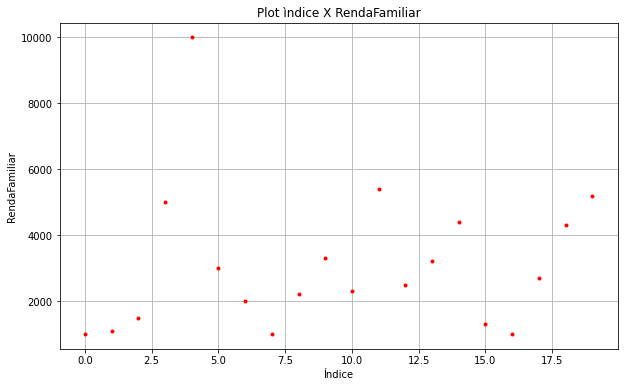

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.subplots(figsize=figsize)
plt.plot(range(len(tiposDados)), 
         tiposDados.RendaFamiliar,
         'r.'
         )
plt.xlabel('Índice')
plt.ylabel('RendaFamiliar')
plt.title('Plot ìndice X RendaFamiliar')
plt.grid(True)
plt.show()
plt.tight_layout()

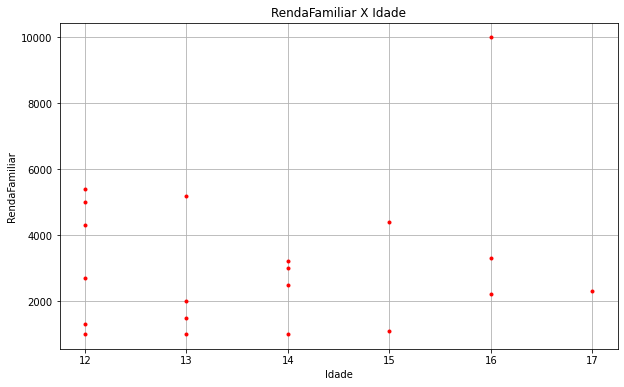

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.subplots(figsize=figsize)

tips_ = tiposDados.loc[:,['Idade','RendaFamiliar']].values

plt.plot(tips_[:,0], 
         tips_[:,1],
         'r.'
         )

plt.xlabel('Idade')
plt.ylabel('RendaFamiliar')
plt.title('RendaFamiliar X Idade')
plt.grid(True)
plt.show()
plt.tight_layout()

### Pizza

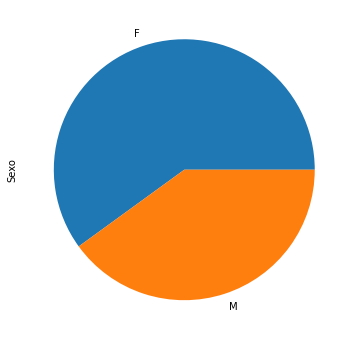

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
tiposDados.Sexo.value_counts().plot(kind='pie', ax=ax)

### Barras

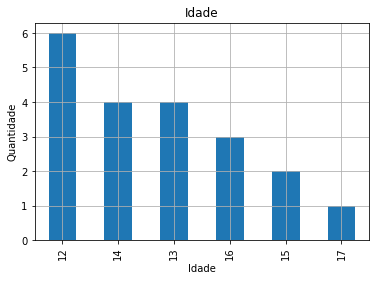

12    0.30
14    0.20
13    0.20
16    0.15
15    0.10
17    0.05
Name: Idade, dtype: float64


In [ ]:
def graficoBarra(planilha, coluna):
    planilha[coluna].value_counts().plot(kind='bar')
    plt.xlabel(coluna)
    plt.ylabel('Quantidade')

    plt.title(coluna)
    plt.grid(True)
    plt.show()
    
    print(planilha[coluna].value_counts()/len(planilha))

graficoBarra(tiposDados, 'Idade')

### Linha

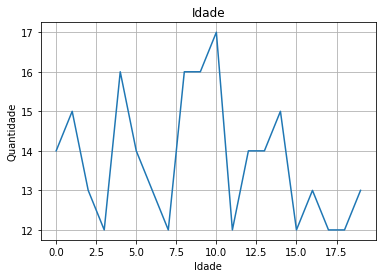

In [ ]:
def graficoLinha(planilha, coluna):
    planilha[coluna].plot()
    plt.xlabel(coluna)
    plt.ylabel('Quantidade')

    plt.title(coluna)
    plt.grid(True)
    plt.show()

graficoLinha(tiposDados, 'Idade')

### Histograma

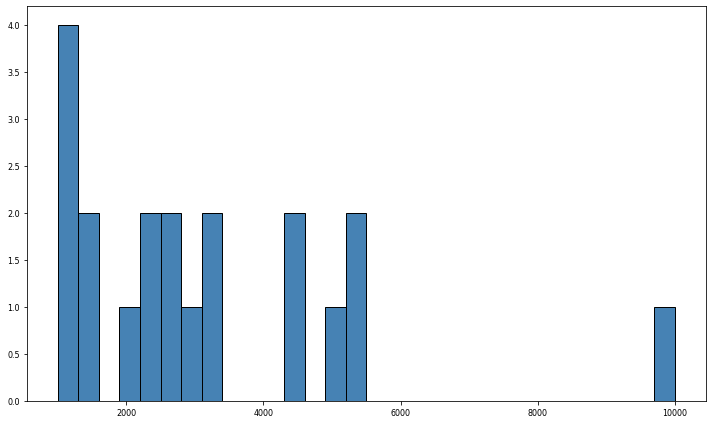

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)

_ = tiposDados.RendaFamiliar.hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout()   

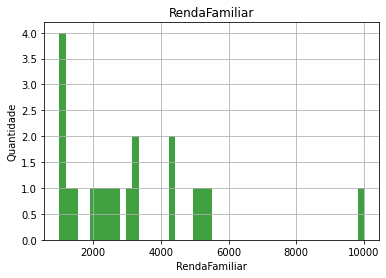

Tamanho 20, Média 3120.0, Variância 4753263.157894737, Desvio padrão 2180.197963005822


In [ ]:
def histograma(planilha, coluna):
    n, bins, patches = plt.hist(planilha[coluna],  facecolor='g', alpha=0.75, bins=50)
    plt.xlabel(coluna)
    plt.ylabel('Quantidade')

    plt.title(coluna)
    plt.grid(True)
    plt.show()
    
    print('Tamanho {}, Média {}, Variância {}, Desvio padrão {}'.format(len(planilha),planilha[coluna].mean(),planilha[coluna].var(),planilha[coluna].std()))

histograma(tiposDados, 'RendaFamiliar')

### BoxPlot

O BoxPlot traz as seguintes marcas:

-Caixa definida pelo primeiro quartil, mediana e terceiro quartil

-Fios alongados para além da caixa na distância 1,5 X (Q3 - Q1). Para distribuições não simétricas, as medidas inferior e superior do fio são ajustadas, com multiplicadores distintos da relação anterior. Nesses casos, os fios não são simétricos em relação à caixa (Detalhes em https://en.wikipedia.org/wiki/Box_plot).

-Outliers marcados além da extensão do fio

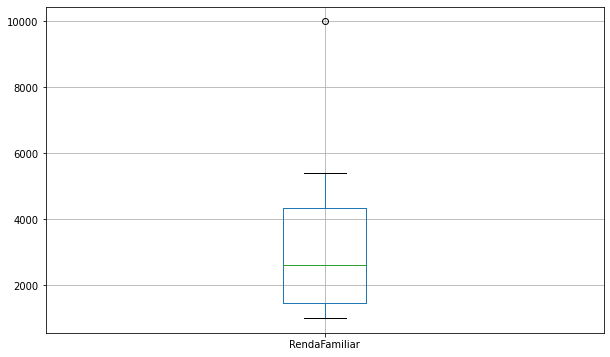

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
tiposDados.boxplot(column=['RendaFamiliar'], figsize=figsize, ax=ax)

## Demonstração 1

In [ ]:


mean = 3000
std = 1000
rv = norm(loc=mean, scale=std)
np.random.seed(1)
resultado = rv.rvs(size=10000)

exercicio = pd.DataFrame()
exercicio['RendaFamiliar'] = resultado
exercicio = exercicio.loc[exercicio['RendaFamiliar']>=100,:]
exercicio.head()

,RendaFamiliar
0,4624.345364
1,2388.243586
2,2471.828248
3,1927.031378
4,3865.407629


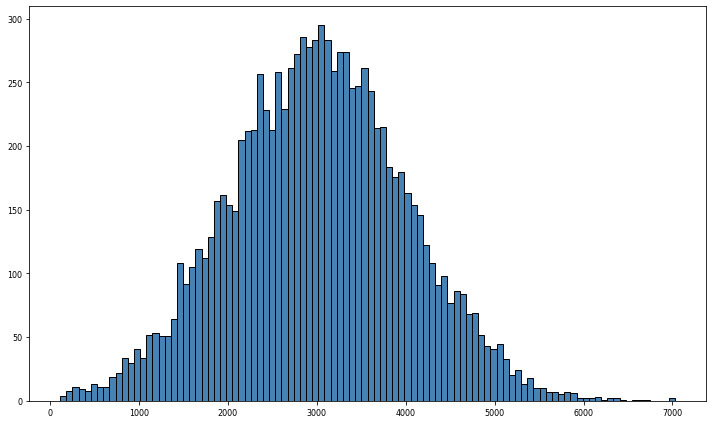

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)

_ = exercicio.RendaFamiliar.hist(bins=100, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout()   

In [ ]:
exercicio.describe()

,RendaFamiliar
count,9986.000000
mean,3014.196759
std,992.492564
min,113.305934
25%,2339.530188
50%,3010.956897
75%,3672.809676
max,7026.849045


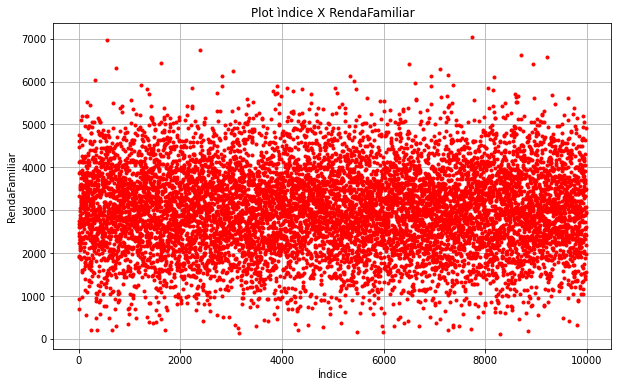

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.subplots(figsize=figsize)
plt.plot(range(len(exercicio)), 
         exercicio.RendaFamiliar,
         'r.'
         )
plt.xlabel('Índice')
plt.ylabel('RendaFamiliar')
plt.title('Plot ìndice X RendaFamiliar')
plt.grid(True)
plt.show()
plt.tight_layout()

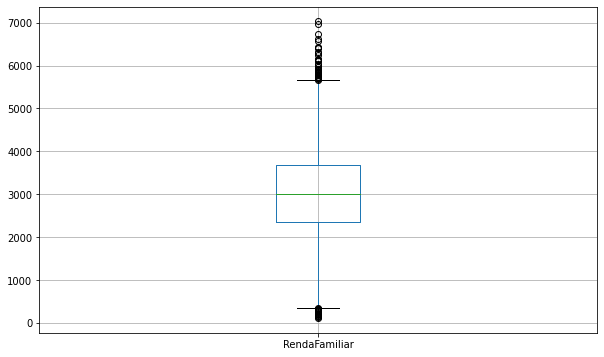

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
exercicio.boxplot(column=['RendaFamiliar'], figsize=figsize, ax=ax)

In [ ]:
print(exercicio.RendaFamiliar.kurtosis())
print(exercicio.RendaFamiliar.skew())

-0.035800956782655824
0.057605487472159586


## Demonstração 2

In [ ]:
from scipy.stats import lognorm
s = 0.8
rv = lognorm(s=s)

resultado = rv.rvs(size=10000)

exercicio = pd.DataFrame()
exercicio['RendaFamiliar'] = resultado*2300
exercicio = exercicio.loc[exercicio['RendaFamiliar']>=100,:]
exercicio.head()

,RendaFamiliar
0,2085.336009
1,2760.591527
2,1735.099948
3,1183.488424
4,1866.448207


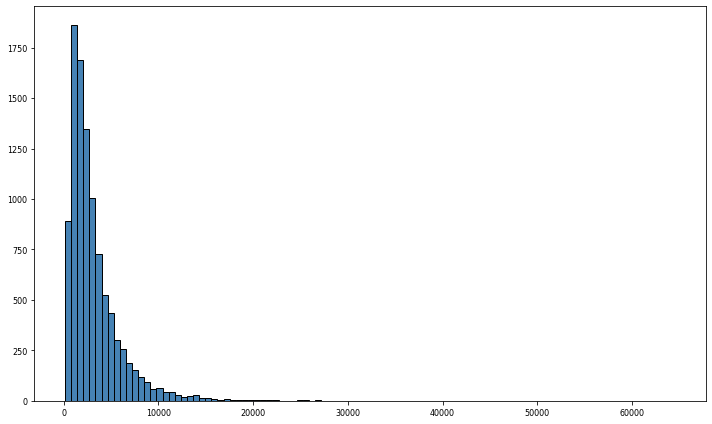

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)

_ = exercicio.RendaFamiliar.hist(bins=100, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout()  

In [ ]:
exercicio.describe()

,RendaFamiliar
count,10000.000000
mean,3189.318934
std,3012.494193
min,145.407781
25%,1343.225231
50%,2334.858583
75%,3990.257778
max,64547.621248


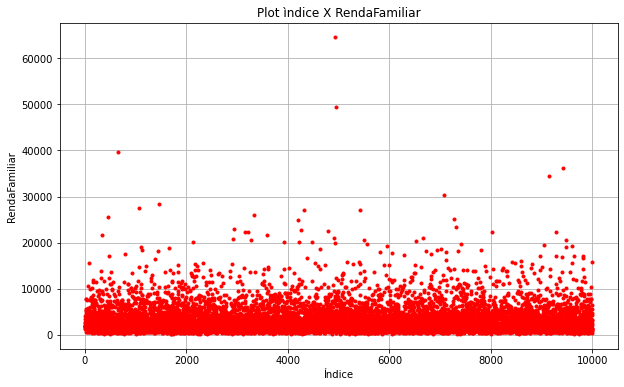

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.subplots(figsize=figsize)
plt.plot(range(len(exercicio)), 
         exercicio.RendaFamiliar,
         'r.'
         )
plt.xlabel('Índice')
plt.ylabel('RendaFamiliar')
plt.title('Plot ìndice X RendaFamiliar')
plt.grid(True)
plt.show()
plt.tight_layout()

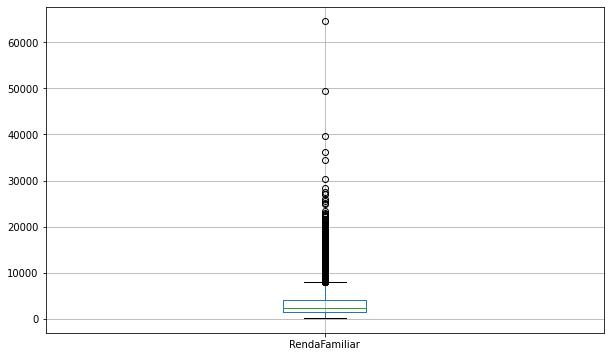

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
exercicio.boxplot(column=['RendaFamiliar'], figsize=figsize, ax=ax)

In [ ]:
print(exercicio.RendaFamiliar.kurtosis())
print(exercicio.RendaFamiliar.skew())

36.20091799931582
3.912815780317731


## **Exercício**

Utilizando os dados da Mega Sena, calcule o valor médio dos prêmios, o desvio padrão, plote o histograma e o boxplot dos valores dos prêmios.

Faça o mesmo para o ganho médio por acertador.

Faça um programa que sorteie 6 números aleatórios. Escolha uma aposta e veja quantos concursos demoraria para você acertar. Veja quando você gastaria apostando 6 números em cada concurso (1 bilhete custa R$ 4,50). Compare o quanto você gastaria com o ganho médio calculado acima para ver se teria valido a pena.

E apostando 7 números (valor aposta R$ 24,50)?


In [ ]:


def procura(aposta_, sorteio_):
  local = False
  if(sorteio_[0] in aposta_):
    local = aposta_.index(sorteio_[0])
    if (len(aposta_)-local)>=6:
      local = (aposta_[local:local+6] == sorteio_) 
    else:
      local = False
  return local

#not procura([16, 32, 35, 43, 45, 59, 60],[17,31, 35, 43, 45, 59])

In [ ]:
aposta = [16, 32, 35, 43, 45, 59]

acumulador = 0
repeticoes = 2

for i in range(repeticoes):
  contador=1
  sorteio = [0,0,0,0,0,0]
  while(not procura(aposta , sorteio)):
    sorteio=random.sample(population=range(1,61,1), k=6)
    sorteio.sort()
    contador+=1
  acumulador += contador 
  print(aposta , sorteio, contador)

print('Gasto: ',(4.5*acumulador/repeticoes))

[16, 32, 35, 43, 45, 59] [16, 32, 35, 43, 45, 59] 38866500
[16, 32, 35, 43, 45, 59] [16, 32, 35, 43, 45, 59] 34443721


In [ ]:
aposta = [ 11, 26, 32, 35, 43, 45, 59]

acumulador = 0
repeticoes = 2

for i in range(2):
  contador=1
  sorteio = [0,0,0,0,0,0]
  while(not procura(aposta , sorteio)):
    sorteio=random.sample(population=range(1,61,1), k=6)
    sorteio.sort()
    contador+=1
  acumulador += contador 
  print(aposta , sorteio, contador)


print('Gasto: ',(24.5*acumulador/repeticoes))

[11, 26, 32, 35, 43, 45, 59] [11, 26, 32, 35, 43, 45] 14766228
[11, 26, 32, 35, 43, 45, 59] [26, 32, 35, 43, 45, 59] 41092034
Gasto:  684263709.5


# Amostragem

## Geração de dados simulando toda a população

In [ ]:
#TamanhoPopulacao = 146656000
TamanhoPopulacao = 150000
Regioes = ['Sul','Sudeste', 'Norte', 'Nordeste',  'CentroOeste']
Candidatos = ['B', 'H', 'C', 'I']
PercentualVotosSexoMasculinoPorCandidato = [0.65, 0.3, 0.5, 0.4]
PercentualEleitoresRegiao = [0.143, 0.418, 0.080, 0.287, 0.072]
MediaSalarioRegiao = [2286, 2541, 2025, 1920, 2155]
eleitoresRegiao = np.multiply(PercentualEleitoresRegiao,TamanhoPopulacao).astype(int).tolist()
eleitoresRegiao

[21450, 62700, 12000, 43050, 10800]

In [ ]:
populacao = pd.DataFrame( columns=['Regiao', 'Voto', 'Sexo', 'Salario', 'Idade'])

In [ ]:
# Define votação
PercentualVotosRegiaoCandidato = [0.57,0.2,0.09,                             
                                  0.53,0.19,0.12,
                                  0.43,0.37,0.09,
                                  0.26,0.51,0.17,
                                 0.58,0.21,0.18]
i = 0
j = 0
TempVotos = []
for x in Regioes:
    print(x)
    
    B = int(eleitoresRegiao[i] * PercentualVotosRegiaoCandidato[j])
    j+=1
    H = int(eleitoresRegiao[i] * PercentualVotosRegiaoCandidato[j])
    j+=1
    C = int(eleitoresRegiao[i] * PercentualVotosRegiaoCandidato[j])
    j+=1
    I = eleitoresRegiao[i]-B-H-C
    TempVotos = TempVotos + ['B']*B + ['H']*H + ['C']*C + ['I']*I
    
    i+=1
    
populacao.Voto = TempVotos
        

len(populacao)

Sul
Sudeste
Norte
Nordeste
CentroOeste


150000

In [ ]:
# Define Região
populacao.Regiao = ['Sul']*eleitoresRegiao[0] + \
['Sudeste']*eleitoresRegiao[1] + \
['Norte']*eleitoresRegiao[2] + \
['Nordeste']*eleitoresRegiao[3] + \
['CentroOeste']*eleitoresRegiao[4]

len(populacao)

150000

In [ ]:
# Define Salário
i = 0
for x in Regioes:
    print(x)
    tamanho = len(populacao.loc[populacao.Regiao == x,:])
    populacao.loc[populacao.Regiao == x,'Salario'] = norm(loc=MediaSalarioRegiao[i], scale=0.5*MediaSalarioRegiao[i]).rvs(size=tamanho)
    i+=1

    
populacao.Salario =     populacao.Salario.astype('int')

len(populacao)

Sul
Sudeste
Norte
Nordeste
CentroOeste


150000

In [ ]:
# Define sexo
i = 0
for x in Candidatos:
    print(x)
    tamanho = len(populacao.loc[populacao.Voto == x,:])
    votosMasculinos = int(tamanho*PercentualVotosSexoMasculinoPorCandidato[i])
    votosFemininos = tamanho - votosMasculinos
    populacao.loc[populacao.Voto == x,'Sexo'] = ['M'] * votosMasculinos + ['F'] * votosFemininos
    i+=1    
len(populacao)

B
H
C
I


150000

In [ ]:
populacao = populacao.loc[populacao.Salario >=100,:]

In [ ]:
print(populacao.Salario.max())
print(populacao.Salario.min())
populacao['Escolaridade'] = 0
populacao.Escolaridade = (populacao.Salario/1000).astype('int')
populacao.loc[populacao.Escolaridade>=4,'Escolaridade'] = 4
populacao.Escolaridade.unique()

7693
100


array([2, 1, 3, 4, 0])

In [ ]:
populacao.Idade = (populacao.Salario/100 * 2).astype('int')
populacao.Idade = populacao.Idade - populacao.Idade.min() 
populacao.Idade = populacao.Idade * 80 / populacao.Idade.max()
populacao.Idade = populacao.Idade + 18
populacao.Idade = populacao.Idade.astype('int')
len(populacao)

145891

In [ ]:
populacao = shuffle(populacao)

In [ ]:
populacaoEleicao = populacao.copy()

In [ ]:
populacao.head()

,Regiao,Voto,Sexo,Salario,Idade,Escolaridade
94956,Norte,I,F,1435,31,1
75097,Sudeste,I,M,2204,40,2
104336,Nordeste,B,F,2210,40,2
67518,Sudeste,C,M,993,27,0
64940,Sudeste,H,F,1956,37,1


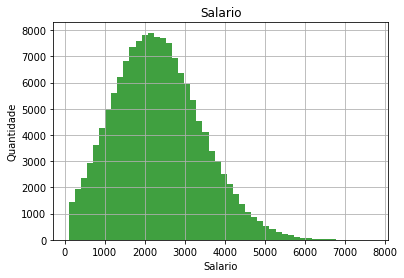

Tamanho 145891, Média 2333.1058187276803, Variância 1196807.5972470338, Desvio padrão 1093.9870187744614


In [ ]:
histograma(populacao,'Salario')

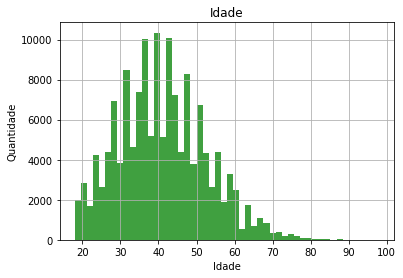

Tamanho 145891, Média 40.915772734438725, Variância 134.17293176609522, Desvio padrão 11.583304009050924


In [ ]:
histograma(populacao,'Idade')

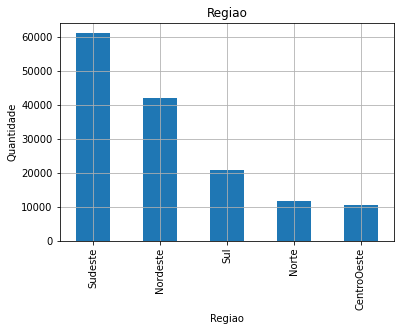

Sudeste        0.418045
Nordeste       0.286920
Sul            0.143059
Norte          0.079888
CentroOeste    0.072088
Name: Regiao, dtype: float64


In [ ]:
graficoBarra(populacao,'Regiao')

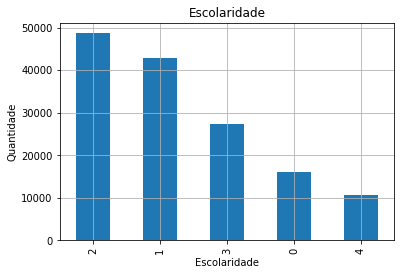

2    0.333550
1    0.293726
3    0.188134
0    0.110665
4    0.073925
Name: Escolaridade, dtype: float64


In [ ]:
graficoBarra(populacao.sort_values(by='Escolaridade'),'Escolaridade')

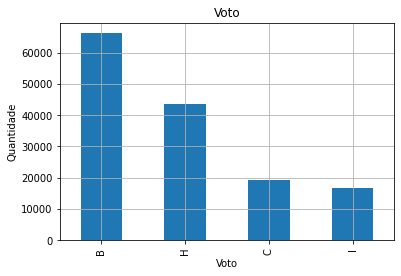

B    0.453853
H    0.299018
C    0.132030
I    0.115100
Name: Voto, dtype: float64


In [ ]:
graficoBarra(populacao,'Voto')

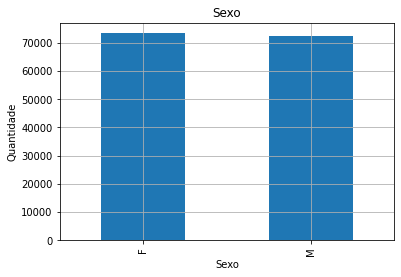

F    0.503335
M    0.496665
Name: Sexo, dtype: float64


In [ ]:
graficoBarra(populacao,'Sexo')

In [ ]:
populacao.Idade.mean()

40.915772734438725

In [ ]:
recupera_amostra(populacao, 1000).Idade.mean()

41.001

In [ ]:
recupera_amostra(populacao, 100).Idade.mean()

40.08

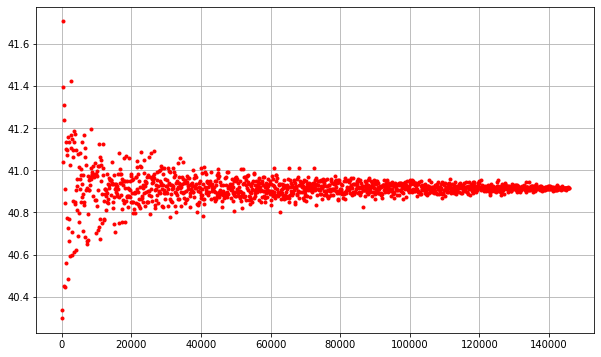

<Figure size 432x288 with 0 Axes>

In [ ]:
i=0
resultados =pd.DataFrame(columns=['tamanho','media'])
for tamanho in range(10,len(populacao),100):
  resultados.loc[i]=[tamanho,recupera_amostra(populacao, tamanho).Idade.mean()]
  i+=1

plt.subplots(figsize=figsize)

resultados = resultados.loc[:,['tamanho','media']].values

plt.plot(resultados[:,0], 
         resultados[:,1],
         'r.'
         )

plt.grid(True)
plt.show()
plt.tight_layout()

## Tudo começa pelo estudo da probabilidade

Probabilidade é a frequência, no longo prazo, de determinado resultado de um processo estocástico.

Por exemplo, o lançamento de uma moeda "honesta", realizado várias vezes, produzirá um número de caras e coroas idêntico, ou seja, a frequência de caras será igual à de coroas (50%), que corresponde à probabilidade de obter uma cara ou uma coroa em qualquer lançamento (0,5). 

Probabilidade é, então, a medida de certeza com que podemos esperar a ocorrência de determinado evento, resultado de um experimento aleatório. 

A probabilidade recebe um número no intervalo de zero a um. Já a frequência e apresentada como percentual, variando de 0 a 100.

A probabilidade não dá certeza alguma sobre um evento específico, apenas garante que, no longo prazo, a frequência se aproximará da probabilidade.

Conforme demonstrado no exemplo anterior, quanto maior o número de experimentos, mais a frequência irá se aproximar da probabilidade real. 

## Probabilidade - Variáveis aleatórias

Variável aleatória (X) é o resultado de um processo estocástico. Por exemplo, o resultado de um lançamento de um dado é uma variável aleatória.

A variável aleatória pode assumir um conjunto de valores (x), que formam o espaço amostral da variável. No lançamento do dado, os valores possíveis são os números de 1 a 6.

A cada valor possível da variável aleatória podemos associar uma probabilidade, que é a frequência, no longo prazo, que a variável assumirá tal valor. No lançamento do dado (honesto), cada valor possível no espaço amostral tem probabilidade 1/6. Ao conjunto de probabilidades associadas aos valores possíveis, chamamos de distribuição de probabilidade da variável aleatória X.

Quando o espaço amostral é finito ou infinito enumerável é chamado espaço discreto (variável aleatória discreta), por exemplo o lançamento de um dado.

Se o espaço amostral é infinito não-enumerável é chamado espaço não-discreto ou contínuo (variável aleatória contínua), por exemplo a temperatura medida em cada dia do ano.

Veja a representação (Fonte: https://pt.wikipedia.org/wiki/Variável_aleatória)

## Probability Mass Function (PMF) e Probability Density Function (PDF)

Conforme exposto, é a função que associa a cada valor possível de uma variável aleatória uma probabilidade.

Caso a variável seja discreta, teremos uma <b>PMF</b>, caso a variável seja contínua, teremos uma <b>PDF</b>.

ATENÇÃO: a PMF dá a probabilidade de um ponto do espaço amostral, a PDF dá a probabilidade num intervalo, considerando que, para variáveis contínuas, a probabilidade de cada ponto é zero. Entretanto, as funções em python que implementam a PDF estimam a probabilidade do ponto pela probabilidade do intervalo infinitesimal.

Tomando como exemplo a variável aleatória que representa o número de caras obtidas em 30 lançamentos de uma moeda honesta (variável discreta), sua PMF é demonstrada a seguir:

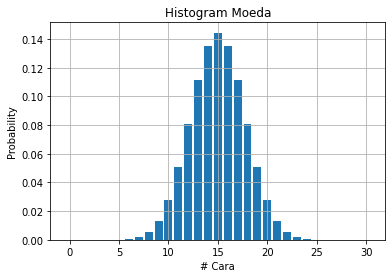

Valor da PMF em 15: 0.14446444809436654, correspondente à probabilidade de 15 caras em 30 lançamentos
Valor da PMF em 0: 9.313225746154793e-10, correspondente à probabilidade de 0 caras em 30 lançamentos
Soma das probabilidades 0.9999999999999932


In [ ]:
# Usando scipy

from scipy.stats import binom
tentativas = 30
rv = binom(tentativas, 1/2)

resultado = rv.pmf(range(0,31,1))

plt.bar(range(0,31,1),resultado)

plt.xlabel('# Cara')
plt.ylabel('Probability')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

print('Valor da PMF em 15: {}, correspondente à probabilidade de 15 caras em 30 lançamentos'.format(rv.pmf(15)))
print('Valor da PMF em 0: {}, correspondente à probabilidade de 0 caras em 30 lançamentos'.format(rv.pmf(0)))
print('Soma das probabilidades {}'.format(sum(resultado)))

Veja a semelhança entre a função distribuição de probabilidade e o histograma estudado na estatística descritiva

## Distribuições de probabilidade

Fonte https://ichi.pro/pt/compreendendo-a-distribuicao-de-probabilidade-199837344978276

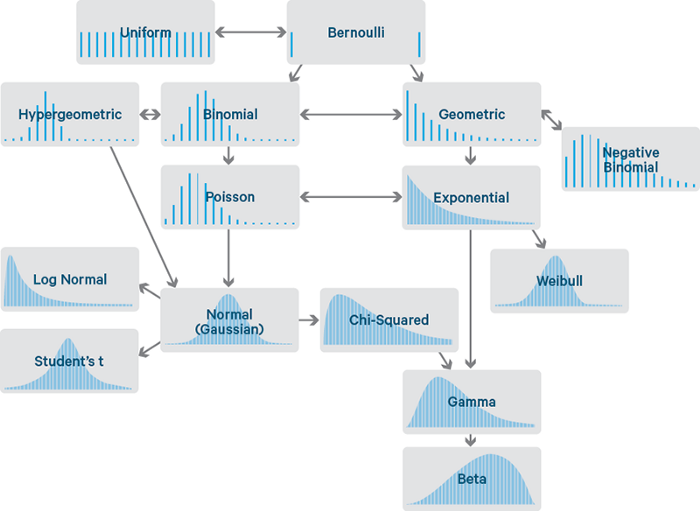

## Distribuições discretas



Bernoulli - distribuição que representa uma escolha binária, com probabilidades p e 1-p. Como exemplo um lançamento de uma moeda.

Binomial - representa a soma de sucessos em n execuções de um processo binário. Como exemplo o número de caras em n lançamentos de uma moeda. Outro exemplo é o número de bolas pretas retiradas de um cesto contendo bolas brancas e pretas (com reposição).

Hipergeométrica - representa a soma de bolas pretas retiradas de um cesto contendo bolas brancas e pretas (sem reposição).

Poisson - número de chamdas recebidas num intervalo de tempo.

Discrete Uniform - cada ponto do espaço tem igual probabilidade. Como exemplo o lançamento de um dado.

Geométrica - número de fracassos antes de um sucesso. Por exemplo, no lançamento de moeda, o número de coroas antes de uma cara.

Binomial negativa - número de fracassos antes de n sucessos

Uniform

## Distribuições contínuas

Exponencial - tempo decorrido entre chamadas de um call center, com taxa de chamadas constante.

Weibull - tempo até falha, quando a taxa de falha não é constante no tempo.

Chi2 - soma de quadrados de valores normalmente distribuídos

Gama - tempo até n eventos ocorrerem

Normal - soma de variáveis aleatórias

Log-normal - utilizada quando o logarítmo dos valores é distribuído segundo a normal. Produto de variáveis aleatórias

Uniform

### Distribuição Normal

Pela importância, vamos estudar algumas propriedades da normal

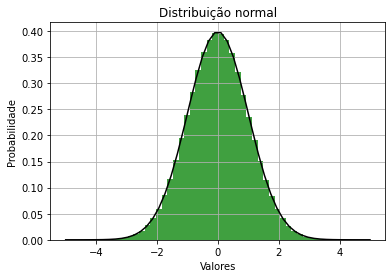

In [ ]:
# Normal
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
# Equivalente a np.random.normal(loc=0.0, scale=1.0, size=10)

from scipy.stats import norm
from scipy.stats import kstest

mean = 0
std = 1
rv = norm(loc=mean, scale=std)
np.random.seed(1)
resultado = rv.rvs(size=1000000)

n, bins, patches = plt.hist(resultado, density=True, facecolor='g', alpha=0.75, bins=50)
intervalo = np.linspace(mean-5*std,mean+5*std, num=50)

plt.plot(intervalo, rv.pdf(intervalo), 'k-', label='pdf')
plt.xlabel('Valores')
plt.ylabel('Probabilidade')

plt.title('Distribuição normal')
plt.grid(True)
plt.show()

In [ ]:
print('Probabilidade do valor 0: {}'.format(rv.pdf(0)))
print('Probabilidade de valor menor ou igual a 0: {}'.format(rv.cdf(0)))
print('Média: {}'.format(rv.mean()))
print('Variância: {}'.format(rv.var()))
print('Desvio padrão: {}'.format(rv.std()))

Probabilidade do valor 0: 0.3989422804014327
Probabilidade de valor menor ou igual a 0: 0.5
Média: 0.0
Variância: 1.0
Desvio padrão: 1.0


In [ ]:

tamanho_amostra = (len(resultado))

tamanho_amostra_entre_1_desvios = sum( (resultado>(mean-1*std)) & (resultado<(mean+1*std)) )
tamanho_amostra_entre_2_desvios = sum( (resultado>(mean-2*std)) & (resultado<(mean+2*std)) )
tamanho_amostra_entre_3_desvios = sum( (resultado>(mean-3*std)) & (resultado<(mean+3*std)) )

print('Percentual dos dados entre {} desvios: {}'.format(1,tamanho_amostra_entre_1_desvios*100/tamanho_amostra))
print('Percentual dos dados entre {} desvios: {}'.format(2,tamanho_amostra_entre_2_desvios*100/tamanho_amostra))
print('Percentual dos dados entre {} desvios: {}'.format(3,tamanho_amostra_entre_3_desvios*100/tamanho_amostra))

Percentual dos dados entre 1 desvios: 68.251
Percentual dos dados entre 2 desvios: 95.4483
Percentual dos dados entre 3 desvios: 99.7313


### Tabela de distribuição Normal

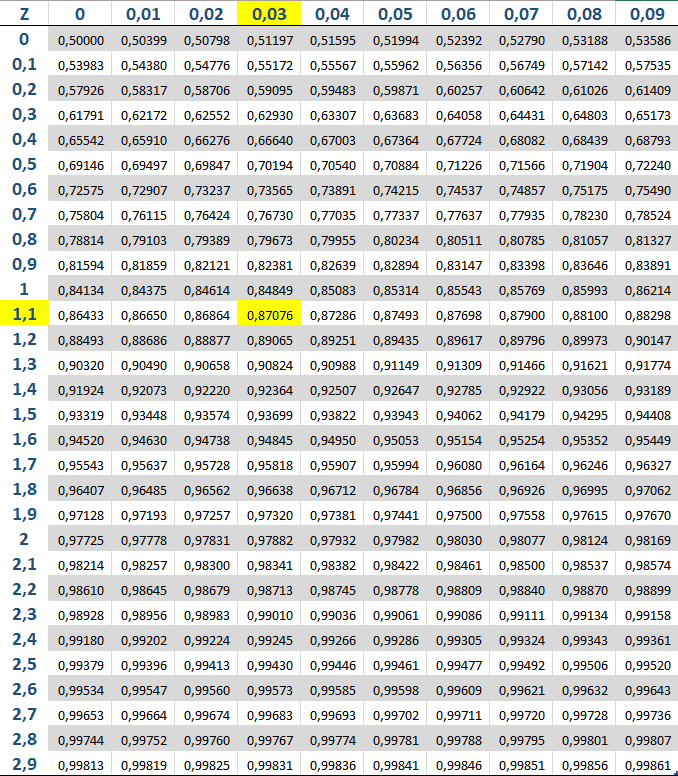

In [ ]:
#z=1
leitura_tabela = 0.84134
2*leitura_tabela-1

0.68268

##Teorema do limite central

O teorema estabelece que a distribuição da soma (ou média) de variáveis aleatórias iid (independentes e identicamente distribuídas) tende para uma distribuição normal, independente da distribuição original das variáveis. (Fonte: https://en.wikipedia.org/wiki/Central_limit_theorem)

Para compreender melhor o significado do teorema, vamos a um exemplo:

Vamos considerar 100.000 doações feitas para um candidato, cujo valor mínimo de doação foi estabelecido em R$ 48.

O comportamento esperado é que a grande maioria faça a contribuição mínima.

Haverá, porém, contribuições acima do mínimo, em valores diversos e quantidades reduzidas.

Com isso, temos uma distribuição semelhante a uma log-normal ou exponencial, veja o gráfico.

Mínimo 48.71320859823039
Máximo 113.29375136118752
Média 50.3556605601702
Desvio 2.16504884554378


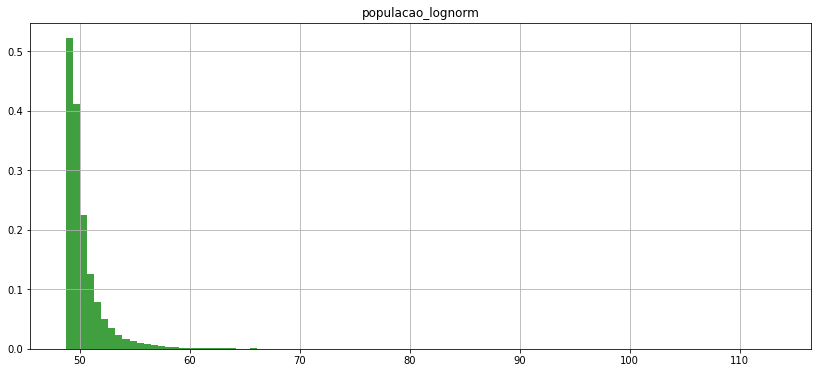

In [ ]:
# Vamos criar uma população distribuída de forma lognormal

repeticoes = 100000
mean = 50

# População lognormal
s = 1
np.random.seed(1)
rv_lognorm = stat.lognorm(s=s,loc=mean-1.3)
populacao_lognorm = rv_lognorm.rvs(size=repeticoes, random_state=random_state)


print('Mínimo {}'.format(np.min(populacao_lognorm)))
print('Máximo {}'.format(np.max(populacao_lognorm)))
print('Média {}'.format(np.mean(populacao_lognorm)))
print('Desvio {}'.format(np.std(populacao_lognorm)))

fig, axs = plt.subplots(1, 1, figsize=(14,6))

axs.hist(populacao_lognorm, density=True, facecolor='g', alpha=0.75, bins=100)
axs.grid(True)
axs.set_title('populacao_lognorm')


plt.show()

In [ ]:
# Vamos extrair 1000 amostras e calcular suas médias
amostras = 1000
np.random.seed(1)
medias = np.zeros((amostras,1))
stds = np.zeros((amostras,1))
for i in range(0,amostras,1):
  populacao_i = populacao_lognorm[np.random.randint(0, len(populacao_lognorm),amostras)]
  medias[i]=np.mean(populacao_i)
  stds[i]=np.std(populacao_i)


Média das médias das amostras 50.35413751259481
Média dos desvios das amostras 2.1426884678952556
Desvio das médias das amostras 0.06641507396782172


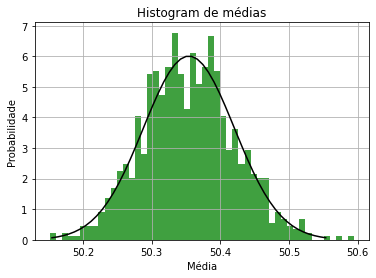

In [ ]:
# A distribuição das médias aproxima-se de uma Normal, independente da distribuição original que gerou as amostras

n, bins, patches = plt.hist(medias, density=True, facecolor='g', alpha=0.75, bins=50)

mean_ = np.mean(medias)
std_ = np.std(medias)
print('Média das médias das amostras {}'.format(mean_))
print('Média dos desvios das amostras {}'.format(np.mean(stds)))
print('Desvio das médias das amostras {}'.format(std_))

rv = norm(loc=mean_, scale=std_)

intervalo = np.linspace(mean_-3*std_,mean_+3*std_, num=50)
plt.plot(intervalo, rv.pdf(intervalo), 'k-', label='pdf')

plt.xlabel('Média')
plt.ylabel('Probabilidade')
plt.title('Histogram de médias')
plt.grid(True)
plt.show()

## Intervalo de confiança

Conforme previsto pelo teorema do limite central, a distribuição das médias das amostras (considerando que a média é uma soma de variáveis aleatórias dividida pelo número de elementos) tende para a distribuição normal.

Além disso, a média dessa distribuição tende para a média da população.

Perceba que, apesar da distribuição original das amostras ter distribuição completamente diferente da normal, as médias das amostras tendem à normal.

Uma consequência extremamente importante do teorema é que, dada a distribuição normal, tem-se que, com 95,45% de certeza, a média de qualquer amostra estará a dois desvios padrão da média da população.

No exemplo em questão, teremos:

In [ ]:
mean_ = np.mean(medias)
std_ = np.std(medias)
print('Média amostras {}'.format(mean_))
print('Desvio amostras {}'.format(std_))

print('Intervalo de 95,45% de confiança {} - {}'.format(mean_-2*std_,mean_+2*std_))

Média amostras 50.35413751259481
Desvio amostras 0.06641507396782172
Intervalo de 95,45% de confiança 50.22130736465917 - 50.48696766053045


Reforçando a conclusão acima: podemos garantir com 95,45% de confiança que qualquer amostra terá sua média entre 50,22 e 50,49.

Para testarmos tal conclusão, vamos verificar a média de dez amostras aleatórias:

In [ ]:
np.random.seed(1)
amostras = 1000
for i in range(0,10,1):
    print('Média da amostra {}: {}'.format(i,
                                np.mean(populacao_lognorm[np.random.randint(0, len(populacao_lognorm),amostras)])))

Média da amostra 0: 50.374573382448304
Média da amostra 1: 50.33350728211338
Média da amostra 2: 50.276055943041456
Média da amostra 3: 50.290345604042464
Média da amostra 4: 50.28063129794893
Média da amostra 5: 50.353915251561006
Média da amostra 6: 50.354266281732414
Média da amostra 7: 50.451055140218465
Média da amostra 8: 50.442108519148256
Média da amostra 9: 50.42318289524002


## Margem de erro

Outra conclusão importante que podemos chegar é a margem de erro.

Dado o valor da amostra, podemos estabelecer a margem de erro com 2 desvios padrão para o intervalo de confiança de 95%.

Vamos ver os resultados acima considerando a margem de erro e a média real da população (50.36):

In [ ]:
amostras = 100
tamanho_amostra=1000
np.random.seed(1)
medias = np.zeros((amostras,1))
for i in range(0,amostras,1):
    medias[i]=np.mean(populacao_lognorm[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)])

mean_ = np.mean(medias)
std_ = np.std(medias)
print('Média amostras {}'.format(mean_))
print('Desvio amostras {}'.format(std_))

print('Intervalo de 95,45% de confiança {} - {}'.format(mean_-2*std_,mean_+2*std_))

Média amostras 50.34819006418381
Desvio amostras 0.06286053001014498
Intervalo de 95,45% de confiança 50.22246900416352 - 50.4739111242041


Os exemplos acima consideraram uma amostra de 1000, correspondente a 1% da população, uma amostra relativamente grande.

Vamos diminuir nossa amostra para 100 e ver o impacto no grau de confiânça e margem de erro:

In [ ]:
amostras = 100
tamanho_amostra=100
np.random.seed(1)
medias = np.zeros((amostras,1))
for i in range(0,amostras,1):
    medias[i]=np.mean(populacao_lognorm[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)])

mean_ = np.mean(medias)
std_ = np.std(medias)
print('Média amostras {}'.format(mean_))
print('Desvio amostras {}'.format(std_))

print('Intervalo de 95,45% de confiança {} - {}'.format(mean_-2*std_,mean_+2*std_))



Média amostras 50.35796415974946
Desvio amostras 0.22886600245948152
Intervalo de 95,45% de confiança 49.90023215483049 - 50.815696164668424


## Comparação do desvio das amostras com o desvio da população

O desvio padrão das médias das amostras é igual ao desvio da população dividido pela raiz do tamanho da amostra.

Como a margem de erro é proporcional ao desvio das médias, conclui-se que:

-A margem de erro crece conforme for maior o desvio padrão da população

-A margem de erro diminui com o aumento do número de amostras

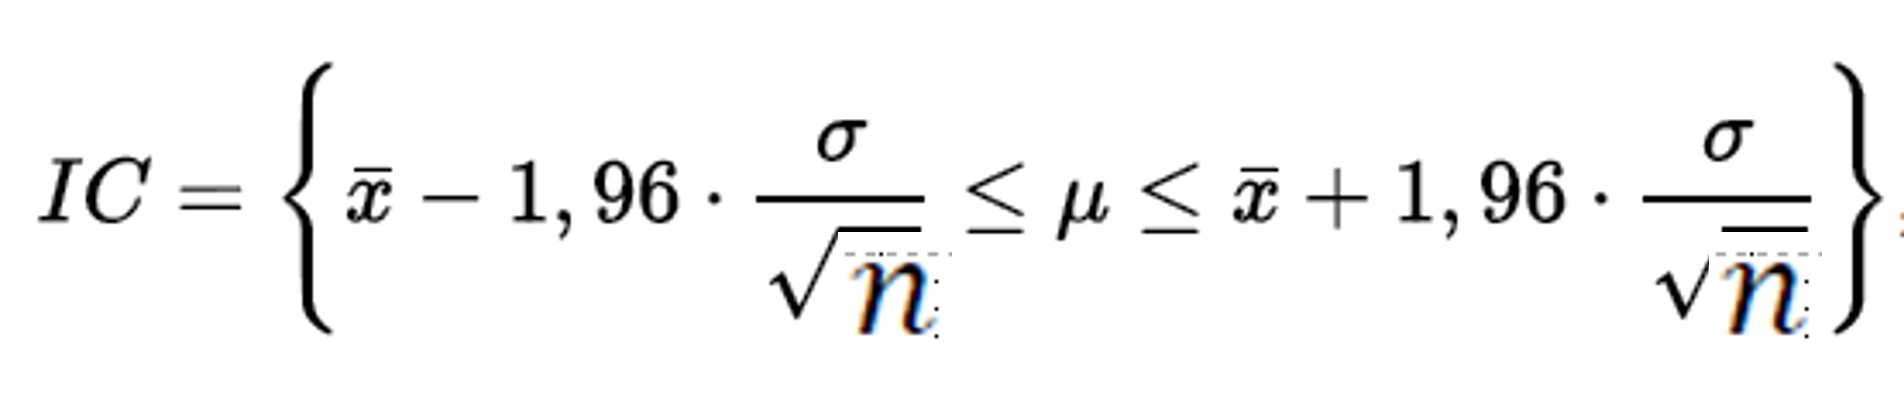

## Generalizando o resultado

Fixado o intervalo de confiânça, estabelecemos a quantidade de desvios padrão.
Para 95,45%, temos dois desvios padrão.

Dada uma amostra, a margem de erro será 2x(desvio_populacao/raiz(tamanho_amostra))

Como não sabemos o desvio padrão da população, vamos aproximá-lo com o desvio da amostra. Como o desvio da amostra aproxima o desvio da população, devemos, da mesma forma, dividi-la pela raiz(tamanho_amostra).

Assim, a margem de erro será calculada como (2xdesvio_amostra/raiz(tamanho_amostra))/média_amostra.

Um exemplo:

In [ ]:
np.random.seed(1)
amostra_100_elementos = populacao_lognorm[np.random.randint(0, len(populacao_lognorm),100)]
media_uma_amostra = np.mean(amostra_100_elementos)
print('Média amostra {}'.format(media_uma_amostra))
desvio_uma_amostra = np.std(amostra_100_elementos)
print('Desvio amostra {}'.format(desvio_uma_amostra))
desvio_corrigido_uma_amostra = desvio_uma_amostra/np.sqrt(len(amostra_100_elementos))
print('Desvio estimado amostras {}'.format(desvio_corrigido_uma_amostra))
print('Margem erro {}'.format(2*desvio_corrigido_uma_amostra))
print('A média da população estará entre {} e {}'.format(media_uma_amostra-2*desvio_corrigido_uma_amostra,
                                                        2*desvio_corrigido_uma_amostra+media_uma_amostra
                                                         ))



Média amostra 50.22819365767051
Desvio amostra 1.7409300449205123
Desvio estimado amostras 0.17409300449205123
Margem erro 0.34818600898410246
A média da população estará entre 49.88000764868641 e 50.57637966665461


## E se o intervalo de confiança desejado for diferente do fornecido por um desvio padrão?

Utilizar a função interval para localizar os pontos exatos que indicarão os limites para alcançar a probabilidade indicada.

No caso de desejar 99% de confiânça, multiplicar por 2,58 o desvio padrão, não por 2 como no caso de 95% de confiança.

In [ ]:
from scipy.stats import norm


mean = 0
std = 1
rv = norm(loc=mean, scale=std)

print(rv.std() )
print(rv.interval(0.9545))

print(rv.interval(0.99))

1.0
(-2.0000024438996036, 2.0000024438996027)
(-2.5758293035489004, 2.5758293035489004)


## Distribuição t de Student

Quando utilizado o desvio padrão da amostra no lugar do desvio da população, o correto é usar a distribuição t de Student no lugar da distribuição Normal para cálculo do intervalo de confiança.

Entretanto, a distribuição t aproxima-se da Normal para amostras com mais de 30 elementos, por isso mantivemos a distribuição Normal nos cálculos acima.

No exemplo seguinte, para 100 elementos na amostra (graus de liberdade = amostras-1), os valores são muito semelhantes aos obtidos para a Normal no exemplo acima.

In [ ]:
from scipy.stats import t
from scipy.stats import kstest


rv = t(df=(100-1))

print(rv.std() )
print(rv.interval(0.9545))

print(rv.interval(0.99))

1.0102566786223346
(-2.025570485160515, 2.025570485160514)
(-2.6264054563851857, 2.6264054563851857)


## Funções Úteis

In [ ]:
from scipy.stats import t
from scipy.stats import norm

# Funções para cálculo do valor Z

# Calcula número de desvios na distribuição t de student para determinada confianca


def calcula_Z_tstudent(confianca, tamanho_amostra):
    mean = 0
    std = 1
    rv = t(df=(tamanho_amostra-1))
    return rv.interval(confianca)[1]

# Calcula número de desvios na distribuição normal para determinada confianca


def calcula_Z_normal(confianca):
    mean = 0
    std = 1
    rv = norm(loc=mean, scale=std)
    return rv.interval(confianca)[1]

# Calcula número de desvios na distribuição normal para determinada confianca e múltiplas proporções

def calcula_Z_Multiplas_Proporcoes(confianca, numero_proporcoes):
    area = math.pow(  confianca, 1/(numero_proporcoes-1) )
    return calcula_Z_normal(area)


# Função que calcula intervalo de confiança para média com base em uma amostra e a confiança desejada

def calcula_intervalo_media(amostra, confianca, tamanho_populacao=0):
    tamanho_amostra = len(amostra)
    
    #1-Calcule a média da amostra ex. media_amostra = np.mean(amostra)
    media_amostra = np.mean(amostra)
    print('média amostra:',media_amostra)

    #2-Calcule o desvio da amostra ex. desvio_amostra = np.std(amostra)
    desvio_amostra = np.std(amostra)

    #3-Calcule quantos desvios precisará para seu grau de confiânça ex. numero_desvios = calcula_numero_desvios_tstudent_para_confianca(confiança, tamanho_amostra)
    numero_desvios = calcula_Z_tstudent(confianca, tamanho_amostra)

    #4-Calcule o desvio das amostras ex. desvio_amostras = desvio_amostra/np.sqrt(tamanho_amostra)
    desvio_amostras = desvio_amostra/np.sqrt(tamanho_amostra)

    #5-Calcule a margem de erro ex. margem_erro = numero_desvios*desvio_amostras
    margem_erro = numero_desvios*desvio_amostras
    #print('margem_erro:',margem_erro)
    
    if (tamanho_populacao!=0) & (tamanho_amostra>0.05*tamanho_populacao):
        margem_erro = margem_erro * (np.sqrt(tamanho_populacao-tamanho_amostra)/np.sqrt(tamanho_populacao-1))

    #6-Calcule o intervalo ex. inferior = media_amostra-margem_erro, superior = media_amostra+margem_erro
    inferior = media_amostra-margem_erro
    superior = media_amostra+margem_erro

    #print('intervalo confiança:',inferior,superior)

    return inferior,superior


# Função que calcula intervalo de confiança para proporção de determinado valor com base em uma amostra e a confiança desejada
# O parâmetro valor representa a categoria na amostra para a qual se deseja o intervalo de confiança da proporção, por exemplo o nome de um candidato

def calcula_intervalo_proporcao(amostra, confianca, valor, tamanho_populacao=0):
    tamanho_amostra = len(amostra)
    
    proporcao_valor = Counter(amostra)[valor]/tamanho_amostra
    
    numero_desvios = calcula_Z_tstudent(confianca, tamanho_amostra)

    margem_erro = numero_desvios*np.sqrt(proporcao_valor*(1-proporcao_valor))/np.sqrt(tamanho_amostra)
    
    if (tamanho_populacao!=0) & (tamanho_amostra>0.05*tamanho_populacao):
        margem_erro = margem_erro * (np.sqrt(tamanho_populacao-tamanho_amostra)/np.sqrt(tamanho_populacao-1))

    inferior = proporcao_valor-margem_erro
    superior = proporcao_valor+margem_erro

    return inferior,superior


# Função para cálculo do número de amostras para médias e somas

def Tamanho_Amostra_Valor_Pontual(Tamanho_Populacao, Grau_Confianca, Variancia, Margem_Erro):
    Numero_Desvios = calcula_Z_normal(Grau_Confianca)
    return math.ceil( 
            (Tamanho_Populacao * math.pow(Numero_Desvios,2) * Variancia) / \
            ( (Tamanho_Populacao-1)*math.pow(Margem_Erro,2) + math.pow(Numero_Desvios,2)*Variancia )
            )


# Função para cálculo do número de amostras para proporções simples

def Tamanho_Amostra_Proporcao_Simples(Tamanho_Populacao, Grau_Confianca, Proporcao, Margem_Erro):
    Numero_Desvios = calcula_Z_normal(Grau_Confianca)
    return math.ceil( 
            (Tamanho_Populacao * math.pow(Numero_Desvios,2) * Proporcao * (1-Proporcao)) / \
            ( (Tamanho_Populacao-1)*math.pow(Margem_Erro,2) + math.pow(Numero_Desvios,2)*Proporcao*(1-Proporcao) )
            )


# Função para cálculo do tamanho da amostra para proporções múltiplas

def Tamanho_Amostra_Proporcao_Multipla(Tamanho_Populacao, Confianca, Numero_Proporcoes, Margem_Erro):
    Confianca_ = calcula_Z_Multiplas_Proporcoes(Confianca, Numero_Proporcoes)
    return math.ceil( 
            (Tamanho_Populacao * math.pow(Confianca_,2) * 0.25 ) / \
            ( (Tamanho_Populacao-1)*math.pow(Margem_Erro,2) + math.pow(Confianca_,2)*0.25 )
            )                

In [ ]:
calcula_Z_normal(0.99)

2.5758293035489004

## Como utilizar as funções auxiliares - Valor pontual

In [ ]:
# Define população

mean = 160
std = 5
distribuicao_probabilidades = norm(loc=mean, scale=std)

tamanho_populacao = 100000

populacao = distribuicao_probabilidades.rvs(size=tamanho_populacao, random_state=1)

print('Tamanho população {}, média {}, desvio {}'.format(len(populacao), np.mean(populacao), np.std(populacao)))

Tamanho população 100000, média 160.0262651424484, desvio 4.991646367708681


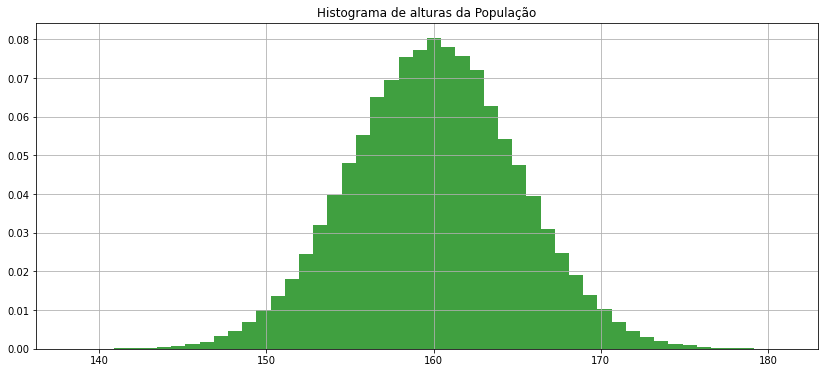

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(14,6))

axs.hist(populacao, density=True, facecolor='g', alpha=0.75, bins=50)
axs.grid(True)
axs.set_title('Histograma de alturas da População')

plt.show()

In [ ]:
tamanho_amostra = 100
amostra = recupera_amostra(populacao, tamanho_amostra)

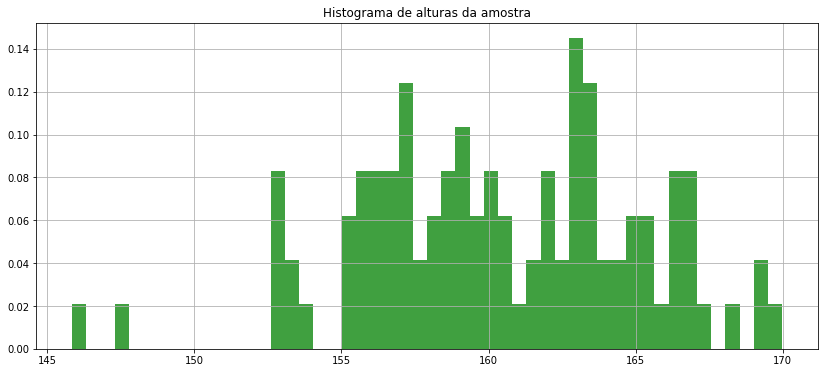

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(14,6))

axs.hist(amostra, density=True, facecolor='g', alpha=0.75, bins=50)
axs.grid(True)
axs.set_title('Histograma de alturas da amostra')

plt.show()

In [ ]:
#Dada uma amostra de 100 elementos, calcule a média da altura da populacao considerando confiança de 93%
tamanho_amostra = 100
confianca = 0.93

#1-Calcule a média da amostra ex. media_amostra = np.mean(amostra)
media_amostra = np.mean(amostra)

#2-Calcule o desvio da amostra ex. desvio_amostra = np.std(amostra)
desvio_amostra = np.std(amostra)

#3-Calcule quantos desvios precisará para seu grau de confiânça ex. numero_desvios = calcula_numero_desvios_tstudent_para_confianca(confiança, tamanho_amostra)
numero_desvios = calcula_Z_tstudent(confianca, tamanho_amostra)

#4-Calcule o desvio das amostras ex. desvio_amostras = desvio_amostra/np.sqrt(tamanho_amostra)
desvio_amostras = desvio_amostra/np.sqrt(tamanho_amostra)

#5-Calcule a margem de erro ex. margem_erro = numero_desvios*desvio_amostras
margem_erro = numero_desvios*desvio_amostras

#6-Calcule o intervalo ex. inferior = media_amostra-margem_erro, superior = media_amostra+margem_erro
inferior = media_amostra-margem_erro
superior = media_amostra+margem_erro

print('A média da população estará entre {} e {} com confiança {}'.format(inferior,superior,confianca))

A média da população estará entre 159.53894193724395 e 161.24292951464847 com confiança 0.93


In [ ]:
calcula_intervalo_media(amostra, confianca, tamanho_populacao=tamanho_populacao)

média amostra: 160.3909357259462


(159.53894193724395, 161.24292951464847)

## Como utilizar as funções auxiliares - Proporção

In [ ]:
from collections import Counter

populacao = random.choices(population=['A','B'], weights=[0.47, 0.53], k=10000)

Counter(populacao)

Counter({'A': 4719, 'B': 5281})

In [ ]:
tamanho_amostra = 1000
amostra = recupera_amostra(populacao, tamanho_amostra)
confianca = 0.95
inferior,superior = calcula_intervalo_proporcao(amostra, confianca, 'A')
print('A votação do candidato estará entre {} e {} com {} de confiança'.format(inferior*100,superior*100,confianca))

A votação do candidato estará entre 41.71409092396167 e 47.88590907603833 com 0.95 de confiança


## **Exercício 1**

Vamos criar dados simulados para o uso de clínicas públicas e privadas

In [ ]:
from scipy.stats import norm


Tamanho_Populacao_Clinicas_Publicas = 1000
Tamanho_Populacao_Clinicas_Privadas = 1000
Tamanho_Populacao = Tamanho_Populacao_Clinicas_Publicas+Tamanho_Populacao_Clinicas_Privadas

populacao = pd.DataFrame( columns=['Area','Procurou_Outra_Clinica','Dias_Ate_Atendimento','Satisfacao'])

populacao.Area = ['Publico']*Tamanho_Populacao_Clinicas_Publicas + ['Privado']*Tamanho_Populacao_Clinicas_Privadas

populacao.Procurou_Outra_Clinica = ['S']*int(0.2*Tamanho_Populacao_Clinicas_Publicas) + ['N']*int(0.8*Tamanho_Populacao_Clinicas_Publicas) + ['S']*int(0.4*Tamanho_Populacao_Clinicas_Privadas) + ['N']*int(0.6*Tamanho_Populacao_Clinicas_Privadas)

rv_pub = norm(loc=80, scale=8)
rv_pri = norm(loc=50, scale=8)
populacao.Dias_Ate_Atendimento =  list(rv_pub.rvs(size=Tamanho_Populacao_Clinicas_Publicas)) + list(rv_pri.rvs(size=Tamanho_Populacao_Clinicas_Privadas))
populacao.Dias_Ate_Atendimento = populacao.Dias_Ate_Atendimento.astype('int')
populacao.loc[populacao.Dias_Ate_Atendimento <1,['Dias_Ate_Atendimento']] = 1

populacao.Satisfacao = random.choices(population=['I','R','S'], weights=[0.2,0.5,0.3], k=Tamanho_Populacao_Clinicas_Publicas)+random.choices(population=['I','R','S'], weights=[0.4,0.3,0.3], k=Tamanho_Populacao_Clinicas_Privadas)

populacao = shuffle(populacao)

populacao.head()

,Area,Procurou_Outra_Clinica,Dias_Ate_Atendimento,Satisfacao
1925,Privado,N,50,I
1724,Privado,N,45,S
1589,Privado,N,43,S
1039,Privado,S,47,I
285,Publico,N,73,S


Separe a população entre clínicas públicas e privadas

In [ ]:

Populacao_Clinicas_Publicas = populacao.loc[populacao.Area == 'Publico',:]
#Tamanho_Populacao_Clinicas_Publicas = len(Populacao_Clinicas_Publicas)
Populacao_Clinicas_Privadas = populacao.loc[populacao.Area == 'Privado',:]
#Tamanho_Populacao_Clinicas_Privadas = len(Populacao_Clinicas_Privadas)


Define margem de erro e grau de confiança

In [ ]:
Margem_Erro_Dias = 3
Margem_Erro_ProcurouOutraClinica = 0.05
Margem_Erro_Satisfacao = 0.05
    
Grau_Confianca = 0.95

Se tiver informações sobre a população, estima variância e proporções

In [ ]:
# Definições específicas (quando já se conhece a população)

Variancia_Dias_Estimada = populacao.Dias_Ate_Atendimento.var()
Proporcao_Procurou_Outra_Clinica_Estimada = sum(populacao.Procurou_Outra_Clinica == 'S')/Tamanho_Populacao
print(Variancia_Dias_Estimada,Proporcao_Procurou_Outra_Clinica_Estimada)

288.7465910455233 0.3


Se não tiver informações sobre a população, estima variância e proporções em amostra piloto (mínimo 30 elementos)

In [ ]:
# Definições específicas (quando faz amostra piloto)
# PASSO 1
# PASSO 2

Tamanho_Amostra = 50
amostra = recupera_amostra(populacao, Tamanho_Amostra)
Variancia_Dias_Estimada = amostra.Dias_Ate_Atendimento.var()
Proporcao_Procurou_Outra_Clinica_Estimada = sum(amostra.Procurou_Outra_Clinica == 'S')/Tamanho_Amostra
print('Amostra {}, variância dias {}, proporção procurou outra clínica {}'.format(
                                                            Tamanho_Amostra,
                                                            Variancia_Dias_Estimada,
                                                            Proporcao_Procurou_Outra_Clinica_Estimada))
                                                          

Amostra 50, variância dias 282.63714285714286, proporção procurou outra clínica 0.32


Cálcula tamanho amostra para Dias

In [ ]:
# PASSO 3
dias_=Tamanho_Amostra_Valor_Pontual(Tamanho_Populacao, Grau_Confianca, Variancia_Dias_Estimada, Margem_Erro_Dias)
dias_

114

Calcula tamanho amostra para procurou outra clínica

In [ ]:
# PASSO 3
procura_=Tamanho_Amostra_Proporcao_Simples(Tamanho_Populacao, Grau_Confianca, Proporcao_Procurou_Outra_Clinica_Estimada, Margem_Erro_ProcurouOutraClinica)
procura_

287

Calcula tamanho da amostra para satisfação

In [ ]:
# PASSO 3
satisfacao_=Tamanho_Amostra_Proporcao_Multipla(Tamanho_Populacao, Grau_Confianca, 3, Margem_Erro_Satisfacao)
satisfacao_

401

(PASSO 4) Se você deseja fazer os 3 levantamentos acima, qual seria o tamanho da amostra?

RESPOSTA: O maior dos três valores

In [ ]:
tamanho_amostra_ = max(dias_,procura_,satisfacao_)
tamanho_amostra_

401

(PASSO 5) Retire uma amostra da população com tamanho igual ao maior dos três valores encontrados no exercício anterior, faça a inferência de: 

dias, 

para a proporção que procurou outra clínica e 

para o grau de satisfação

(PASSO 6) Apresente o resultado como um intervalo de confiânça para cada uma das três variáveis

In [ ]:
print(tamanho_amostra_)
amostra = recupera_amostra(populacao, tamanho_amostra_)

print(populacao.Dias_Ate_Atendimento.mean())
inferior,superior = calcula_intervalo_media(amostra.Dias_Ate_Atendimento, Grau_Confianca, tamanho_populacao=Tamanho_Populacao)
print('O número de dias estará entre {} e {} com {} de confiança'.format(inferior,superior,Grau_Confianca))

print(sum(populacao.Procurou_Outra_Clinica == 'S')/Tamanho_Populacao)
inferior,superior = calcula_intervalo_proporcao(amostra.Procurou_Outra_Clinica, Grau_Confianca, 'S')
print('A proporção que procura outra clínica estará entre {} e {} com {} de confiança'.format(inferior*100,superior*100,Grau_Confianca))

print(sum(populacao.Satisfacao == 'I')/Tamanho_Populacao)
inferior,superior = calcula_intervalo_proporcao(amostra.Satisfacao, Grau_Confianca, 'I')
print('A proporção insatisfeita estará entre {} e {} com {} de confiança'.format(inferior*100,superior*100,Grau_Confianca))

401
64.5615
média amostra: 65.85536159600997
O número de dias estará entre 64.42788413179038 e 67.28283906022956 com 0.95 de confiança
0.3
A proporção que procura outra clínica estará entre 24.71433681985512 e 33.63977789336183 com 0.95 de confiança
0.3045
A proporção insatisfeita estará entre 25.190984192799988 e 34.16063675483094 com 0.95 de confiança


## **Exercício 2**

Repita os cálculos acima para as populações separadas de clínicas públicas e privadas

In [ ]:
#Populacao_Clinicas_Publicas

Tamanho_Amostra = 50
populacao=Populacao_Clinicas_Publicas
Tamanho_Populacao = len(populacao)
print(Tamanho_Populacao)

amostra = recupera_amostra(populacao, Tamanho_Amostra)
Variancia_Dias_Estimada = amostra.Dias_Ate_Atendimento.var()
Proporcao_Procurou_Outra_Clinica_Estimada = sum(amostra.Procurou_Outra_Clinica == 'S')/Tamanho_Amostra
print('Amostra {}, variância dias {}, proporção procurou outra clínica {}'.format(
                                                            Tamanho_Amostra,
                                                            Variancia_Dias_Estimada,
                                                            Proporcao_Procurou_Outra_Clinica_Estimada))
dias_=(Tamanho_Amostra_Valor_Pontual(Tamanho_Populacao, Grau_Confianca, Variancia_Dias_Estimada, Margem_Erro_Dias))
procura_=(Tamanho_Amostra_Proporcao_Simples(Tamanho_Populacao, Grau_Confianca, Proporcao_Procurou_Outra_Clinica_Estimada, Margem_Erro_ProcurouOutraClinica))
satisfacao_=(Tamanho_Amostra_Proporcao_Multipla(Tamanho_Populacao, Grau_Confianca, 3, Margem_Erro_Satisfacao))
print(dias_,procura_,satisfacao_)
tamanho_amostra_ = max(dias_,procura_,satisfacao_)
print(tamanho_amostra_)
amostra = recupera_amostra(populacao, tamanho_amostra_)

inferior,superior = calcula_intervalo_media(amostra.Dias_Ate_Atendimento, Grau_Confianca, tamanho_populacao=Tamanho_Populacao)
print('O número de dias estará entre {} e {} com {} de confiança'.format(inferior,superior,Grau_Confianca))

print(sum(populacao.Procurou_Outra_Clinica == 'S')/Tamanho_Populacao)
inferior,superior = calcula_intervalo_proporcao(amostra.Procurou_Outra_Clinica, Grau_Confianca, 'S')
print('A proporção que procura outra clínica estará entre {} e {} com {} de confiança'.format(inferior*100,superior*100,Grau_Confianca))

print(sum(populacao.Satisfacao == 'I')/Tamanho_Populacao)
inferior,superior = calcula_intervalo_proporcao(amostra.Satisfacao, Grau_Confianca, 'I')
print('A proporção insatisfeita estará entre {} e {} com {} de confiança'.format(inferior*100,superior*100,Grau_Confianca))

1000
Amostra 50, variância dias 50.33632653061226, proporção procurou outra clínica 0.18
22 186 334
334
média amostra: 79.7874251497006
O número de dias estará entre 79.04777649409928 e 80.52707380530191 com 0.95 de confiança
0.2
A proporção que procura outra clínica estará entre 15.474509590070001 e 24.046448493762334 com 0.95 de confiança
0.205
A proporção insatisfeita estará entre 16.300984036228954 e 25.01638123323212 com 0.95 de confiança


In [ ]:
#Populacao_Clinicas_Privadas

Tamanho_Amostra = 50
populacao=Populacao_Clinicas_Privadas
Tamanho_Populacao = len(populacao)
print(Tamanho_Populacao)

amostra = recupera_amostra(populacao, Tamanho_Amostra)
Variancia_Dias_Estimada = amostra.Dias_Ate_Atendimento.var()
Proporcao_Procurou_Outra_Clinica_Estimada = sum(amostra.Procurou_Outra_Clinica == 'S')/Tamanho_Amostra
print('Amostra {}, variância dias {}, proporção procurou outra clínica {}'.format(
                                                            Tamanho_Amostra,
                                                            Variancia_Dias_Estimada,
                                                            Proporcao_Procurou_Outra_Clinica_Estimada))
dias_=(Tamanho_Amostra_Valor_Pontual(Tamanho_Populacao, Grau_Confianca, Variancia_Dias_Estimada, Margem_Erro_Dias))
procura_=(Tamanho_Amostra_Proporcao_Simples(Tamanho_Populacao, Grau_Confianca, Proporcao_Procurou_Outra_Clinica_Estimada, Margem_Erro_ProcurouOutraClinica))
satisfacao_=(Tamanho_Amostra_Proporcao_Multipla(Tamanho_Populacao, Grau_Confianca, 3, Margem_Erro_Satisfacao))
print(dias_,procura_,satisfacao_)
tamanho_amostra_ = max(dias_,procura_,satisfacao_)
print(tamanho_amostra_)
amostra = recupera_amostra(populacao, tamanho_amostra_)

inferior,superior = calcula_intervalo_media(amostra.Dias_Ate_Atendimento, Grau_Confianca, tamanho_populacao=Tamanho_Populacao)
print('O número de dias estará entre {} e {} com {} de confiança'.format(inferior,superior,Grau_Confianca))

print(sum(populacao.Procurou_Outra_Clinica == 'S')/Tamanho_Populacao)
inferior,superior = calcula_intervalo_proporcao(amostra.Procurou_Outra_Clinica, Grau_Confianca, 'S')
print('A proporção que procura outra clínica estará entre {} e {} com {} de confiança'.format(inferior*100,superior*100,Grau_Confianca))

print(sum(populacao.Satisfacao == 'I')/Tamanho_Populacao)
inferior,superior = calcula_intervalo_proporcao(amostra.Satisfacao, Grau_Confianca, 'I')
print('A proporção insatisfeita estará entre {} e {} com {} de confiança'.format(inferior*100,superior*100,Grau_Confianca))

1000
Amostra 50, variância dias 77.34693877551021, proporção procurou outra clínica 0.36
32 262 334
334
média amostra: 48.619760479041915
O número de dias estará entre 47.904512779853185 e 49.335008178230645 com 0.95 de confiança
0.4
A proporção que procura outra clínica estará entre 37.48845407565394 e 48.14028843931612 com 0.95 de confiança
0.404
A proporção insatisfeita estará entre 36.31116759366545 e 46.922365340466285 com 0.95 de confiança


Observe que para o número de dias o tamanho da amostra considerando a população total é 114. Considerando as populações pública e privada isoladamente é, respectivamente, 22 e 32. Se a amostragem, para número de dias, for feita de forma estratificada, o tamanho total da amostra será 22+32=54, quase a metade do tamanho da amostra para a população como um todo, com a vantagem, inclusive, de menor margem de erro.

Para as demais variáveis, como a variância dos grupos público e privado não é diferente entre si, não há vantagem tão grande em estratificar.

# Teste de hipótese

## Funções Úteis

In [ ]:
from scipy.stats import t
from scipy.stats import norm

# Funções para cálculo do valor Z

# Calcula número de desvios na distribuição t de student para determinada confianca


def calcula_Z_tstudent(confianca, tamanho_amostra):
    mean = 0
    std = 1
    rv = t(df=(tamanho_amostra-1))
    return rv.interval(confianca)[1]

# Calcula número de desvios na distribuição normal para determinada confianca


def calcula_Z_normal(confianca):
    mean = 0
    std = 1
    rv = norm(loc=mean, scale=std)
    return rv.interval(confianca)[1]

# Calcula número de desvios na distribuição normal para determinada confianca e múltiplas proporções

def calcula_Z_Multiplas_Proporcoes(confianca, numero_proporcoes):
    area = math.pow(  confianca, 1/(numero_proporcoes-1) )
    return calcula_Z_normal(area)

# Funções para Teste de Hipótese

def calcula_P_Value_Proporcao(proporcao_amostra, tamanho_amostra, proporcao_populacao):
    p_value = 0  
    z = (proporcao_amostra - proporcao_populacao)/np.sqrt((proporcao_populacao*(1-proporcao_populacao))/tamanho_amostra)
    if (tamanho_amostra>=30):
        if z<0:
            p_value = norm.cdf(z)
        else:
            p_value = norm.sf(z)
    else:
        if z<0:
            p_value = t.cdf(z, df=(tamanho_amostra-1))
        else:
            p_value = t.sf(z, df=(tamanho_amostra-1))
    
    return z, p_value 
        
def calcula_P_Value_Media(media_amostra, tamanho_amostra, desvio_amostra, media_populacao, desvio_populacao):
        
    if (desvio_populacao!=0) & (tamanho_amostra>=30):
        return calcula_P_Value_Normal(media_amostra, tamanho_amostra, media_populacao, desvio_populacao)
    else:
        if (desvio_populacao==0):
            desvio_populacao = desvio_amostra
        if (desvio_amostra==0):
            desvio_amostra = desvio_populacao
        return calcula_P_Value_Media_T_Student(media_amostra, tamanho_amostra, media_populacao, desvio_amostra)

def calcula_P_Value_Media_Normal(media_amostra, tamanho_amostra, media_populacao, desvio_populacao):
    SE = (desvio_populacao/np.sqrt(tamanho_amostra))
    z = (media_amostra - media_populacao)/SE
    if z<0:
        p_value = norm.cdf(z)
    else:
        p_value = norm.sf(z)
    return z, p_value

def calcula_P_Value_Media_T_Student(media_amostra, tamanho_amostra, media_populacao, desvio_populacao):
    SE = (desvio_populacao/np.sqrt(tamanho_amostra))
    z = (media_amostra - media_populacao)/SE
    if z<0:
        p_value = t.cdf(z, df=(tamanho_amostra-1))
    else:
        p_value = t.sf(z, df=(tamanho_amostra-1))
    return z, p_value  


def teste_hipotese_media_desvio_populacao(significancia, tipo, media_amostra, tamanho_amostra, media_populacao, desvio_populacao ):
    z, p_value = calcula_P_Value_Media(media_amostra, tamanho_amostra, 0, media_populacao, desvio_populacao)
    if tipo == 'bilateral':
        significancia = significancia/2
    if p_value < significancia:
        return 'H0 rejeitada tendo em vista que p-value={} correspondente a z={} menor que significância {}'.format(p_value,z,significancia)
    else:
        return 'H0 não rejeitada tendo em vista que p-value={} correspondente a z={} maior que significância {}'.format(p_value,z,significancia)


def teste_hipotese_media_desvio_amostra(significancia, tipo, media_amostra, desvio_amostra, tamanho_amostra, media_populacao ):
    z, p_value = calcula_P_Value_Media(media_amostra, tamanho_amostra, desvio_amostra, media_populacao, 0)
    if tipo == 'bilateral':
        significancia = significancia/2
    if p_value < significancia:
        return 'H0 rejeitada tendo em vista que p-value={} correspondente a z={} menor que significância {}'.format(p_value,z,significancia)
    else:
        return 'H0 não rejeitada tendo em vista que p-value={} correspondente a z={} maior que significância {}'.format(p_value,z,significancia)

def teste_hipotese_proporcao(significancia, tipo, proporcao_amostra, tamanho_amostra, proporcao_populacao ):
    z, p_value = calcula_P_Value_Proporcao(proporcao_amostra, tamanho_amostra, proporcao_populacao)
    if tipo == 'bilateral':
        significancia = significancia/2
    if p_value < significancia:
        return 'H0 rejeitada tendo em vista que p-value={} correspondente a z={} menor que significância {}'.format(p_value,z,significancia)
    else:
        return 'H0 não rejeitada tendo em vista que p-value={} correspondente a z={} maior que significância {}'.format(p_value,z,significancia)

def teste_hipotese_media_duas_amostras_desvio_populacao(significancia, tipo, 
                                                        media_amostra_1, tamanho_amostra_1, desvio_populacao_1,
                                                        media_amostra_2, tamanho_amostra_2, desvio_populacao_2,
                                                     diferenca = 0 ):
    SE = np.sqrt((np.power(desvio_populacao_1,2)/tamanho_amostra_1)+(np.power(desvio_populacao_2,2)/tamanho_amostra_2))
    z = (media_amostra_1 - media_amostra_2 - diferenca)/SE
    if z<0:
        p_value = norm.cdf(z)
    else:
        p_value = norm.sf(z)
    
    
    if tipo == 'bilateral':
        significancia = significancia/2
    if p_value < significancia:
        return 'H0 rejeitada tendo em vista que p-value={} correspondente a z={} menor que significância {}'.format(p_value,z,significancia)
    else:
        return 'H0 não rejeitada tendo em vista que p-value={} correspondente a z={} maior que significância {}'.format(p_value,z,significancia)


def teste_hipotese_media_duas_amostras_desvio_amostra(significancia, tipo,
                                                        media_amostra_1, tamanho_amostra_1, desvio_amostra_1,
                                                        media_amostra_2, tamanho_amostra_2, desvio_amostra_2,
                                                     diferenca = 0):
    S2 = ( (tamanho_amostra_1-1)*np.power(desvio_amostra_1,2) + (tamanho_amostra_2-1)*np.power(desvio_amostra_2,2) )/ (tamanho_amostra_1+tamanho_amostra_2-2)
    SE = np.sqrt( S2 * (1/tamanho_amostra_1 + 1/tamanho_amostra_2) )
    z = (media_amostra_1 - media_amostra_2 - diferenca)/SE
    if z<0:
        p_value = t.cdf(z, df=(tamanho_amostra_1+tamanho_amostra_2-2))
    else:
        p_value = t.sf(z, df=(tamanho_amostra_1+tamanho_amostra_2-2))
    
    
    if tipo == 'bilateral':
        significancia = significancia/2
    if p_value < significancia:
        return 'H0 rejeitada tendo em vista que p-value={} correspondente a z={} menor que significância {}'.format(p_value,z,significancia)
    else:
        return 'H0 não rejeitada tendo em vista que p-value={} correspondente a z={} maior que significância {}'.format(p_value,z,significancia)


def teste_hipotese_media_duas_amostras_pareadas(significancia, tipo,
                                                        amostra1,
                                                amostra2,
                                                     diferenca = 0):
    if len(amostra1)!=len(amostra2):
        return 'ERRO - Tamanhos diferentes de amostra'
    media_amostra1 = amostra1.mean()
    media_amostra2 = amostra2.mean()
    Diferenças = Media1 - Media2
    
    SD = Diferenças.std()
    SE = SD / np.sqrt(tamanho_amostras)
    z = (media_amostra1 - media_amostra2 - diferenca)/SE
    if z<0:
        p_value = t.cdf(z, df=tamanho_amostras-1)
    else:
        p_value = t.sf(z, df=tamanho_amostras-1)
    
    
    if tipo == 'bilateral':
        significancia = significancia/2
    if p_value < significancia:
        return 'H0 rejeitada tendo em vista que p-value={} correspondente a z={} menor que significância {}'.format(p_value,z,significancia)
    else:
        return 'H0 não rejeitada tendo em vista que p-value={} correspondente a z={} maior que significância {}'.format(p_value,z,significancia)


def teste_hipotese_media_duas_amostras_pareadas(significancia, tipo,
                                                        media_amostra1,
                                                media_amostra2,
                                                desvio_diferencas,
                                                tamanho_amostras,
                                                     diferenca = 0):
    
    
    SD = desvio_diferencas
    SE = SD / np.sqrt(tamanho_amostras)
    z = (media_amostra1 - media_amostra2 - diferenca)/SE
    if z<0:
        p_value = t.cdf(z, df=tamanho_amostras-1)
    else:
        p_value = t.sf(z, df=tamanho_amostras-1)
    
    
    if tipo == 'bilateral':
        significancia = significancia/2
    if p_value < significancia:
        return 'H0 rejeitada tendo em vista que p-value={} correspondente a z={} menor que significância {}'.format(p_value,z,significancia)
    else:
        return 'H0 não rejeitada tendo em vista que p-value={} correspondente a z={} maior que significância {}'.format(p_value,z,significancia)


def teste_hipotese_proporcao_duas_amostras(significancia, tipo, 
                                                        proporcao_amostra_1, tamanho_amostra_1,
                                                        proporcao_amostra_2, tamanho_amostra_2 ):
    P = (proporcao_amostra_1*tamanho_amostra_1 + proporcao_amostra_2*tamanho_amostra_2) / (tamanho_amostra_1+tamanho_amostra_2)
    SE = np.sqrt( P * (1-P) * (1/tamanho_amostra_1 + 1/tamanho_amostra_2) )
    z = (proporcao_amostra_1 - proporcao_amostra_2)/SE
    if z<0:
        p_value = norm.cdf(z)
    else:
        p_value = norm.sf(z)
    
    
    if tipo == 'bilateral':
        significancia = significancia/2
    if p_value < significancia:
        return 'H0 rejeitada tendo em vista que p-value={} correspondente a z={} menor que significância {}'.format(p_value,z,significancia)
    else:
        return 'H0 não rejeitada tendo em vista que p-value={} correspondente a z={} maior que significância {}'.format(p_value,z,significancia)                          

## Vamos entender o cálculo sem as funções

Fonte: https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

O teste de hipótese refere-se à comparação entre uma hipótese nula (H0) e uma hipótese alternativa (H1).

Queremos garantir que, dado que H0 esteja correta, a probabilidade de aceitar H1 seja reduzida, normalmente fixada em 0,05 ou 0,01. A esse valor chamamos p value (nível de significância).

Não rejeitamos H0 quando p>0.05. Rejeitamos H0 quando p<=0.05. Veja que não rejeitar não significa que H0 esteja totalmente certa, apenas não temos argumentos para rejeitá-la.

Sempre haverá possibilidade de erro, ou seja, podemos aceitar H1 mesmo quando H0 esteja correta. Porém a probabilidade do erro deve ser baixa.

As hipóteses são normalmente de dois tipos:

1 sided: o valor de uma distribuição é maior ou menor que outra

2 sided: o valor de uma distribuição é diferente de outra, ou seja, é maior ou menor que outra

Vamos estudar um exemplo passo-a-passo para compreender o conceito
Em 30 lançamentos de uma moeda HONESTA, espera-se que ocorram 15 caras, com desvio padrão de 2,73

Veja o cálculo:

In [ ]:
from scipy.stats import binom
tentativas = 30
rv_honesta = binom(tentativas, 1/2)
populacao_honesta = rv_honesta.rvs(size=1000000, random_state=random_state)
print(rv_honesta.mean())
print(rv_honesta.std())

15.0
2.7386127875258306


Supondo agora que nos foi dada uma amostra com o 100 resultados (número de caras) de 30 lançamentos, cuja média foi 11,76.

Dado que a média foi menor do que seria esperado de uma moeda HONESTA, podemos afirmar que os resultados foram obtidos com uma moeda não honesta?

In [ ]:
rv = binom(tentativas, 1/2.5)
resultado = rv.rvs(size=100, random_state=random_state)
print(np.mean(resultado))

11.76


A hipótese nula (H0) é que a moeda seja realmente honesta e que a diferença deva-se a mero acaso.

A hipótese alternativa (H1) é que a moeda não seja honesta.

Como já aprendemos no teorema do limite central, as amostras de uma moeda HONESTA deveriam ter média 15 e desvio igual ao desvio da população dividido pela raiz do tamanho da amosta. Veja o cálculo:

14.98442
0.29126322047247916


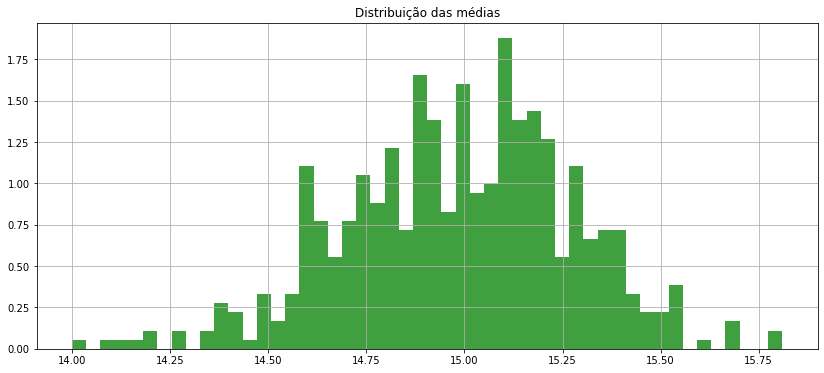

In [ ]:
amostras = 500
medias = np.zeros((amostras,1))
np.random.seed(1)
for i in range(0,amostras,1):
    medias[i]=np.mean(populacao_honesta[np.random.randint(0, len(populacao_honesta),100)])

print(medias.mean())
print(medias.std())    

fig, axs = plt.subplots(1, 1, figsize=(14,6))


axs.hist(medias, density=True, facecolor='g', alpha=0.75, bins=50)
axs.grid(True)
axs.set_title('Distribuição das médias')

plt.show()

In [ ]:
rv_norm = stat.norm(loc=medias.mean(), scale=medias.std())

Conforme previsto, a média das amostras (14,98) corresponde à media da população e o desvio das amostras é o da população dividido por 10.

Agora, sendo a moeda honesta, qual a chance de obtermos uma amostra com média 11.76?

Vamos calcular a probabilidade de obtermos um valor que seja 11.76 ou menor com uma moeda honesta:

In [ ]:
rv_norm.cdf(11.76)

8.72440262174693e-29

Pelo resultado acima, a chance de uma moeda honesta produzir uma amostra cuja média seja 11.76 ou menor é extremamente pequena.

Se estabelecermos nosso nível de significância em 5% (admitirmos no máximo 5% de possibilidade de erro), podemos afirmar que a moeda é desonesta, ou seja, podemos recusar H0 (p=8.72e-29 <= 0.05).

## Usando as funções

1 - Two-Tailed Test - Proporção

The CEO of a large electric utility claims that 80 percent of his 1,000,000 customers are very satisfied with the service they receive. To test this claim, the local newspaper surveyed 100 customers, using simple random sampling. Among the sampled customers, 73 percent say they are very satisified. Based on these findings, can we reject the CEO's hypothesis that 80% of the customers are very satisfied? Use a 0.05 level of significance.

In [ ]:
significancia = 0.05
tipo = 'bilateral'
proporcao_amostra = 0.73
tamanho_amostra = 100
proporcao_populacao = 0.8

teste_hipotese_proporcao(significancia, tipo, proporcao_amostra, tamanho_amostra, proporcao_populacao )

'H0 não rejeitada tendo em vista que p-value=0.04005915686381696 correspondente a z=-1.7500000000000016 maior que significância 0.025'

2- One-Tailed Test - Proporção

Suppose the previous example is stated a little bit differently. Suppose the CEO claims that at least 80 percent of the company's 1,000,000 customers are very satisfied. Again, 100 customers are surveyed using simple random sampling. The result: 73 percent are very satisfied. Based on these results, should we accept or reject the CEO's hypothesis? Assume a significance level of 0.05.

In [ ]:
significancia = 0.05
tipo = 'unilateral'
proporcao_amostra = 0.73
tamanho_amostra = 100
proporcao_populacao = 0.8

teste_hipotese_proporcao(significancia, tipo, proporcao_amostra, tamanho_amostra, proporcao_populacao )

'H0 rejeitada tendo em vista que p-value=0.04005915686381696 correspondente a z=-1.7500000000000016 menor que significância 0.05'

3 - Two-Tailed Test - Média

An inventor has developed a new, energy-efficient lawn mower engine. He claims that the engine will run continuously for 5 hours (300 minutes) on a single gallon of regular gasoline. From his stock of 2000 engines, the inventor selects a simple random sample of 50 engines for testing. The engines run for an average of 295 minutes, with a standard deviation of 20 minutes. Test the null hypothesis that the mean run time is 300 minutes against the alternative hypothesis that the mean run time is not 300 minutes. Use a 0.05 level of significance. 

In [ ]:
significancia = 0.05
tipo = 'bilateral'
media_amostra = 295
desvio_amostra =20
tamanho_amostra = 50
media_populacao = 300
teste_hipotese_media_desvio_amostra(significancia, tipo, media_amostra, desvio_amostra, 
                                    tamanho_amostra, media_populacao )

'H0 não rejeitada tendo em vista que p-value=0.04166307987075465 correspondente a z=-1.7677669529663689 maior que significância 0.025'

4- One-Tailed Test - Média

Bon Air Elementary School has 1000 students. The principal of the school thinks that the average IQ of students at Bon Air is at least 110. To prove her point, she administers an IQ test to 20 randomly selected students. Among the sampled students, the average IQ is 108 with a standard deviation of 10. Based on these results, should the principal accept or reject her original hypothesis? Assume a significance level of 0.01. 

In [ ]:
significancia = 0.01
tipo = 'unilateral'
media_amostra = 108
desvio_amostra =10
tamanho_amostra = 20
media_populacao = 110
teste_hipotese_media_desvio_amostra(significancia, tipo, media_amostra, desvio_amostra, 
                                    tamanho_amostra, media_populacao )

'H0 não rejeitada tendo em vista que p-value=0.1911420676837155 correspondente a z=-0.8944271909999159 maior que significância 0.01'

5 - Two-Tailed Test - Duas Médias

Within a school district, students were randomly assigned to one of two Math teachers - Mrs. Smith and Mrs. Jones. After the assignment, Mrs. Smith had 30 students, and Mrs. Jones had 25 students. At the end of the year, each class took the same standardized test. Mrs. Smith's students had an average test score of 78, with a standard deviation of 10; and Mrs. Jones' students had an average test score of 85, with a standard deviation of 15. Test the hypothesis that Mrs. Smith and Mrs. Jones are equally effective teachers. Use a 0.10 level of significance. 

In [ ]:
significancia = 0.1
tipo = 'bilateral'
media_amostra_1 =78
tamanho_amostra_1 = 30
desvio_amostra_1 = 10
media_amostra_2 = 85
tamanho_amostra_2 = 25
desvio_amostra_2 = 15
teste_hipotese_media_duas_amostras_desvio_amostra(significancia, tipo,
                                                        media_amostra_1, tamanho_amostra_1, desvio_amostra_1,
                                                        media_amostra_2, tamanho_amostra_2, desvio_amostra_2,
                                                     diferenca = 0)

'H0 rejeitada tendo em vista que p-value=0.021885484067245255 correspondente a z=-2.065599955543602 menor que significância 0.05'

6 - One-Tailed Test - Duas Médias

The Acme Company has developed a new battery. The engineer in charge claims that the new battery will operate continuously for at least 7 minutes longer than the old battery. To test the claim, the company selects a simple random sample of 100 new batteries and 100 old batteries. The old batteries run continuously for 190 minutes with a standard deviation of 20 minutes; the new batteries, 200 minutes with a standard deviation of 40 minutes. Test the engineer's claim that the new batteries run at least 7 minutes longer than the old. Use a 0.05 level of significance. 

In [ ]:
significancia = 0.05
tipo = 'unilateral'
media_amostra_1 =200
tamanho_amostra_1 = 100
desvio_amostra_1 = 40
media_amostra_2 = 190
tamanho_amostra_2 = 100
desvio_amostra_2 = 20


diferenca = 7

teste_hipotese_media_duas_amostras_desvio_amostra(significancia, tipo,
                                                        media_amostra_1, tamanho_amostra_1, desvio_amostra_1,
                                                        media_amostra_2, tamanho_amostra_2, desvio_amostra_2,
                                                     diferenca )

'H0 não rejeitada tendo em vista que p-value=0.25155835276737903 correspondente a z=0.6708203932499369 maior que significância 0.05'

7 - Two-Tailed Test - Duas Proporções

Suppose the Acme Drug Company develops a new drug, designed to prevent colds. The company states that the drug is equally effective for men and women. To test this claim, they choose a a simple random sample of 100 women and 200 men from a population of 100,000 volunteers. At the end of the study, 38% of the women caught a cold; and 51% of the men caught a cold. Based on these findings, can we reject the company's claim that the drug is equally effective for men and women? Use a 0.05 level of significance.

In [ ]:
significancia = 0.05
tipo = 'bilateral'

proporcao_amostra_1 =0.38
tamanho_amostra_1 = 100

proporcao_amostra_2 = 0.51
tamanho_amostra_2 = 200

teste_hipotese_proporcao_duas_amostras(significancia, tipo, 
                                                        proporcao_amostra_1, tamanho_amostra_1,
                                                        proporcao_amostra_2, tamanho_amostra_2 )

'H0 rejeitada tendo em vista que p-value=0.01668411752850528 correspondente a z=-2.127624429800926 menor que significância 0.025'

8 - One-Tailed Test - Duas Proporções

Suppose the previous example is stated a little bit differently. Suppose the Acme Drug Company develops a new drug, designed to prevent colds. The company states that the drug is more effective for women than for men. To test this claim, they choose a a simple random sample of 100 women and 200 men from a population of 100,000 volunteers. At the end of the study, 38% of the women caught a cold; and 51% of the men caught a cold. Based on these findings, can we conclude that the drug is more effective for women than for men? Use a 0.01 level of significance.

In [ ]:
significancia = 0.01
tipo = 'unilateral'

proporcao_amostra_1 =0.38
tamanho_amostra_1 = 100

proporcao_amostra_2 = 0.51
tamanho_amostra_2 = 200

teste_hipotese_proporcao_duas_amostras(significancia, tipo, 
                                                        proporcao_amostra_1, tamanho_amostra_1,
                                                        proporcao_amostra_2, tamanho_amostra_2 )

'H0 não rejeitada tendo em vista que p-value=0.01668411752850528 correspondente a z=-2.127624429800926 maior que significância 0.01'

## **Exercício**

Preparando grupos de teste e controle

In [ ]:
populacao = populacaoEleicao.copy()

In [ ]:
PopulacaoPotencial = populacao.loc[(populacao.Regiao=='Nordeste') & (populacao.Salario<=900),:].copy()

TamanhoPopulacaoPotencial = len(PopulacaoPotencial)

PopulacaoPotencialMediaSalario = PopulacaoPotencial.Salario.mean()
PopulacaoPotencial.Salario = norm(loc=PopulacaoPotencialMediaSalario, scale=0.1*PopulacaoPotencialMediaSalario).rvs(size=TamanhoPopulacaoPotencial)
ajuste = []
for x in range(TamanhoPopulacaoPotencial):
    ajuste = ajuste + [random.randint(-300, 300)]
PopulacaoPotencial.Salario = PopulacaoPotencial.Salario +   ajuste  

from sklearn.model_selection import train_test_split

PopulacaoControle, PopulacaoTeste = train_test_split(PopulacaoPotencial, test_size=0.5)

In [ ]:
TamanhoPopulacaoTeste = len(PopulacaoTeste)
TamanhoPopulacaoTeste

2436

In [ ]:
TamanhoPopulacaoControle = len(PopulacaoControle)
TamanhoPopulacaoControle

2435

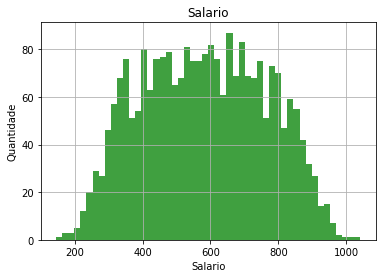

Tamanho 2436, Média 581.1761572161523, Variância 32986.107130072596, Desvio padrão 181.62077835443992


In [ ]:
histograma(PopulacaoTeste,'Salario')

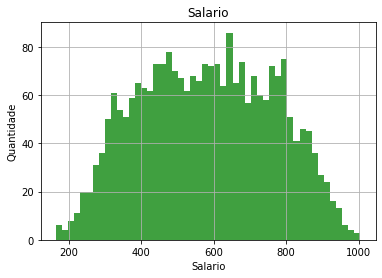

Tamanho 2435, Média 581.3190883064277, Variância 33501.013416781614, Desvio padrão 183.0328205999722


In [ ]:
histograma(PopulacaoControle,'Salario')

Vamos aplicar a política pública que, em tese, deveria melhorar o salário da população

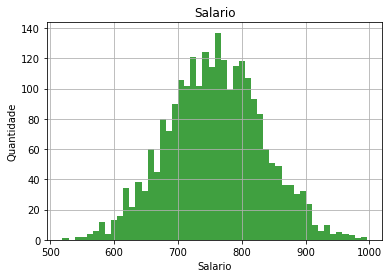

Tamanho 2436, Média 758.3300744854951, Variância 5532.9334414880395, Desvio padrão 74.38369069552841


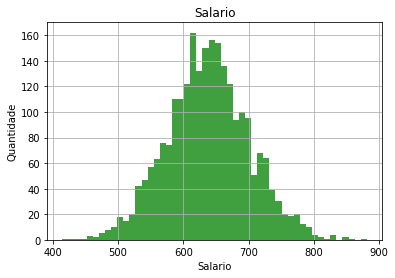

Tamanho 2435, Média 638.186923917774, Variância 3995.351777556702, Desvio padrão 63.20879509654255


In [ ]:
PopulacaoControlePosPolitica = PopulacaoControle.copy()
PopulacaoControlePosPoliticaMediaSalario = PopulacaoControlePosPolitica.Salario.mean()
PopulacaoControlePosPoliticaMediaSalario = PopulacaoControlePosPoliticaMediaSalario * 1.1
PopulacaoControlePosPolitica.Salario = norm(loc=PopulacaoControlePosPoliticaMediaSalario, scale=0.1*PopulacaoControlePosPoliticaMediaSalario).rvs(size=TamanhoPopulacaoControle)

PopulacaoTestePosPolitica = PopulacaoTeste.copy()
PopulacaoTestePosPoliticaMediaSalario = PopulacaoTestePosPolitica.Salario.mean()
PopulacaoTestePosPoliticaMediaSalario = PopulacaoTestePosPoliticaMediaSalario * 1.3
PopulacaoTestePosPolitica.Salario = norm(loc=PopulacaoTestePosPoliticaMediaSalario, scale=0.1*PopulacaoTestePosPoliticaMediaSalario).rvs(size=TamanhoPopulacaoTeste)

histograma(PopulacaoTestePosPolitica,'Salario')

histograma(PopulacaoControlePosPolitica,'Salario')

Foi implantada uma política de educação para adultos numa região do Nordeste com objetivo de melhorar o salário da população

Para realizar avaliação de impacto, foram separados um grupo de teste e um grupo de controle

Foram criadas planilhas de dados com informações dos dois grupos antes e depois da aplicação da política

O objetivo deste exercício é responder um conjunto de perguntas (listadas abaixo) para verificar se houve ou não impacto

**Passo 1**

Calcule o tamanho mínimo das amostras para estimar o salário das populações de teste e controle antes da aplicação da política

O tamanho das populações de teste e controle é 20674

O grau de confiança será 0.95

A variância do salário nas duas populações é 37240

A margem de erro é 100

Use a função:


def Tamanho_Amostra_Valor_Pontual(Tamanho_Populacao, Grau_Confianca, Variancia, Margem_Erro)

OBS: altere somente a linha comentada (iniciando com #)

In [ ]:
Tamanho_Amostra_Teste = 0

Tamanho_Amostra_Teste = Tamanho_Amostra_Valor_Pontual(20674,0.95,37240,100)

Tamanho_Amostra_Teste

15

In [ ]:
Tamanho_Amostra_Controle = 0

Tamanho_Amostra_Controle = Tamanho_Amostra_Valor_Pontual(20674,0.95,37240,100)

Tamanho_Amostra_Controle

15

**Passo 2**

Obtenha uma amostra da população de teste e uma amostra da população de controle usando o tamanho de amostra calculado no passo 1

Use a função recupera_amostra(populacao, tamanho_amostra)

As populações estão armazenadas nas variáveis PopulacaoControle e PopulacaoTeste

OBS: altere somente a linha comentada (iniciando com #)

In [ ]:
#amostraTeste = pd.DataFrame(columns=['Salario'])
amostraTeste = recupera_amostra(PopulacaoTeste,Tamanho_Amostra_Teste)
amostraTeste = amostraTeste.Salario
amostraTeste.head()

129469    566.009910
138934    190.693453
119935    694.764983
101252    691.270339
133672    456.449726
Name: Salario, dtype: float64

In [ ]:
#amostraControle = pd.DataFrame(columns=['Salario'])
amostraControle = recupera_amostra(PopulacaoControle,Tamanho_Amostra_Controle)
amostraControle = amostraControle.Salario
amostraControle.head()

113932    579.194311
120028    591.208245
123389    366.575741
120559    783.958026
115969    542.622344
Name: Salario, dtype: float64

**Passo 3**

Calcule o intervalo de confiança para o salário das populações de teste e de controle usando as amostras do passo 2

O grau de confiança é 0.95

O tamanho das populações de teste e controle é 20674

Use a função calcula_intervalo_media(amostra, Grau_Confianca, TamanhoPopulacao)

OBS: altere somente a linha comentada (iniciando com #)

In [ ]:
inferior,superior = 0,0

inferior,superior = calcula_intervalo_media(amostraTeste,0.95,20674)
print('Intervalo da média {} {}'.format(inferior,superior))

média amostra: 535.4677196711502
Intervalo da média 439.6621546343407 631.2732847079598


In [ ]:
inferior,superior = 0,0

inferior,superior = calcula_intervalo_media(amostraControle,0.95,20674)
print('Intervalo da média {} {}'.format(inferior,superior))

média amostra: 612.8782381357476
Intervalo da média 510.9370491969049 714.8194270745902


In [ ]:
mediaSalarioTesteAntesPolitica = amostraTeste.mean()
mediaSalarioTesteAntesPolitica

535.4677196711502

In [ ]:
mediaSalarioControleAntesPolitica = amostraControle.mean()
mediaSalarioControleAntesPolitica

612.8782381357476

**Passo 4**

Faça um teste de hipótese usando as médias salarias das populações de teste e controle calculadas acima

A siginificância é 0.05

O tipo do teste é 'bilateral'

As médias das amostras estão em mediaSalarioTesteAntesPolitica e mediaSalarioControleAntesPolitica

O tamanho das amostras estão em Tamanho_Amostra_Teste e Tamanho_Amostra_Controle

O desvio padrão das duas populações é 194

Use a função: teste_hipotese_media_duas_amostras_desvio_populacao(significancia, tipo, media_amostra_1, tamanho_amostra_1, desvio_populacao_1, media_amostra_2, tamanho_amostra_2, desvio_populacao_2, diferenca = 0 )

OBS: altere somente a linha comentada (iniciando com #)

In [ ]:
teste_hipotese_media_duas_amostras_desvio_populacao(0.05, 'bilateral', mediaSalarioTesteAntesPolitica, Tamanho_Amostra_Teste, 194,
                                                    mediaSalarioControleAntesPolitica, Tamanho_Amostra_Controle, 194, diferenca = 0 )

'H0 não rejeitada tendo em vista que p-value=0.1372473351802425 correspondente a z=-1.0927702874028384 maior que significância 0.025'

**Passo 5**

Foi aplicado o treinamento para adultos e medidos os salários de amostras das populações de teste e controle. Use os dados abaixo para realizar novo teste de hipótese em relação às médias salariais das duas populações

A siginificância é 0.05

O tipo do teste é 'bilateral'

As médias dos salários das amostras são 750 para a população de teste e 636 para o controle

O tamanho das amostras estão em Tamanho_Amostra_Teste e Tamanho_Amostra_Controle

O desvio padrão da população de teste é 76 e do controle 62

Use a função: teste_hipotese_media_duas_amostras_desvio_populacao(significancia, tipo, media_amostra_1, tamanho_amostra_1, desvio_populacao_1, media_amostra_2, tamanho_amostra_2, desvio_populacao_2, diferenca = 0 )

OBS: altere somente a linha comentada (iniciando com #)

In [ ]:
teste_hipotese_media_duas_amostras_desvio_populacao(0.05, 'bilateral', 750, Tamanho_Amostra_Teste, 76,
                                                    636, Tamanho_Amostra_Controle, 62, diferenca = 0 )

'H0 rejeitada tendo em vista que p-value=3.3728419801796497e-06 correspondente a z=4.501558981512212 menor que significância 0.025'

**Passo 6**

No passo 4, H0 não foi rejeitada, no passo 5 H0 foi rejeitada.

O que esses testes dizem sobre a comparação da média dos salários antes e depois da aplicação da política?

Antes da aplicação da política os grupos de teste e controle tinham as mesmas características em termos de salário, o que significa que foram ambas extraídas da mesma população base (população com o mesmo salário médio).

Após a aplicação da política os grupos foram considerados distintos (em termos de salário), o que significa que houve uma mudança estatísticamente relevante em termos de salário, provavelmente decorrente da política de treinamento, embora o teste de hipótese não se preste a provar causalidade, apenas a diferença entre os grupos

# Análise multivariada

## Correlação

A correlação analisa possíveis relacionamentos existentes entre variáveis distintas. Procura determinar se são independentes ou dependentes e, no último caso, qual o tipo de dependência.

Vamos a um exemplo: o relatório de felicidade por pais da ONU, que mede o índice de felicidade por nação e seus indicadores (fonte: https://www.kaggle.com/unsdsn/world-happiness).

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AcademiaQintess/2017.csv')
df = df.loc[:,[  'Happiness.Score',  'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.','Dystopia.Residual']]
df.head(20)

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


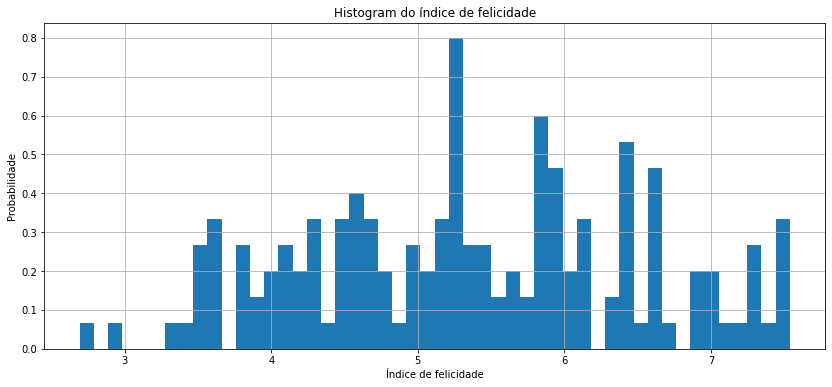

In [ ]:
plt.figure(figsize=(14,6))

_ = df['Happiness.Score'].hist( bins=50, density=True)

plt.xlabel('Índice de felicidade')
plt.ylabel('Probabilidade')
plt.title('Histogram do índice de felicidade')

plt.show()

In [ ]:
df.corr()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Score,1.000000,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Economy..GDP.per.Capita.,0.812469,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,0.752737,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,0.781951,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,0.570137,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,0.155256,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,0.429080,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755
Dystopia.Residual,0.475355,0.024226,0.070506,0.054963,0.081926,-0.116627,-0.022755,1.000000


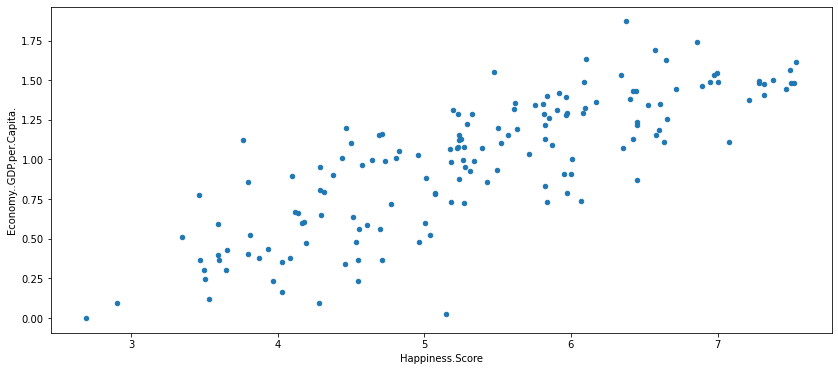

In [ ]:
# Aparentemente economia é fortemente correlacionada com felicidade

_ = df.plot(figsize=(14,6), kind='scatter', x='Happiness.Score', y='Economy..GDP.per.Capita.' )

<Figure size 432x288 with 0 Axes>

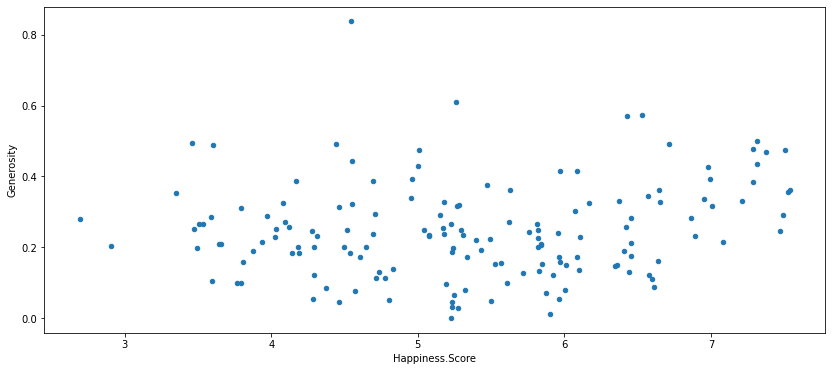

In [ ]:
# Já a generosidade não apresenta correlação significativa

plt.figure()

_ = df.plot(figsize=(14,6),kind='scatter', x='Happiness.Score', y='Generosity' )

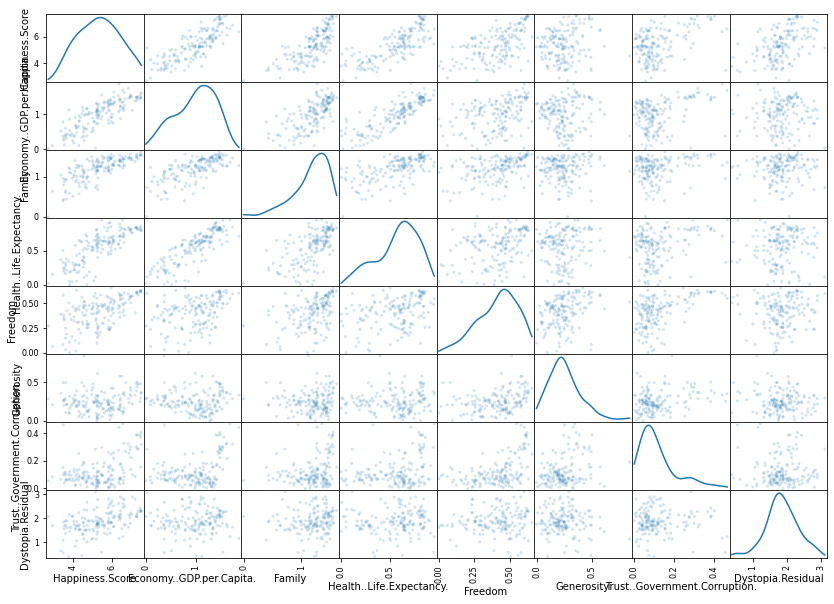

In [ ]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(df, figsize=(14,10), alpha=0.2, diagonal='kde')

Mais formalmente, as medidas mais usadas de correlação são:

Covariância: mede a variação conjunta das duas variáveis em torno de suas médias

Coeficiente de correlação de Pearson: mede a variação conjunta das variáveis em torno da média, variações normalizadas pelo desvio padrão (mais fácil interpretação porque o resultado fica no intervalo [-1 1])



In [ ]:
np.cov(df[['Happiness.Score','Economy..GDP.per.Capita.']].values.T)

array([[1.27968152, 0.38674599],
       [0.38674599, 0.1770665 ]])

In [ ]:
np.corrcoef(df[['Happiness.Score','Economy..GDP.per.Capita.']].values.T)

array([[1.        , 0.81246875],
       [0.81246875, 1.        ]])

## Correlação não linear

As correlações analisadas até agora são lineares, indicando se ambas as variáveis tem igual variação em torno da média.

Em correlações não lineares o pressuposto acima não se configura, embora haja correlação entre as variáveis.

Por isso há que se ter cuidado com a análise dos indicadores acima.

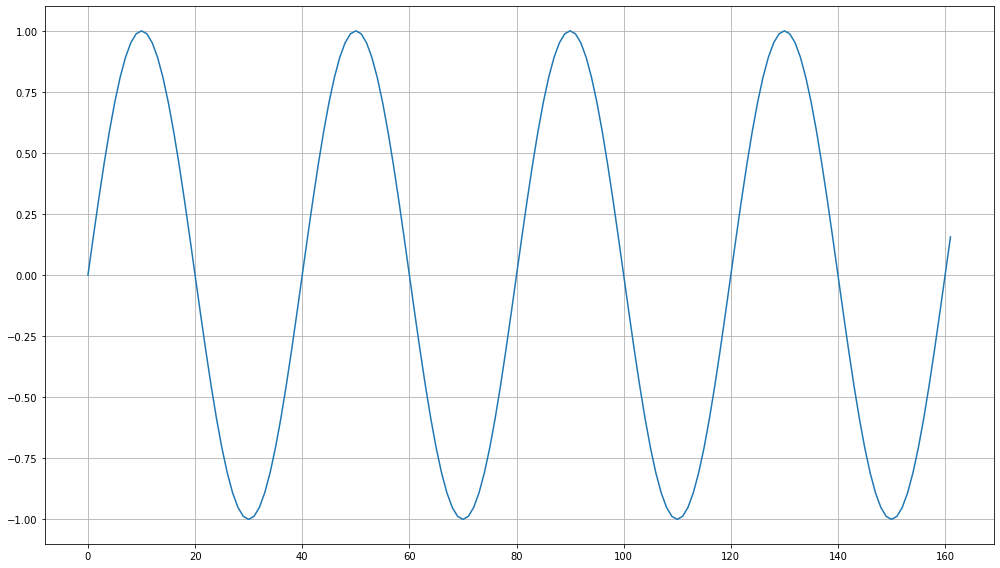

162
[[ 1.         -0.18854165]
 [-0.18854165  1.        ]]


In [ ]:
x=np.arange(0, 8.1, 0.05)
y = np.sin(np.pi*x)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.plot( range(len(x)),y)
plt.grid()
plt.tight_layout()
plt.show()

print(len(x))

print(np.corrcoef(x,y))

## Autocorrelação

É a correlação feita com a própria variável, considerando um intervalo, normalmente tempo

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



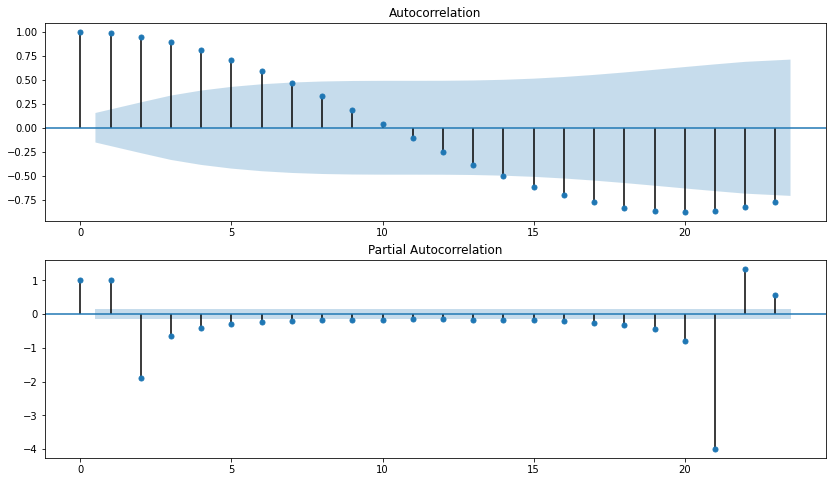

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(2,1,figsize=(14,8))
plot_acf(y,ax=ax[0])
plot_pacf(y,ax=ax[1])

plt.show()

## Correlação não significa causalidade

A existência de correlação entre variáveis não significa, necessariamente, que uma variável afete diretamente o valor da outra.

A correlação indica que há movimentação conjunta de ambas as variáveis, efeito que pode ser produzido por uma terceira variável.

No exemplo abaixo, ambas as variáveis (sen e cos) estão fortemente correlacionadas (-1). Porém, o que afeta o valor da ambas é o ângulo original.

Para exemplos concretos, ver o link abaixo.

http://www.tylervigen.com/spurious-correlations

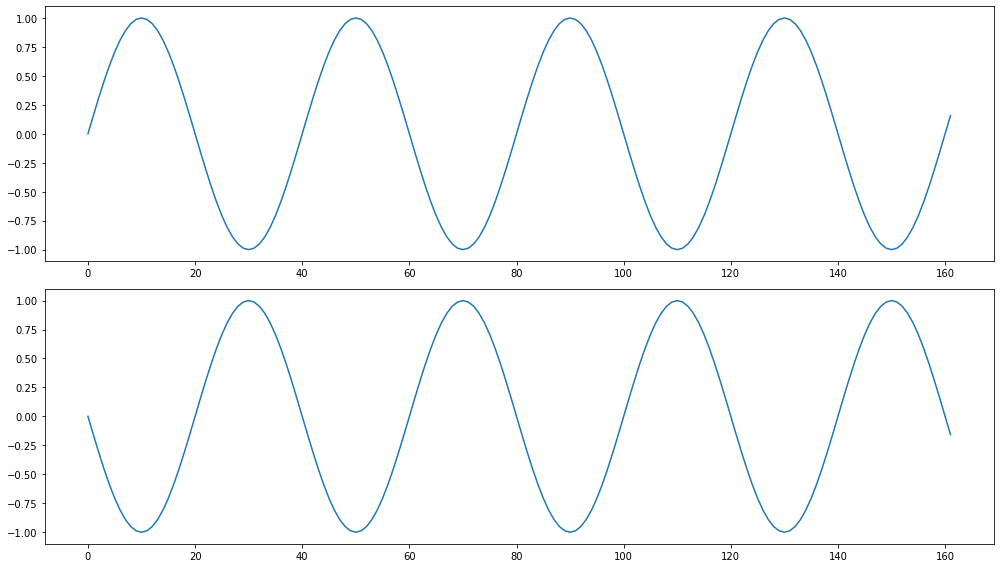

[[ 1. -1.]
 [-1.  1.]]


In [ ]:
x=np.arange(0, 8.1, 0.05)
y1 = np.sin(np.pi*x)
y2 = np.cos(np.pi*(x+1/2))

fig, ax = plt.subplots(2,1,figsize=(14,8))
ax[0].plot(y1)
ax[1].plot(y2)
plt.tight_layout()
plt.show()


print(np.corrcoef(y1,y2))

## Correlação entre variáveis categóricas

In [ ]:
import seaborn as sns
from sklearn.feature_selection import chi2

pinguins = sns.load_dataset(name='penguins')
pinguins.dropna(inplace=True)
pinguins.sex=pinguins.sex.map({'Male':0,'Female':1})
pinguins.island=pinguins.island.map({'Torgersen':1, 'Biscoe':2, 'Dream':3})
pinguins.species=pinguins.species.map({'Adelie':1, 'Chinstrap':2, 'Gentoo':3})
pinguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,1,39.1,18.7,181.0,3750.0,0
1,1,1,39.5,17.4,186.0,3800.0,1
2,1,1,40.3,18.0,195.0,3250.0,1
4,1,1,36.7,19.3,193.0,3450.0,1
5,1,1,39.3,20.6,190.0,3650.0,0


Em algumas situações, por exemplo quando trabalhamos com variáveis do tipo qualitativas (categóricas) ordinais, onde seu valor guarda relação com uma gradação, pode-se usar a função "cor" para estimar a correlação entre elas e outras variáveis qualitativas ou variáveis quantitativas.



In [ ]:
pinguins.corr()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.009176,0.730548,-0.740346,0.850737,0.750434,-0.010964
island,-0.009176,1.000000,0.212038,0.189636,-0.162739,-0.201966,-0.005834
bill_length_mm,0.730548,0.212038,1.000000,-0.228626,0.653096,0.589451,-0.344078
bill_depth_mm,-0.740346,0.189636,-0.228626,1.000000,-0.577792,-0.472016,-0.372673
flipper_length_mm,0.850737,-0.162739,0.653096,-0.577792,1.000000,0.872979,-0.255169
body_mass_g,0.750434,-0.201966,0.589451,-0.472016,0.872979,1.000000,-0.424987
sex,-0.010964,-0.005834,-0.344078,-0.372673,-0.255169,-0.424987,1.000000


Isso não é possível quando trabalhamos com variáveis qualitativas nominais (sem ordenação). Neste caso usar o teste Chi2, visto abaixo

In [ ]:
resultado = chi2(pinguins.loc[:,['species','island']],pinguins.sex)



array([0.01646241, 0.0023318 ])

In [ ]:
resuldado_df=pd.DataFrame({'Chi2':resultado[0],'p-Value':resultado[1]})
resuldado_df.index=['species','island']
resuldado_df

,Chi2,p-Value
species,0.016462,0.897907
island,0.002332,0.961486


Quanto menor o chi2 e, consequentemente, maior o p-value, menor a correlação entre as variáveis categóricas.

No exemplo acima foi medida a correlação entre as três variáveis categóricas, analisada a correlação direta entre o tipo da espécie e a ilha de origem em relação ao sexo do animal. A conclusão é que não há correlação entre a ilha ou a espécie com o sexo

Para a comparação entre variáveis qualitativas e quantitativas, caso não seja possível usar o método "corr()" citado acima, fazer análise de variância (ANOVA)

In [ ]:
!pip install pingouin

     |████████████████████████████████| 206 kB 5.1 MB/s 
     |████████████████████████████████| 28.5 MB 44 kB/s 
     |████████████████████████████████| 9.5 MB 36.2 MB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=d95f6d96bbab49a10b6a4b0cca678bf140db93b8527165f208360a57c1ea3f93
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=3a74db0f9a7b183536b8e5437cad457498671ea41d44d9d838d5590d152eae24
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

In [ ]:
pinguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
import pingouin as pg

resultado=[]
for between in ['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']:
  r = (pg.anova(data=pinguins, dv='sex', between=between, detailed=True).round(3))
  resultado.append(r)


data = pd.concat(resultado)
data = data[data.Source!='Within'][['Source','F']]
data

,Source,F
0,species,0.024
0,island,0.029
0,bill_length_mm,1.889
0,bill_depth_mm,3.442
0,flipper_length_mm,2.471
0,body_mass_g,2.800


Quanto maior o valor de F, mais relevante a variável (mais contribui para a variânica) para a análise da variável dependente (no caso sexo)

## **Exercício**

Relatório de felicidade por pais da ONU, que mede o índice de felicidade por nação e seus indicadores

Fonte: https://www.kaggle.com/unsdsn/world-happiness

Carga e preparação de dados

In [ ]:
worldhappiness = pd.read_csv('/content/drive/MyDrive/AcademiaQintess/2016.csv')
worldhappiness.set_index('Happiness Rank', drop=True, inplace=True)
worldhappiness = worldhappiness.loc[:,[ 'Country', 'Region', 'Happiness Score',  'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]

worldhappiness = worldhappiness.sort_values(by=['Happiness Rank'], ascending=True)
worldhappiness.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Rank,,,,,,,,,
1,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
2,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
3,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
4,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
5,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


Faça o histograma do nível de felicidade

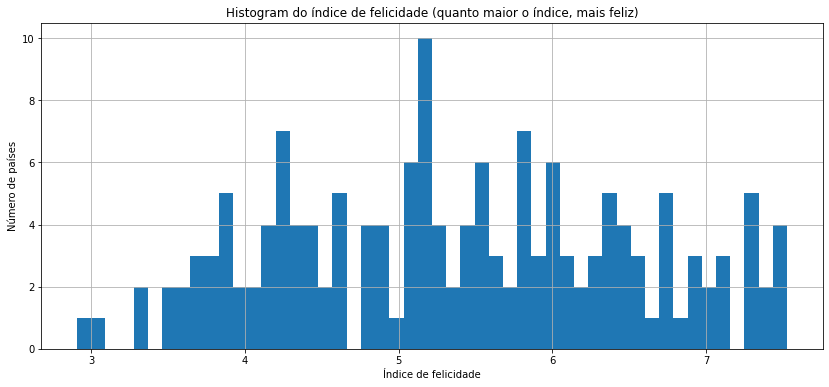

In [ ]:
plt.figure(figsize=(14,6))

_ = worldhappiness['Happiness Score'].hist( bins=50, density=False)

plt.xlabel('Índice de felicidade')
plt.ylabel('Número de países')
plt.title('Histogram do índice de felicidade (quanto maior o índice, mais feliz)')

plt.show()

Interprete o gráfico de distribuição de felicidade pelos países, como é a distribuição de felicidade entre os países (há mais países felizes, infelizes ou intermediários)?



Distribuição próxima da Normal (simétrica em relação à média), com maior concentração de países felizes (concentração à direita)

Qual o país mais feliz? E o mais infeliz?

Observação: quanto maior o índice, mais feliz o país.

In [ ]:
worldhappiness.head(1).Country

Happiness Rank
1    Denmark
Name: Country, dtype: object

In [ ]:
worldhappiness.tail(1).Country

Happiness Rank
157    Burundi
Name: Country, dtype: object

Plote o gráfico da felicidade média por continente

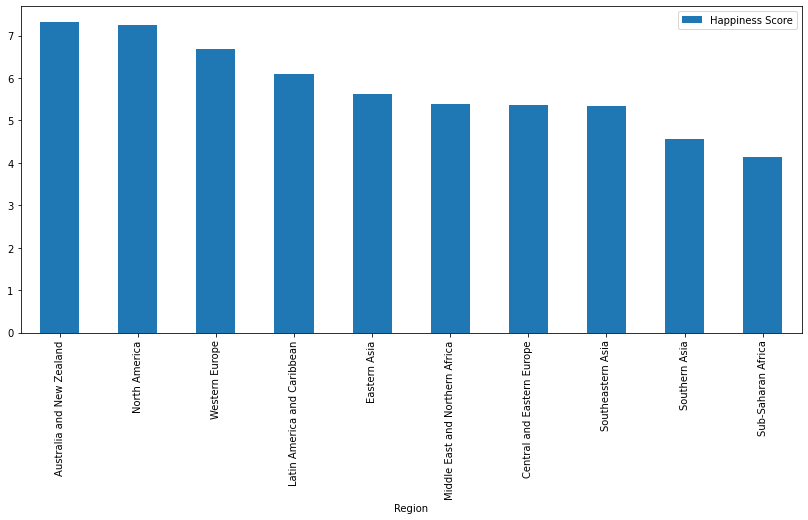

In [ ]:
_ = worldhappiness.loc[:,['Region','Happiness Score']].groupby(by='Region').mean().sort_values(by=['Happiness Score'], ascending=False).plot(kind='bar',figsize=(14,6))

Calcule o índice de correlação entre as variáveis do relatório usando o Coeficiente de correlação de Pearson (utilizado para correlação LINEAR entre variáveis quantitativas).

O Coeficiente de correlação de Pearson mede a variação conjunta das variáveis em torno da média, variações normalizadas pelo desvio padrão (mais fácil interpretação porque o resultado fica no intervalo [-1 1]).

Utilize o comando "worldhappiness.corr()"



In [ ]:
worldhappiness.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848
Economy (GDP per Capita),0.790322,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531
Family,0.739252,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629
Health (Life Expectancy),0.765384,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987
Freedom,0.566827,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751
Trust (Government Corruption),0.402032,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930
Generosity,0.156848,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000


Qual componente do Índice de Felicidade possui maior correlação com a felicidade do país?


Economy, com correlação 0.79


Qual componente do Índice de Felicidade possui menor correlação com a felicidade do país?

Generosity, com correlação 0.15


Qual par de componentes possui maior correlação?


Health e Economy, com correlação 0.83


Qual par possui a menor correlação?

Generosity e Economy, com correlação -0.02 (lembrar que a medida da menor correlação é em valor absoluto, não valores negativos)

Uma forma visual e simples de analisar correlações é através de scatter plot, que mostra, de forma gráfica, a combinação de valores de duas colunas, veja a correlação entre 'Happiness Score' e 'Economy (GDP per Capita)'. Há correlação?  

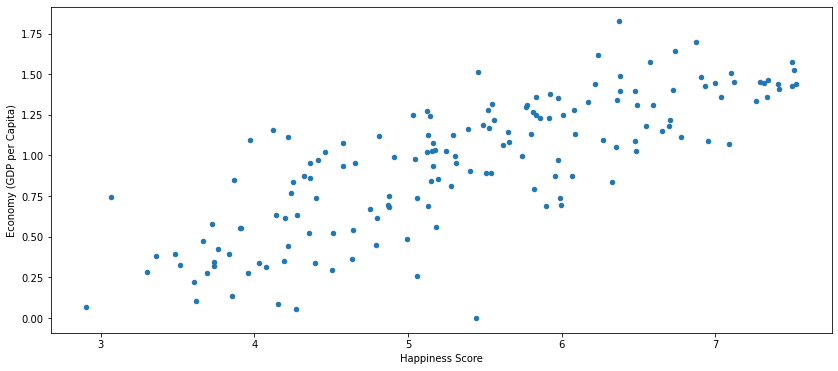

In [ ]:
_ = worldhappiness.plot(figsize=(14,6), kind='scatter', x='Happiness Score', y='Economy (GDP per Capita)' )

Faça um gráfico semelhante ao anterior para as variáveis 'Happiness.Score' e 'Generosity'.

No gráfico é perceptível alguma correlação entre as variáveis? Explique.

Não, porque os dados tem formato aproximado de uma reta horizontal, que indica falta de correlação



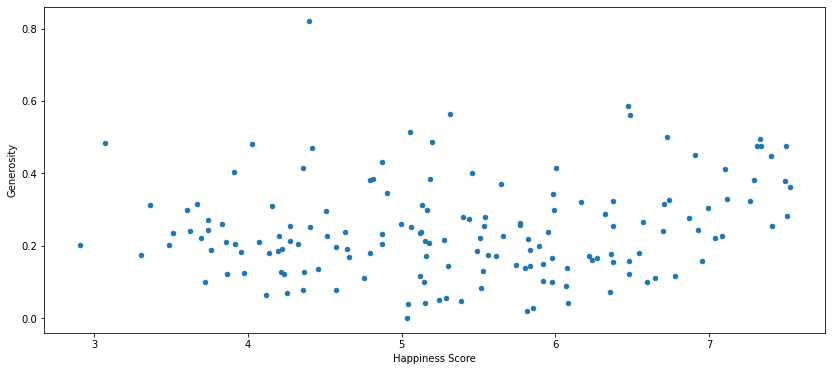

In [ ]:
_ = worldhappiness.plot(figsize=(14,6), kind='scatter', x='Happiness Score', y='Generosity' )

Matriz de correlação

Uma forma simples de estudar a correlação entre muitas variáveis é através da matriz de correlação.

Na diagonal da matriz aparecem as distribuições de probabilidade das variáveis.

Nas demais células, são apresentados os gráficos de cruzamento das variáveis (scatter plots)

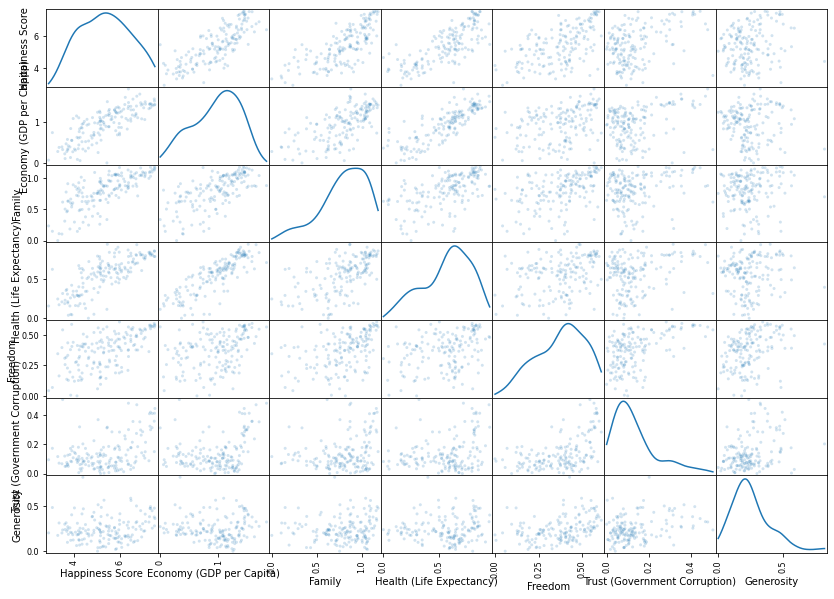

In [ ]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(worldhappiness, figsize=(14,10), alpha=0.2, diagonal='kde')

Observe a correlação entre 'Happiness.Score' e 'Trust (Government Corruption)'

Qual o valor da correlação calculado pela função worldhappiness.corr()?

0.4

Faça um scatter plot para as duas variáveis

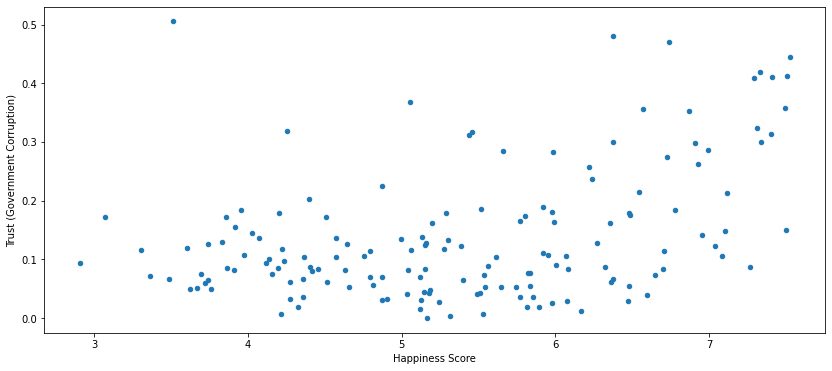

In [ ]:
_ = worldhappiness.plot(figsize=(14,6), kind='scatter', x='Happiness Score', y='Trust (Government Corruption)' )

Apesar da correlação de Pearson entre 'Happiness.Score' e 'Trust (Government Corruption)' não ser alta (é menor que 0,5), pelo gráfico podemos verificar uma relação entre felicidade e confiança no governo, qual é essa relação?

Até o índice 6, a disposição dos pontos parece uma reta horizontal, indicando falta de correlação. Após 6, a confiança no governo aumenta, indicando correlação positiva entre os dois fatores. O comportamento lembra uma parábola. A baixa correlação inicial afeta o cálculo do índice de correlação, que é baixo. O comportamento parece ser não linear (parábola), o que explica o índice (linear) não refletir corretamente a correlação existente

Existe um país que parece sair da regra (infeliz mas confiante no governo), qual é esse país? Dica: para listar a tabela ordenada por uma coluna use o comando "worldhappiness.sort_values(by=['Trust (Government Corruption)'], ascending=False)"

Rwanda

In [ ]:
worldhappiness.sort_values(by=['Trust (Government Corruption)'], ascending=False)

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Rank,,,,,,,,,
152,Rwanda,Sub-Saharan Africa,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552
36,Qatar,Middle East and Northern Africa,6.375,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388
22,Singapore,Southeastern Asia,6.739,1.64555,0.86758,0.94719,0.48770,0.46987,0.32706
1,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
8,New Zealand,Australia and New Zealand,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401
...,...,...,...,...,...,...,...,...,...
43,Trinidad and Tobago,Latin America and Caribbean,6.168,1.32572,0.98569,0.52608,0.48453,0.01241,0.31935
71,Romania,Central and Eastern Europe,5.528,1.16970,0.72803,0.67602,0.36712,0.00679,0.12889
129,Bulgaria,Central and Eastern Europe,4.217,1.11306,0.92542,0.67806,0.21219,0.00615,0.12793


Regressão significa traçar uma curva que melhor se adapta aos pontos capturados na análise

A curva pode ser uma reta ou outro formato qualquer

O objetivo é estimar valores da variável dependente para valores da variável independente não capturados na amostra

Vamos fazer um exemplo relacionando nível de felicidade e 'Trust (Government Corruption)'. Vamos inicialmente fazer um gráfico somente com os pontos levantados no estudo:

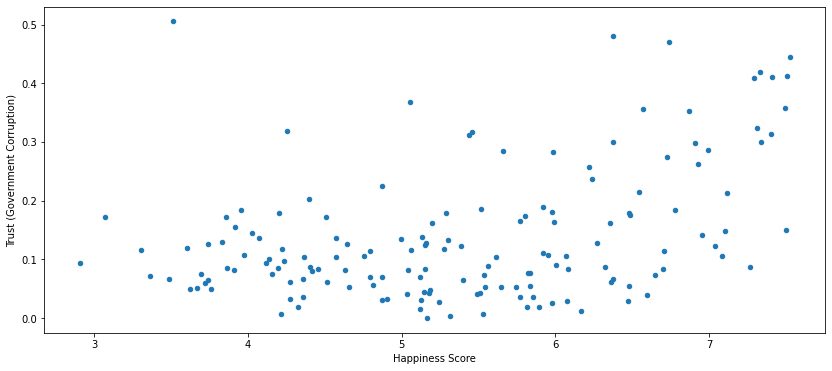

In [ ]:
_ = worldhappiness.plot(figsize=(14,6), kind='scatter', x='Happiness Score', y='Trust (Government Corruption)' )

Vamos agora traçar três curvas de regressão: uma reta (azul), uma curva de segundo grau (parábola verde) e uma curva de terceiro grau (amarela):

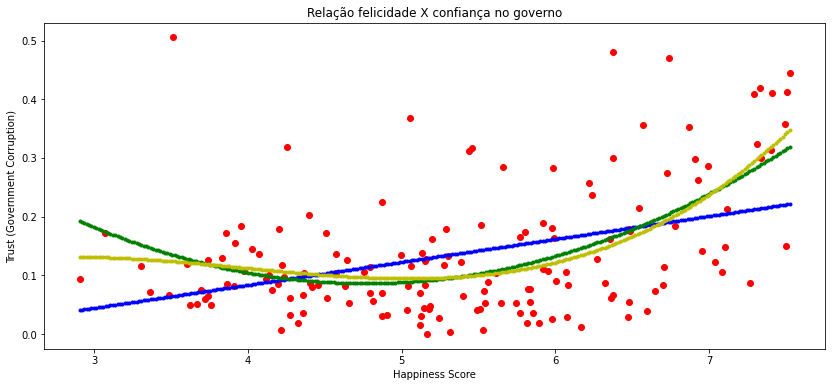

In [ ]:
x = worldhappiness['Happiness Score'].values
y = worldhappiness['Trust (Government Corruption)'].values
f1 = np.poly1d(np.polyfit(x, y, 1))
f2 = np.poly1d(np.polyfit(x, y, 2))
f3 = np.poly1d(np.polyfit(x, y, 3))

fig, ax = plt.subplots(1,1,figsize=(14,6))
plt.plot(x, y, 'ro')
simulacao = np.linspace(x.min(),x.max(),300)
plt.plot(simulacao, f1(simulacao), 'b.', label='Linear')
plt.plot(simulacao, f2(simulacao), 'g.', label='2')
plt.plot(simulacao, f3(simulacao), 'y.', label='3')
plt.xlabel('Happiness Score')
plt.ylabel('Trust (Government Corruption)')
plt.title('Relação felicidade X confiança no governo')
plt.show()

Na sua opinião, qual curva melhor se adapta aos dados?

Curva amarela

O traçado da curva verde parecece fazer sentido?

Se interpretado o significado das colunas, não (não parece fazer sentido ter alta confiança no governo e felicidade baixa, analisando o comportamento médio dos países). A curva verde foi afetada pelo outlier (Rwanda), que distorce o início da curva. Isso demonstra que não necessariamente a utilização de funções mais complexas (polinômios de maior grau), representa melhor os dados. O mesmo se verifica em aprendizado de máquina, o algorítmo não deve se adaptar totalmente à massa de dados de treinamento, pois, se assim feito, perde a capacidade de generalização

# Séries temporais

## Criação da série

In [ ]:
serie = pd.DataFrame(columns=['t','tendencia','sazonalidade','aleatorio','completa'])
serie['t'] = np.linspace(0, 8*np.pi, 8*180)

serie.head()

,t,tendencia,sazonalidade,aleatorio,completa
0,0.000000,NaN,NaN,NaN,NaN
1,0.017465,NaN,NaN,NaN,NaN
2,0.034931,NaN,NaN,NaN,NaN
3,0.052396,NaN,NaN,NaN,NaN
4,0.069862,NaN,NaN,NaN,NaN


## Tendência

In [ ]:
serie['tendencia'] = serie.t * 2
serie.head()

,t,tendencia,sazonalidade,aleatorio,completa
0,0.000000,0.000000,NaN,NaN,NaN
1,0.017465,0.034931,NaN,NaN,NaN
2,0.034931,0.069862,NaN,NaN,NaN
3,0.052396,0.104793,NaN,NaN,NaN
4,0.069862,0.139723,NaN,NaN,NaN


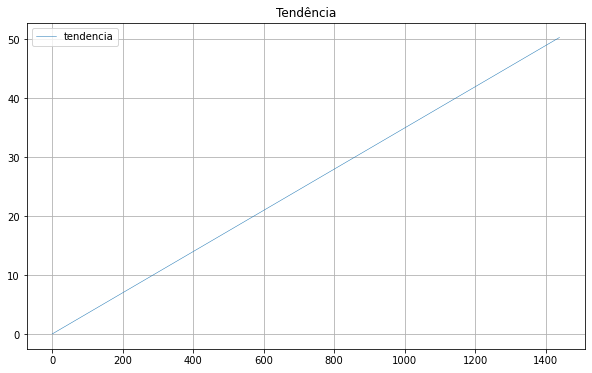

In [ ]:
serie.plot(figsize=figsize,
                        grid=True, 
    linewidth=0.5,
    use_index=False,
          x='t',
          y='tendencia')
plt.title('Tendência')
plt.show()

## Sazonalidade

In [ ]:
serie['sazonalidade'] = 10*np.sin(serie.t )
serie.head()

,t,tendencia,sazonalidade,aleatorio,completa
0,0.000000,0.000000,0.000000,NaN,NaN
1,0.017465,0.034931,0.174645,NaN,NaN
2,0.034931,0.069862,0.349237,NaN,NaN
3,0.052396,0.104793,0.523723,NaN,NaN
4,0.069862,0.139723,0.698049,NaN,NaN


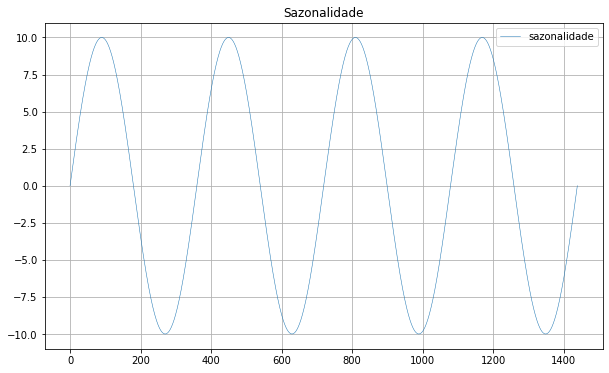

In [ ]:
serie.plot(figsize=figsize,
                        grid=True, 
    linewidth=0.5,
    use_index=False,
          x='t',
          y='sazonalidade')
plt.title('Sazonalidade')
plt.show()

## Componente aleatório

In [ ]:
serie['aleatorio'] = 5*np.random.normal(0, 1, len(serie))
serie.head()

,t,tendencia,sazonalidade,aleatorio,completa
0,0.000000,0.000000,0.000000,-2.652449,NaN
1,0.017465,0.034931,0.174645,6.840749,NaN
2,0.034931,0.069862,0.349237,-3.263306,NaN
3,0.052396,0.104793,0.523723,-8.450326,NaN
4,0.069862,0.139723,0.698049,4.704854,NaN


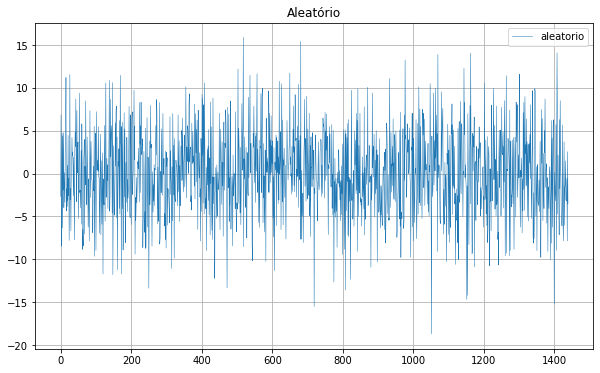

In [ ]:
serie.plot(figsize=figsize,
                        grid=True, 
    linewidth=0.5,
    use_index=False,
          x='t',
          y='aleatorio')
plt.title('Aleatório')
plt.show()

## Série Completa

In [ ]:
serie['completa'] = serie.tendencia + serie.sazonalidade + serie.aleatorio
serie.head()

,t,tendencia,sazonalidade,aleatorio,completa
0,0.000000,0.000000,0.000000,-2.652449,-2.652449
1,0.017465,0.034931,0.174645,6.840749,7.050325
2,0.034931,0.069862,0.349237,-3.263306,-2.844207
3,0.052396,0.104793,0.523723,-8.450326,-7.821811
4,0.069862,0.139723,0.698049,4.704854,5.542627


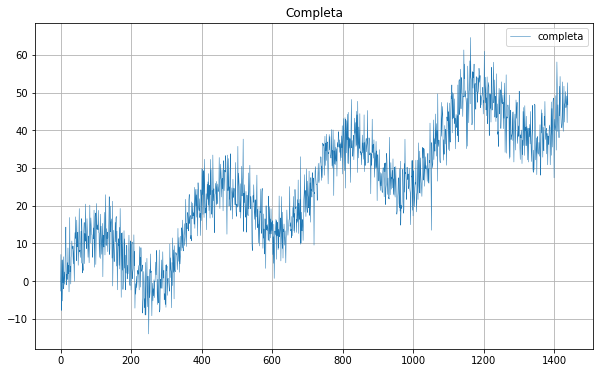

In [ ]:
serie.plot(figsize=figsize,
                        grid=True, 
    linewidth=0.5,
    use_index=False,
          x='t',
          y='completa')
plt.title('Completa')
plt.show()

## Retirando tendência e sazonalidade

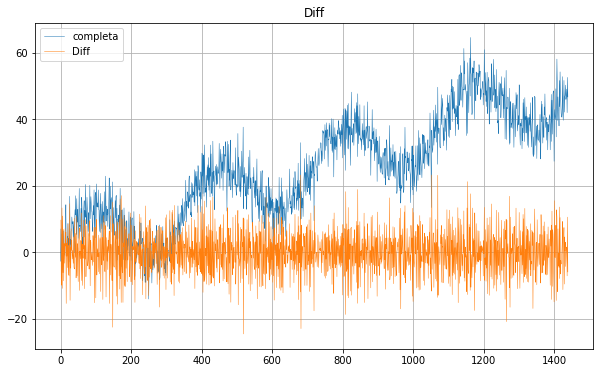

In [ ]:
serie['Diff'] = serie.completa.diff()

serie.loc[:,['completa','Diff']].plot(figsize=figsize,
                        grid=True, 
    linewidth=0.5,
    use_index=False)
plt.title('Diff')
plt.show()

## Retirando Tendência

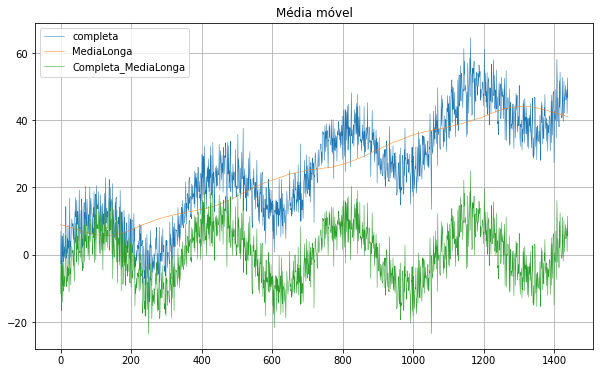

In [ ]:
serie['MediaLonga'] = serie.completa.rolling(400, 
                                                                 min_periods=1,
                                                                center =True).mean()
serie['Completa_MediaLonga'] = serie.completa - serie.MediaLonga
serie.loc[:,['completa','MediaLonga','Completa_MediaLonga']].plot(figsize=figsize,
                        grid=True, 
    linewidth=0.5,
    use_index=False)
plt.title('Média móvel')
plt.show()

## Retirando Sazonalidade

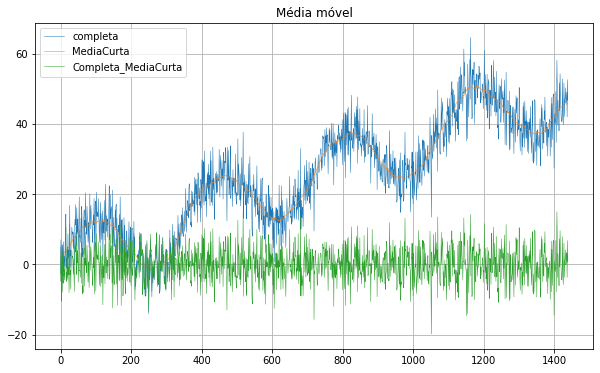

In [ ]:
serie['MediaCurta'] = serie.completa.rolling(50, 
                                                                 min_periods=1,
                                                                center =True).mean()
serie['Completa_MediaCurta'] = serie.completa - serie.MediaCurta
serie.loc[:,['completa','MediaCurta','Completa_MediaCurta']].plot(figsize=figsize,
                        grid=True, 
    linewidth=0.5,
    use_index=False)
plt.title('Média móvel')
plt.show()

## Análise componente aleatório

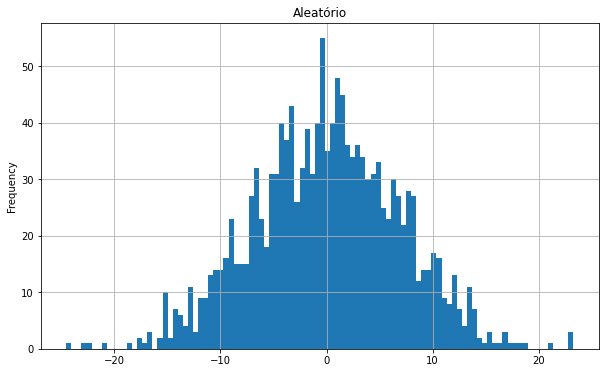

In [ ]:
# Análise componente aleatório

fig, ax = plt.subplots(1,1,sharex=False, sharey=False,figsize=figsize)

serie.Diff.plot(kind='hist',
                figsize=figsize,
                        grid=True, 
    linewidth=0.5,
               ax=ax,
               bins=100)
plt.title('Aleatório')
plt.show()

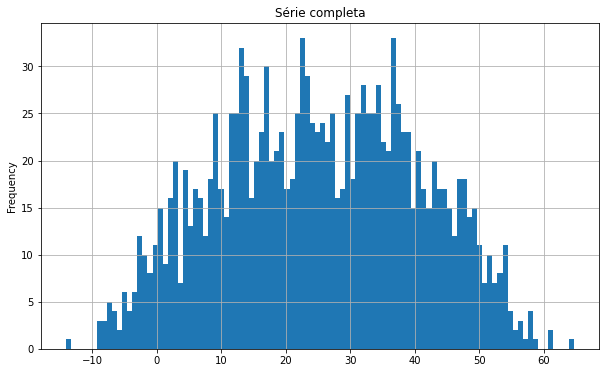

In [ ]:
fig, ax = plt.subplots(1,1,sharex=False, sharey=False,figsize=figsize)

serie.completa.plot(kind='hist',
                figsize=figsize,
                        grid=True, 
    linewidth=0.5,
               ax=ax,
               bins=100)
plt.title('Série completa')
plt.show()

## Estacionariedade

Análise de séries temporais está fora do escopo deste trabalho.

A questão aqui colocada é simplesmente a verificação se os dados coletados estão variando no tempo ou não, ou seja, se a série é estacionária.

Mais formalmente colocando, a maioria das análises feitas até o momento pressupõe que as variáveis aleatórias (amostras) sejam iid, independentes e identicamente distribuídas. Caso as variáveis coletadas sofram mudança ao longo do tempo, deixarão de ser identicamente distribuídas (oriundas da mesma distribuição), o que invalida os testes apresentados.

Vejamos um exemplo onde uma distribuição normal é afetada pela passagem do tempo:


População normal, média 0.03881247615960185, desvio padrão 0.9810041339322116
População normal alterada, média 2.538812476159602, desvio padrão 1.731760193388995


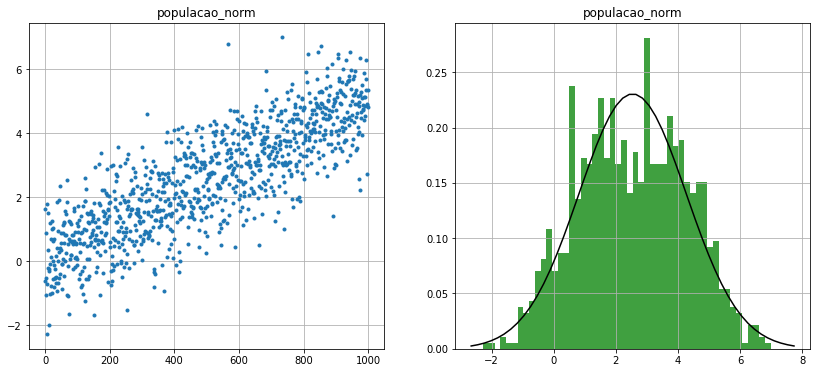

In [ ]:


mean = 0
std = 1
repeticoes=1000

rv_norm = stat.norm(loc=mean, scale=std)
populacao_norm = rv_norm.rvs(size=repeticoes, random_state=random_state)

mean_ = np.mean(populacao_norm)
std_ = np.std(populacao_norm)

print('População normal, média {}, desvio padrão {}'.format(mean_, std_))

populacao_norm += np.linspace(0.0,5*std,repeticoes)

mean_ = np.mean(populacao_norm)
std_ = np.std(populacao_norm)

print('População normal alterada, média {}, desvio padrão {}'.format(mean_, std_))

rv = norm(loc=mean_, scale=std_)

intervalo = np.linspace(mean_-3*std_,mean_+3*std_, num=50)



fig, axs = plt.subplots(1, 2, figsize=(14,6))

axs[0].plot(populacao_norm,'.')
axs[0].grid(True)
axs[0].set_title('populacao_norm')

axs[1].hist(populacao_norm, density=True, facecolor='g', alpha=0.75, bins=50)
axs[1].plot(intervalo, rv.pdf(intervalo), 'k-', label='pdf')
axs[1].grid(True)
axs[1].set_title('populacao_norm')

plt.show()

In [ ]:
tamanho_serie = len(populacao_norm) 
mean_ = np.mean(populacao_norm[0:int(tamanho_serie/2)])
print(mean_)
mean_ = np.mean(populacao_norm[int(tamanho_serie/2):])
print(mean_)

1.3021856430050553
3.775439309314148


In [ ]:
# Hipótese nula: não é estacionária
# p>0.05 não rejeita hipótese nula

from statsmodels.tsa.stattools import adfuller
result = adfuller(populacao_norm)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -0.988187
p-value: 0.757548


Neste exemplo, tanto a simples plotagem dos dados (esquerda), como a distribuição de probabilidade (esquerda) dão indícios de não estacionariedade. Há testes estatísticos para verificação de estacionariedade (ex. Dickey-Fuller).

Neste caso, devem ser usadas técnicas de análise de séries temporais para eliminação da tendência temporal e, só então, fazer a análise da série estacionária resultante.

## Autocorrelação

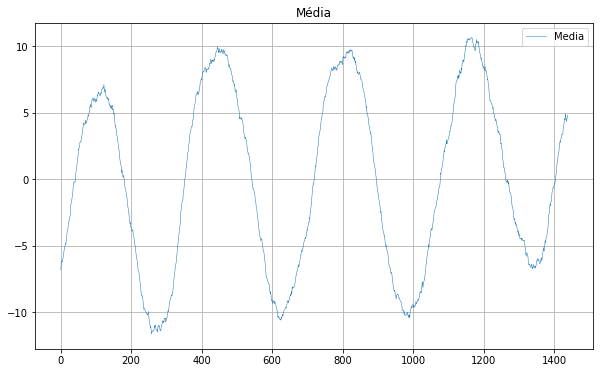

In [ ]:
serie['Media'] = serie.MediaCurta-serie.MediaLonga

serie.loc[:,['Media']].plot(figsize=figsize,
                        grid=True, 
    linewidth=0.5,
    use_index=False)
plt.title('Média')
plt.show()



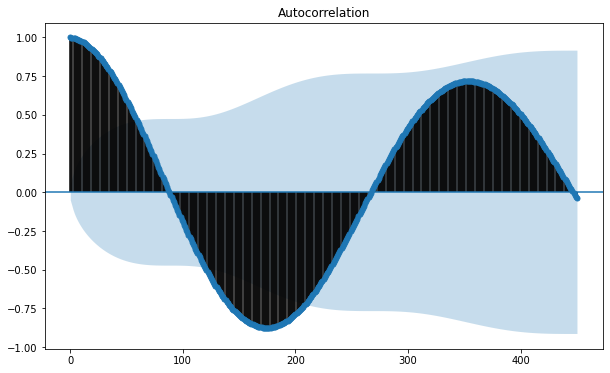

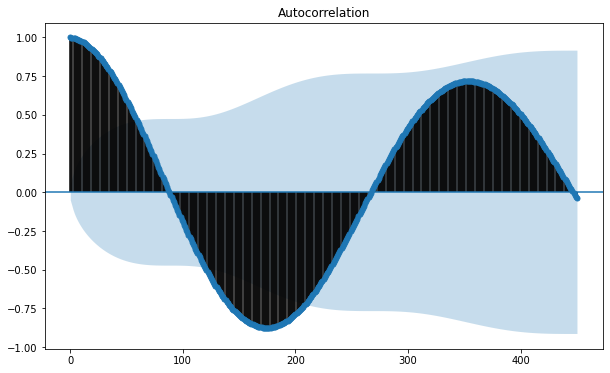

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(1,1,sharex=False, sharey=False,figsize=figsize)
plot_acf(serie.Media, 
         lags=450, ax=ax)

## Variância

In [ ]:
serie.head()

,t,tendencia,sazonalidade,aleatorio,completa,Diff,MediaLonga,Completa_MediaLonga,MediaCurta,Completa_MediaCurta,Media
0,0.000000,0.000000,0.000000,-2.652449,-2.652449,NaN,8.919252,-11.571701,2.121246,-4.773695,-6.798006
1,0.017465,0.034931,0.174645,6.840749,7.050325,9.702774,8.862966,-1.812641,2.126133,4.924192,-6.736833
2,0.034931,0.069862,0.349237,-3.263306,-2.844207,-9.894531,8.847830,-11.692037,2.671984,-5.516190,-6.175847
3,0.052396,0.104793,0.523723,-8.450326,-7.821811,-4.977604,8.851746,-16.673557,2.664124,-10.485935,-6.187622
4,0.069862,0.139723,0.698049,4.704854,5.542627,13.364438,8.859148,-3.316521,2.709046,2.833580,-6.150101


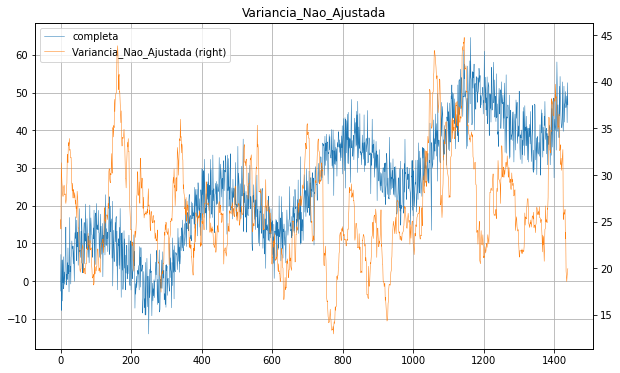

In [ ]:
serie['Variancia_Nao_Ajustada'] = serie.completa.rolling(50, 
                                                                 min_periods=1,
                                                                center =True).var()
serie.loc[:,['completa','Variancia_Nao_Ajustada']].plot(figsize=figsize,
                        grid=True, 
    linewidth=0.5,
    use_index=False,
                                                       secondary_y='Variancia_Nao_Ajustada')
plt.title('Variancia_Nao_Ajustada')
plt.show()

## Previsão

In [ ]:
tamanho_previsao = len(serie)+int(0.2*len(serie))

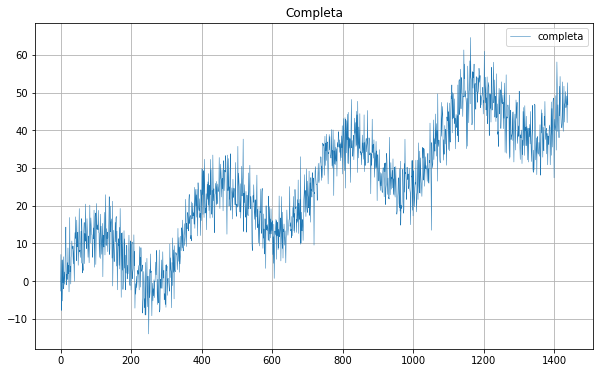

In [ ]:
serie.plot(figsize=figsize,
                        grid=True, 
    linewidth=0.5,
    use_index=False,
          x='t',
          y='completa')
plt.title('Completa')
plt.show()

In [ ]:
from datetime import datetime, date, timedelta

previsao = serie.loc[:,['completa']].copy()
base = datetime.today()
date_list = [base - timedelta(days=x) for x in range(len(previsao),0,-1)]
previsao['ds'] = date_list
previsao.columns=['y','ds']
previsao.head()

,y,ds
0,-2.652449,2017-09-16 20:46:36.970263
1,7.050325,2017-09-17 20:46:36.970263
2,-2.844207,2017-09-18 20:46:36.970263
3,-7.821811,2017-09-19 20:46:36.970263
4,5.542627,2017-09-20 20:46:36.970263


In [ ]:
from fbprophet import Prophet

m = Prophet()
m.fit(previsao)

future = m.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
1800,2022-08-21 20:46:36.970263
1801,2022-08-22 20:46:36.970263
1802,2022-08-23 20:46:36.970263
1803,2022-08-24 20:46:36.970263
1804,2022-08-25 20:46:36.970263


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1800,2022-08-21 20:46:36.970263,60.344836,54.660942,66.782569
1801,2022-08-22 20:46:36.970263,60.417387,54.180145,66.762431
1802,2022-08-23 20:46:36.970263,60.461545,54.068232,67.027479
1803,2022-08-24 20:46:36.970263,61.140358,54.627702,68.061459
1804,2022-08-25 20:46:36.970263,61.337683,55.205736,67.820606


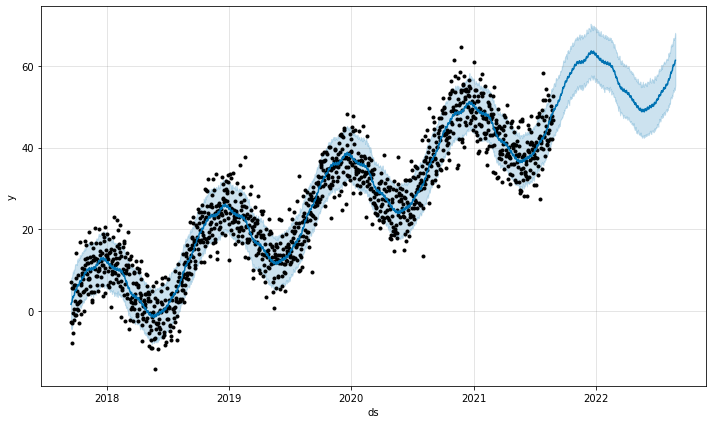

In [ ]:
fig1 = m.plot(forecast)

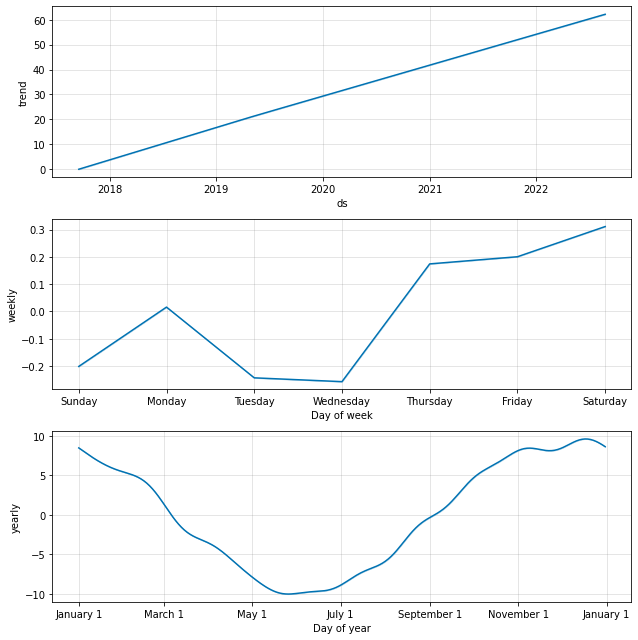

In [ ]:
fig2 = m.plot_components(forecast)

## **Exercício**

Gastos de Senadores
Vamos estudar a série temporal de gastos com reembolso para Senadores nos anos entre 2015 e 2019

Fonte https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps

In [ ]:
Gastos2015 = pd.read_excel('/content/drive/MyDrive/AcademiaQintess/Gastos.xlsx', sheet_name='2015')
Gastos2016 = pd.read_excel('/content/drive/MyDrive/AcademiaQintess/Gastos.xlsx', sheet_name='2016')
Gastos2017 = pd.read_excel('/content/drive/MyDrive/AcademiaQintess/Gastos.xlsx', sheet_name='2017')
Gastos2018 = pd.read_excel('/content/drive/MyDrive/AcademiaQintess/Gastos.xlsx', sheet_name='2018')
Gastos2019 = pd.read_excel('/content/drive/MyDrive/AcademiaQintess/Gastos.xlsx', sheet_name='2019')
Gastos = pd.concat([Gastos2015,Gastos2016,Gastos2017,Gastos2018,Gastos2019])
Gastos = Gastos.loc[(Gastos.DATA>='2015-01-01')&(Gastos.DATA<='2019-08-31'),:]

Gastos['DiaSemana']=0
Gastos['DiaSemana']=Gastos['DATA'].dt.strftime( '%w').astype(copy=False, dtype ='int')
Gastos['DiaMes']=0
Gastos['DiaMes']=Gastos['DATA'].dt.strftime( '%d').astype(copy=False, dtype ='int')
Gastos.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DiaSemana,DiaMes
0,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,CENTRAIS ELÉTRICAS DE RONDÔNIA - CERON,647777,2015-01-14,NaN,52.34,3,14
1,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,CENTRAIS ELÉTRICAS DE RONDÔNIA - CERON,647776,2015-01-18,Despesa com pagamento de energia elétrica para...,168.17,0,18
2,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/15,2015-01-30,Despesa com pagamento de aluguel de imóvel par...,5000.00,5,30
3,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,556241490,2015-01-19,Despesa com pagamento de telefonia para uso do...,416.95,1,19
4,2015,1,ACIR GURGACZ,Aquisição de material de consumo para uso no e...,07.170.542/0001-51,INK JET INFORMATICA E PAPELARIA LTDA EPP,14654,2015-01-09,Despesa com material de consumo para uso do es...,108.50,5,9


In [ ]:
TiposGastos = Gastos.loc[:,['TIPO_DESPESA','VALOR_REEMBOLSADO']].groupby(['TIPO_DESPESA']).sum().index.values

In [ ]:
Gastos.loc[:,['TIPO_DESPESA','VALOR_REEMBOLSADO']].groupby(['TIPO_DESPESA']).sum()

,VALOR_REEMBOLSADO
TIPO_DESPESA,
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",22443155.37
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",4178590.38
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",18328775.50
Divulgação da atividade parlamentar,14439673.91
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",25735242.09
"Passagens aéreas, aquáticas e terrestres nacionais",30678057.24
Serviços de Segurança Privada,1617098.82


Analisando os gráficos abaixo, o que explica a diferença de gastos ao longo da semana apresenta no primeiro gráfico?

Diferente de outros tipos de despesa (ex. viagens), a despesa de aluguel não apresenta grande diferença ao longo da semana, aparentemente pelo fato da data de vencimento ser fixa (ex. dia 30), independente do dia da semana em que esteja

Valor reembolsado por dia da semana

Obs: a semana comça em zero, correspondente ao domingo

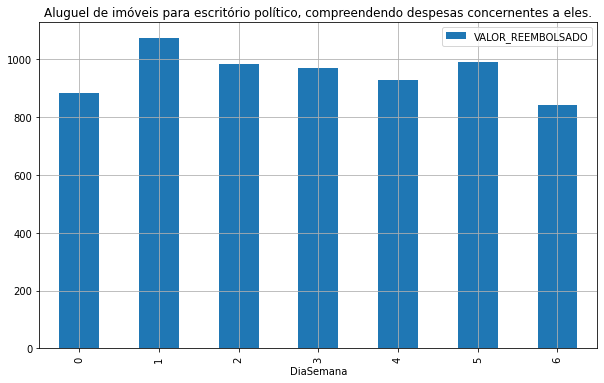

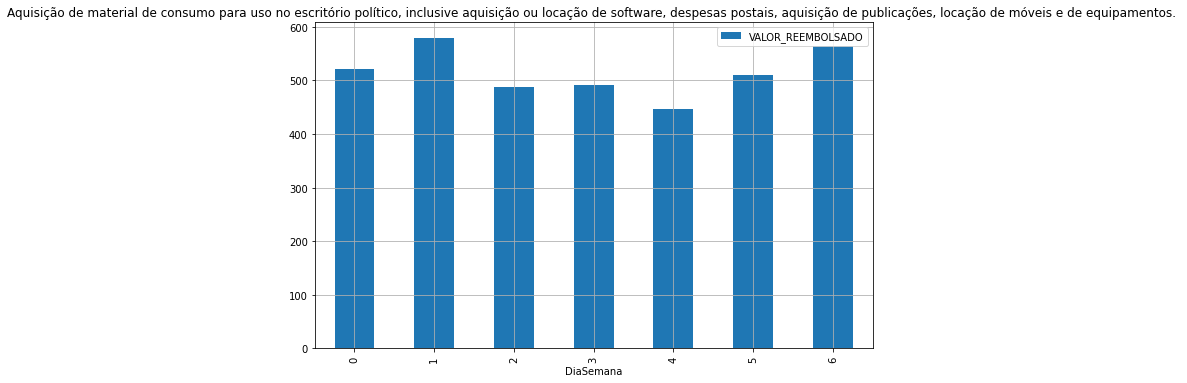

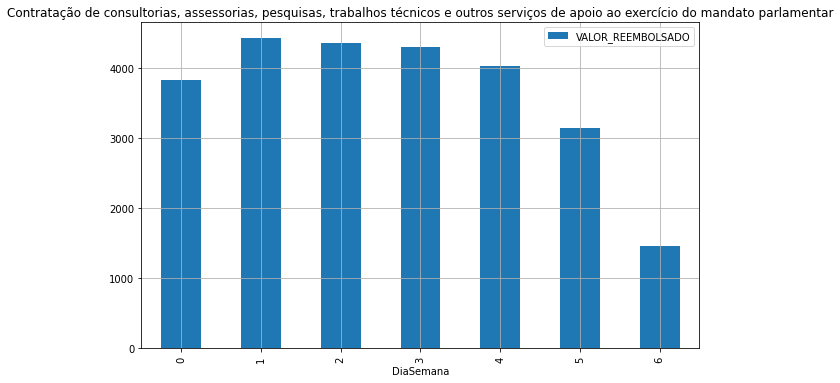

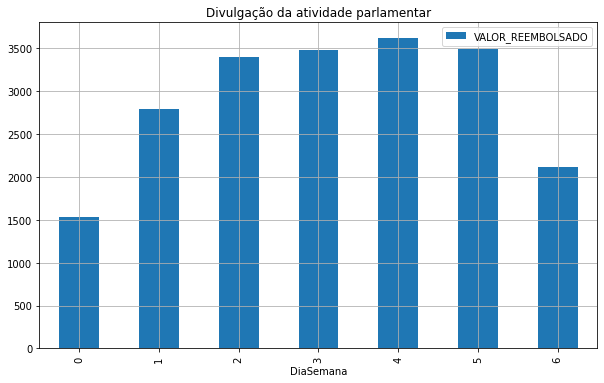

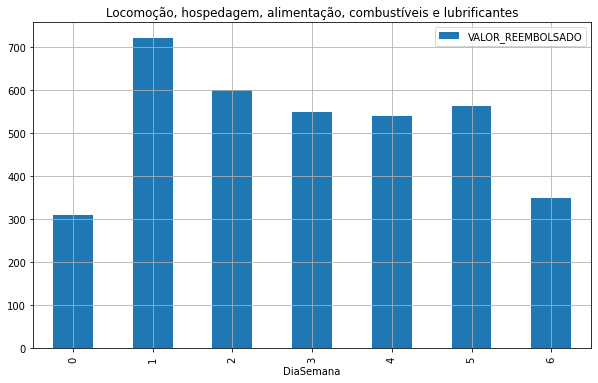

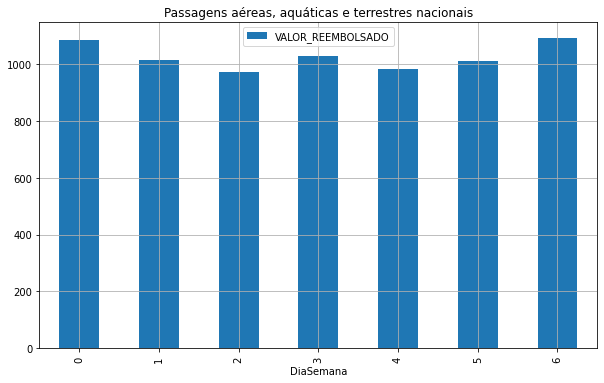

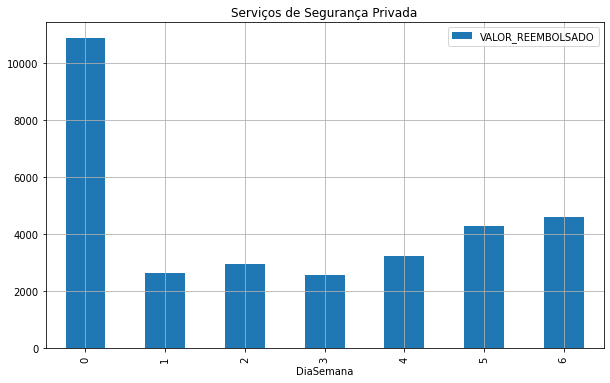

In [ ]:
for tipoGasto in TiposGastos:
    Gastos.loc[Gastos.TIPO_DESPESA==tipoGasto,['DiaSemana','VALOR_REEMBOLSADO']].groupby(['DiaSemana']).mean().plot.bar(figsize=figsize,
                        grid=True, title=tipoGasto)

In [ ]:
Gastos.loc[(Gastos.TIPO_DESPESA==TiposGastos[0])&(Gastos.DiaSemana==0),['DETALHAMENTO','VALOR_REEMBOLSADO']].groupby(['DETALHAMENTO']).mean().sort_values(by='VALOR_REEMBOLSADO').tail(20)

,VALOR_REEMBOLSADO
DETALHAMENTO,
Despesa referente a aluguel de imóvel para escritório parlamentar.,6500.0
aluguel do imóvel,6500.0
DESPESA COM ALUGUEL DO ESCRITÓRIO POLÍTICO EM SÃO PAULO - SP.,6766.0
DESPESA COM O ALUGUEL DAS INSTALAÇÕES DO ESCRITÓRIO POLÍTICO EM SÃO PAULO.,6766.0
Categoria 1: Despesas com aluguel,7000.0
Despesa relativa ao aluguel do escritório parlamentar do estado.,7190.0
Despesa com aluguel do escritório parlamentar no estado.,7190.0
Categoria 1: Despesas com aluguel de imovel,7300.0
Despesa referente ao aluguel de imóvel para o escritório parlamentar no estado.,7430.0


Analisando os gráficos abaixo, o que explicaria a diferença de gastos ao longo do mês apresenta no primeiro gráfico?

Para o aluguel o gráfico está coerente com o padrão de pagamento, concentração de vencimento nos últimos dias do mês ou inícioo do mês seguinte.


Valor reembolsado por dia do mês

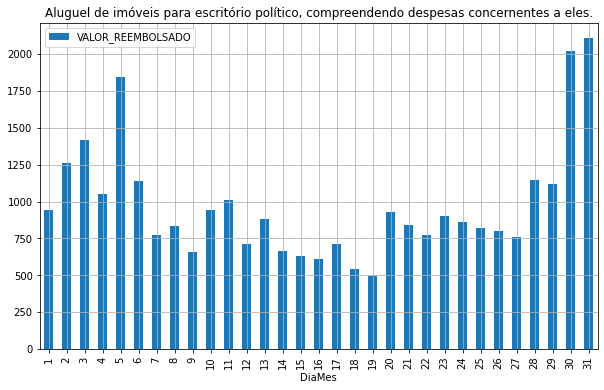

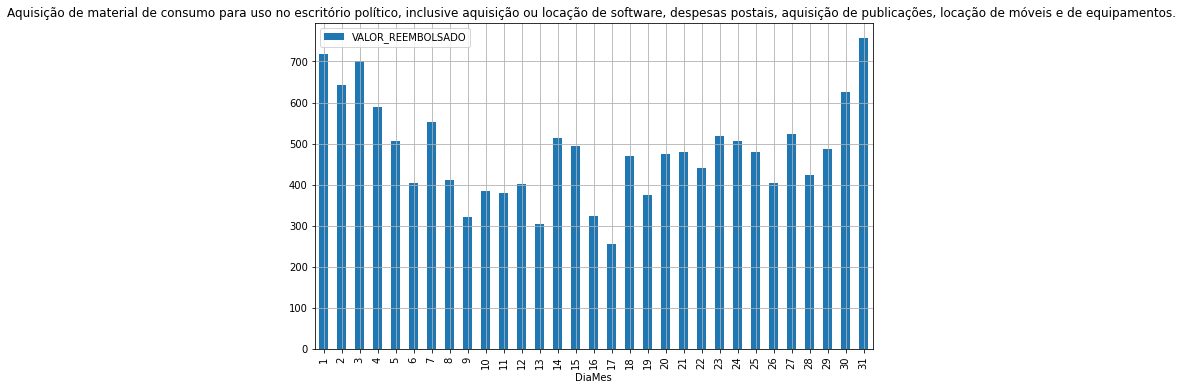

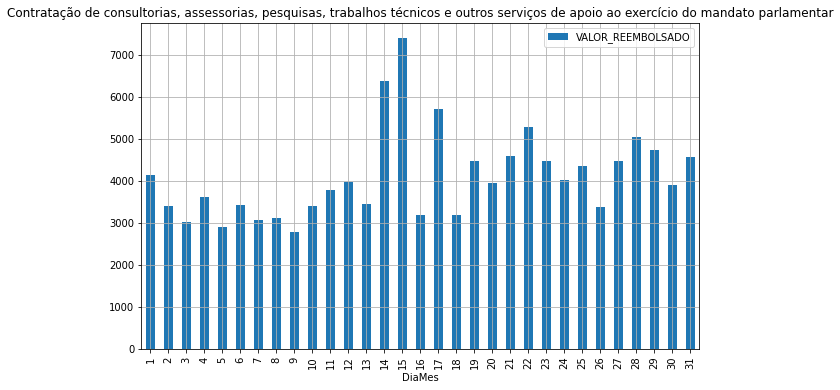

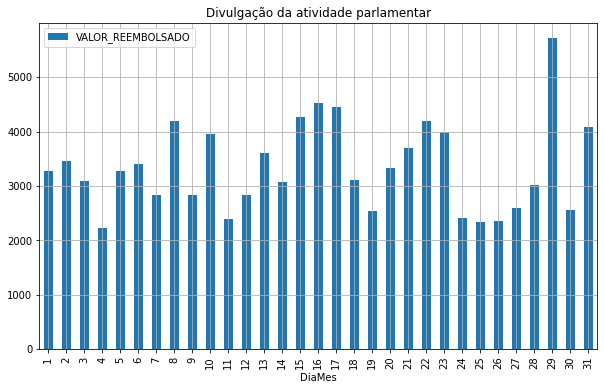

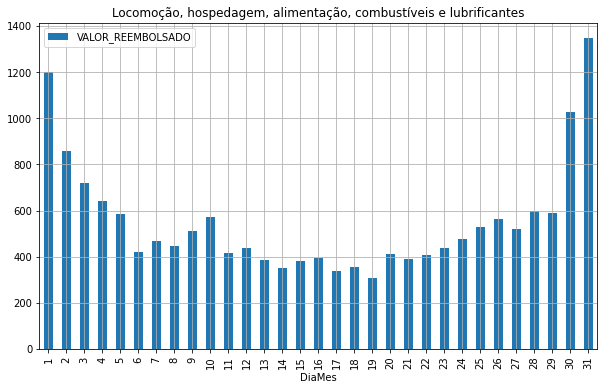

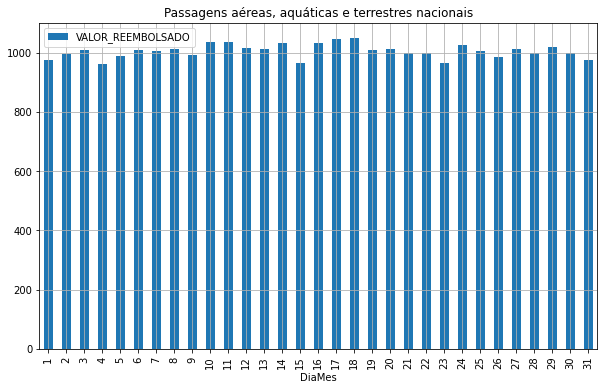

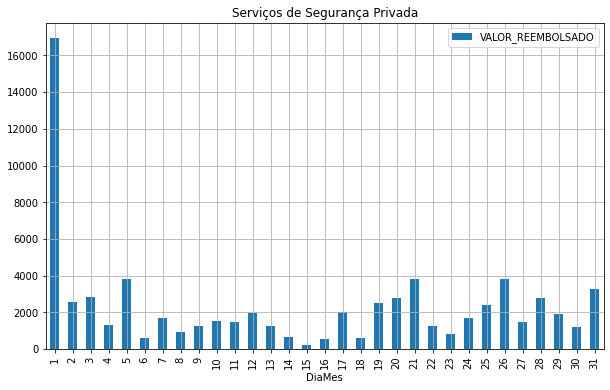

In [ ]:
for tipoGasto in TiposGastos:
    Gastos.loc[Gastos.TIPO_DESPESA==tipoGasto,['DiaMes','VALOR_REEMBOLSADO']].groupby(['DiaMes']).mean().plot.bar(figsize=figsize,
                        grid=True, title=tipoGasto)

Analisando o gráfico abaixo (observar linha de média), o que explicaria a diferença de gastos ao longo do tempo?

O ano de 2018 foi atípico, por quê?

A sazonalidade anual (diminuição de gastos em dez e jan) está ligada aos meses de férias. 2018 foi um mês atípico por ter havido eleição (out)

Variação de gastos ao longo do ano

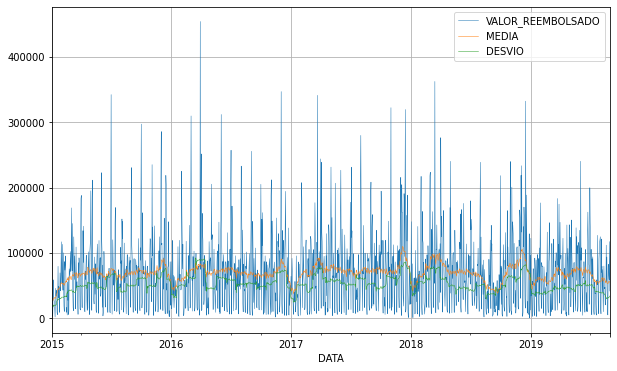

In [ ]:
pd.plotting.register_matplotlib_converters()

GastosConsolidados = Gastos.loc[:,['DATA','VALOR_REEMBOLSADO']].groupby(['DATA']).sum()
GastosConsolidados['MEDIA'] = GastosConsolidados['VALOR_REEMBOLSADO'].rolling(30, 
                                                                 min_periods=1,
                                                                center =True).mean()
GastosConsolidados['DESVIO'] = GastosConsolidados['VALOR_REEMBOLSADO'].rolling(30, 
                                                                 min_periods=1,
                                                                center =True).std()

GastosConsolidados.plot(figsize=figsize,
                        grid=True, 
    linewidth=0.5)
plt.show()                                            

Analisando a autocorrelação abaixo (cada barra representa a autocorrelação de um dia), podemos verificar repetições de comportamento, em média, de quantos em quantos dias?

Autocorrelação de gastos forte a cada 30 dias, indicando, provavelmente, maior gasto no final de cada mês

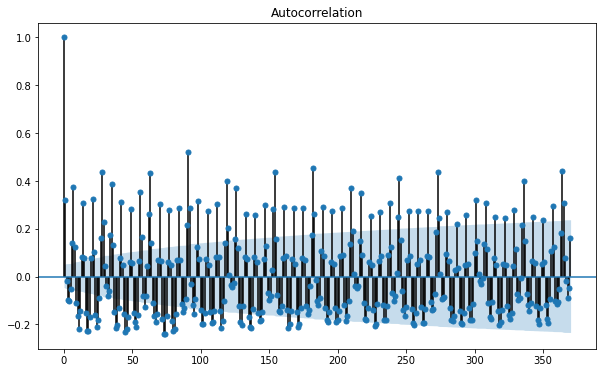

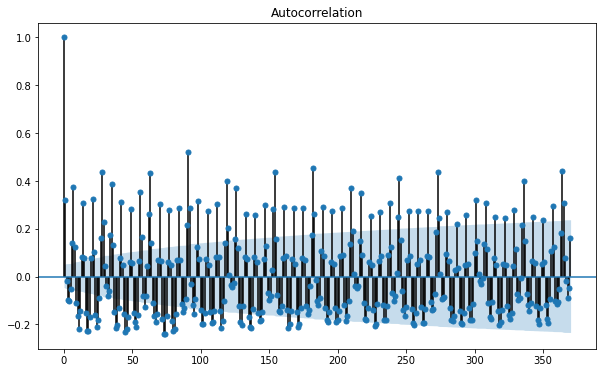

In [ ]:
fig, ax = plt.subplots(1,1,sharex=False, sharey=False,figsize=figsize)
plot_acf(GastosConsolidados.VALOR_REEMBOLSADO, 
         lags=370, ax=ax)

Analisando o gráfico abaixo, o que, na sua opinião, explica a diferença de gastos com passagens ao longo do tempo?

O ano de 2018 foi atípico, por quê?

Diminuição de gastos típica nos meses de jul, dez e jan, por conta de férias. como já citado, 2018 foi ano de eleição, que distorce o padrão de gastos no mês de out desse ano

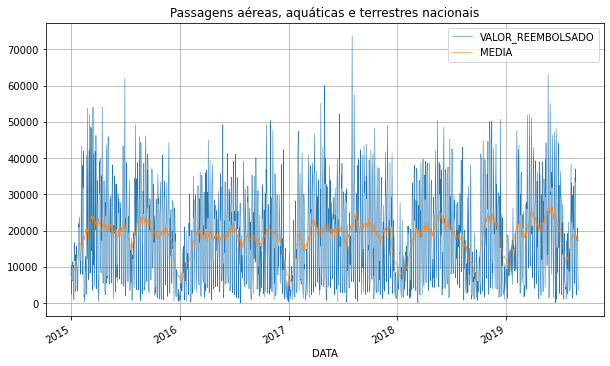

In [ ]:
GastosConsolidadoTipoDespesa = Gastos.loc[Gastos.TIPO_DESPESA=='Passagens aéreas, aquáticas e terrestres nacionais',
                                          ['DATA','VALOR_REEMBOLSADO']].groupby(['DATA']).sum()

GastosConsolidadoTipoDespesa['MEDIA'] = GastosConsolidadoTipoDespesa['VALOR_REEMBOLSADO'].rolling(30, 
                                                                 min_periods=1,
                                                                center =True).mean()

GastosConsolidadoTipoDespesa.plot(figsize=figsize,
                        grid=True, 
    linewidth=0.5,
    use_index=True,
                                 title='Passagens aéreas, aquáticas e terrestres nacionais')
plt.show()                                                                

# Outliers

Outliers são medidas que se afastam das demais medidas de um conjunto.

Podem derivar de erros de medição ou se tratar de eventos raros.

Em ambos os caso merecem atenção, ou para que sejam corrigidos, no caso de erro, ou para verificar a origem de tais eventos raros.

Resumidamente podemos usar duas técnicas para localização de Outliers: desvio padrão e percentis.

Independente da técnica, a plotagem de um gráfico boxplot é útil para verificarmos sua presença.

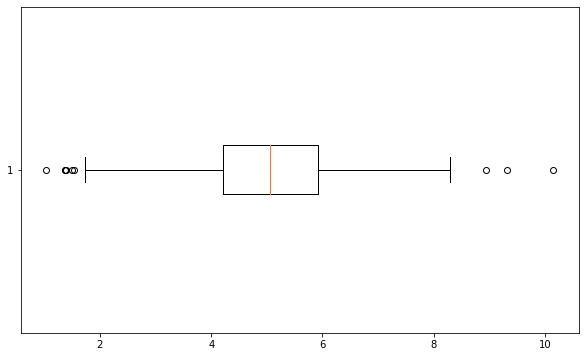

In [ ]:
repeticoes = 1000

# População normal
mean = 5
std = 1.3
rv_norm = stat.norm(loc=mean, scale=std)
populacao_norm = rv_norm.rvs(size=repeticoes, random_state=random_state)

fig, axs = plt.subplots(1, 1, figsize=(10,6))
_ = plt.boxplot(populacao_norm,vert =False, meanline =True)

## Utilizando desvio padrão

In [ ]:
media = np.mean(populacao_norm)
std = np.std(populacao_norm)

print('Média {}, STD {}'.format(media,std))

outliers1 = np.where(populacao_norm > (media+3*std))
outliers2 = np.where(populacao_norm < (media-3*std))

outliers = np.concatenate( (outliers1,outliers2), axis=1)

populacao_norm[outliers]

Média 5.050456219007482, STD 1.2753053741118752


array([[ 8.94011425, 10.14618352,  9.31740238,  1.03010631]])

## Utilizando quartis

In [ ]:
q25, q75 = np.percentile(populacao_norm, 25), np.percentile(populacao_norm, 75)

iqr= q75 - q25

outliers1 = np.where(populacao_norm > (q75+1.5*iqr))
outliers2 = np.where(populacao_norm < (q25-1.5*iqr))

outliers = np.concatenate( (outliers1,outliers2), axis=1)

populacao_norm[outliers]

array([[ 8.94011425, 10.14618352,  9.31740238,  1.3689895 ,  1.38270519,
         1.37170467,  1.49212974,  1.03010631,  1.53663628]])